In [2]:
import pandas as pd
import numpy as np
print("Data Preparation 'a':")
print("     ")

# Read the selected data
df = pd.read_excel('/Users/AnanyaPal1/Documents/Certifications & Applications/Analysis-of-Oncological-Cancer-Screening-in-Latvia-/survey_data/survey_data.xlsx')
# list the fields/variables
display(df.head())
# identifing their types
display(df.dtypes)

print("     ")
print("Data Preparation 'b':")

print("     ")
print('Outliers:')
print("     ")

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'Age':")
print(outliers[['Age']])
# Remove outliers from 'Age' column
print("  After Fixing the Outliers:   ")
df = df[~((df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR))]
display(df.head())

Q1 = df['Number of children'].quantile(0.25)
Q3 = df['Number of children'].quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = df[(df['Number of children'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
# List the outliers
print("Outliers in 'Number of children':")
print(outliers[['Number of children']])
# Remove outliers from 'Number of children' column
print("  After Fixing the Outliers:   ")
df = df[~((df['Number of children'] < Q1 - 1.5 * IQR) | (df['Number of children'] > Q3 + 1.5 * IQR))]
display(df.head())

print("     ")
print('Missing data:')
print("     ")

# List of columns for which you want to impute missing data
columns_to_impute = ['Age',
                     ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer',
                     'Gender','City/town/village',
                     'Marital Status','Number of children',
                     'Highest level of school completed',
                     'Occupation', 
                     'Employment status', 'Smoking status', 
                     'Daily alcohol consumption ',
                     'Exercise frequency',
                     'Knowledge of General Practitioner',
                     'Last visit to General Practitioner',
                     'Health check-up frequency',
                     'For women only: last visit to gynaecologist']

# List Missing data before the Imputing
columns_with_missing_data = df[columns_to_impute].columns[df[columns_to_impute].isnull().any()]
print("Columns with missing data:")
print(columns_with_missing_data)

for column in columns_to_impute:
    if column in df.columns:  # Check if column exists in DataFrame
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            # Impute missing values with mean for numerical columns
            df[column] = df[column].fillna(df[column].mean())
            if column == 'Number of children':
                df[column] = df[column].round()  # Round to the nearest integer
        elif df[column].dtype == 'object':
            # Impute missing values with mode for categorical columns
            most_frequent_value = df[column].mode()[0]
            df[column] = df[column].fillna(most_frequent_value)
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Check if there are still any missing values
print("Columns with missing data after imputation:")
print(df[columns_to_impute].columns[df[columns_to_impute].isnull().any()])

# Convert age column to integer after imputation
df['Age'] = df['Age'].astype(int)

print("  After Fixing the Missing Data:   ")
display(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


Data Preparation 'a':
     


Country Code Region   Age  \
0           DE     NW   NaN   
1           LV    RIX   NaN   
2           LV    RIX  48.0   
3           LV    JEL  23.0   
4           UA     30   NaN   

   Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer  \
0                                                NaN                                             
1                                                NaN                                             
2                                                 No                                             
3                                                 No                                             
4                                                NaN                                             

  Gender City/town/village                    Marital Status  \
0    NaN               NaN                               NaN   
1    NaN               NaN                               NaN   
2   Male              Rīga  Married or living with a partner   
3   Male              Riga                    Marital Status   
4    NaN               NaN                               NaN   

   Number of children Highest level of school completed Occupation  ...  \
0                 NaN                               NaN        NaN  ...   
1                 NaN                               NaN        NaN  ...   
2                 NaN                               NaN        NaN  ...   
3                 NaN                               NaN        NaN  ...   
4                 NaN                               NaN        NaN  ...   

  Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment   \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

  Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life  \
0                                                NaN                                                                                                                           
1                                                NaN                                                                                                                           
2                                                NaN                                                                                                                           
3                                                NaN                                                                                                                           
4                                                NaN                                                                                                                           

  Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures  \
0                                                NaN                                                                                                                      
1                                                NaN                                                                                                                      
2                                                NaN                                                                                                                      
3           

Country Code                                                                                                                                object
Region                                                                                                                                      object
Age                                                                                                                                        float64
 Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer                                                object
Gender                                                                                                                                      object
                                                                                                                                            ...   
Motivation preference for attending medical screenings is personalised reminders and notifications                    

     
Data Preparation 'b':
     
Outliers:
     
Outliers in 'Age':
Empty DataFrame
Columns: [Age]
Index: []
  After Fixing the Outliers:   


Country Code Region   Age  \
0           DE     NW   NaN   
1           LV    RIX   NaN   
2           LV    RIX  48.0   
3           LV    JEL  23.0   
4           UA     30   NaN   

   Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer  \
0                                                NaN                                             
1                                                NaN                                             
2                                                 No                                             
3                                                 No                                             
4                                                NaN                                             

  Gender City/town/village                    Marital Status  \
0    NaN               NaN                               NaN   
1    NaN               NaN                               NaN   
2   Male              Rīga  Married or living with a partner   
3   Male              Riga                    Marital Status   
4    NaN               NaN                               NaN   

   Number of children Highest level of school completed Occupation  ...  \
0                 NaN                               NaN        NaN  ...   
1                 NaN                               NaN        NaN  ...   
2                 NaN                               NaN        NaN  ...   
3                 NaN                               NaN        NaN  ...   
4                 NaN                               NaN        NaN  ...   

  Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment   \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

  Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life  \
0                                                NaN                                                                                                                           
1                                                NaN                                                                                                                           
2                                                NaN                                                                                                                           
3                                                NaN                                                                                                                           
4                                                NaN                                                                                                                           

  Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures  \
0                                                NaN                                                                                                                      
1                                                NaN                                                                                                                      
2                                                NaN                                                                                                                      
3           

Outliers in 'Number of children':
     Number of children
2                   NaN
3                   NaN
5                   NaN
6                   0.0
7                   0.0
..                  ...
114                 0.0
115                 2.0
117                 0.0
118                 0.0
119                 0.0

[108 rows x 1 columns]
  After Fixing the Outliers:   


Country Code Region   Age  \
0           DE     NW   NaN   
1           LV    RIX   NaN   
2           LV    RIX  48.0   
3           LV    JEL  23.0   
4           UA     30   NaN   

   Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer  \
0                                                NaN                                             
1                                                NaN                                             
2                                                 No                                             
3                                                 No                                             
4                                                NaN                                             

  Gender City/town/village                    Marital Status  \
0    NaN               NaN                               NaN   
1    NaN               NaN                               NaN   
2   Male              Rīga  Married or living with a partner   
3   Male              Riga                    Marital Status   
4    NaN               NaN                               NaN   

   Number of children Highest level of school completed Occupation  ...  \
0                 NaN                               NaN        NaN  ...   
1                 NaN                               NaN        NaN  ...   
2                 NaN                               NaN        NaN  ...   
3                 NaN                               NaN        NaN  ...   
4                 NaN                               NaN        NaN  ...   

  Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment   \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

  Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life  \
0                                                NaN                                                                                                                           
1                                                NaN                                                                                                                           
2                                                NaN                                                                                                                           
3                                                NaN                                                                                                                           
4                                                NaN                                                                                                                           

  Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures  \
0                                                NaN                                                                                                                      
1                                                NaN                                                                                                                      
2                                                NaN                                                                                                                      
3           

     
Missing data:
     
Columns with missing data:
Index(['Age',
       ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer',
       'Gender', 'City/town/village', 'Marital Status', 'Number of children',
       'Highest level of school completed', 'Occupation', 'Employment status',
       'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency',
       'Knowledge of General Practitioner',
       'Last visit to General Practitioner', 'Health check-up frequency',
       'For women only: last visit to gynaecologist'],
      dtype='object')
Columns with missing data after imputation:
Index([], dtype='object')
  After Fixing the Missing Data:   


Country Code Region  Age  \
0           DE     NW   46   
1           LV    RIX   46   
2           LV    RIX   48   
3           LV    JEL   23   
4           UA     30   46   

   Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer  \
0                                                 No                                             
1                                                 No                                             
2                                                 No                                             
3                                                 No                                             
4                                                 No                                             

  Gender City/town/village                    Marital Status  \
0   Male              Riga  Married or living with a partner   
1   Male              Riga  Married or living with a partner   
2   Male              Rīga  Married or living with a partner   
3   Male              Riga                    Marital Status   
4   Male              Riga  Married or living with a partner   

   Number of children     Highest level of school completed  \
0                 1.0  Higher education (bachelor, masters)   
1                 1.0  Higher education (bachelor, masters)   
2                 1.0  Higher education (bachelor, masters)   
3                 1.0  Higher education (bachelor, masters)   
4                 1.0  Higher education (bachelor, masters)   

                    Occupation  ...  \
0  White collars (office work)  ...   
1  White collars (office work)  ...   
2  White collars (office work)  ...   
3  White collars (office work)  ...   
4  White collars (office work)  ...   

  Did NOT attend state-provided cancer screenings because I forgot to schedule/attend the appointment   \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

  Did NOT attend state-provided cancer screenings because I am fearful of receiving a positive cancer screening result and the potential implications it may have on my life  \
0                                                NaN                                                                                                                           
1                                                NaN                                                                                                                           
2                                                NaN                                                                                                                           
3                                                NaN                                                                                                                           
4                                                NaN                                                                                                                           

  Did NOT attend state-provided cancer screenings because I am concerned that cancer screening may result in false-positive results or unnecessary follow-up procedures  \
0                                                NaN                                                                                                                      
1                                                NaN                                                                                                                      
2                         

## DESCRIPTIVE STATISTICS

In [3]:
# Sample size of participants overall and separate for female and male, sample size of participants excluded by exclusion criteria (due to age, established cancer diagnosis)

# Total sample size
total_sample_size = len(df)

# Sample size for females
female_sample_size = len(df[df['Gender'] == 'Female'])

# Sample size for males
male_sample_size = len(df[df['Gender'] == 'Male'])

# Sample size of participants excluded by age criterion
excluded_by_age = len(df[df['Age'] > 50]) #assuming that above 50, cancer chances increase substantially

# Sample size of participants excluded by established cancer diagnosis
excluded_by_cancer_diagnosis = len(df[df[' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer'] == 'Yes'])


# Print the results
print("Total Sample Size:", total_sample_size)
print("Sample Size for Females:", female_sample_size)
print("Sample Size for Males:", male_sample_size)
print("Sample Size of Participants Excluded by Age Criterion:", excluded_by_age)
print("Sample Size of Participants Excluded by Established Cancer Diagnosis Criterion:", excluded_by_cancer_diagnosis)

Total Sample Size: 117
Sample Size for Females: 46
Sample Size for Males: 71
Sample Size of Participants Excluded by Age Criterion: 47
Sample Size of Participants Excluded by Established Cancer Diagnosis Criterion: 5


Sociodemographic data
- Age distribution (if possible as visualization like a grouped frequency distribution table?), mean age of female participants, mean age of male participants
- Responders by city (if possible as a distribution chart, sample size and percentage) 
- Marital status (sample size and percentage) 
- Number of children (sample size and percentage) 
- Level of education (if possible as visualization, sample size and percentage) 
- Occupation and employment status (if possible as visualization, sample size and percentage) 
- Smoking status, alcohol consumption, physical activity (sample size and percentage) 


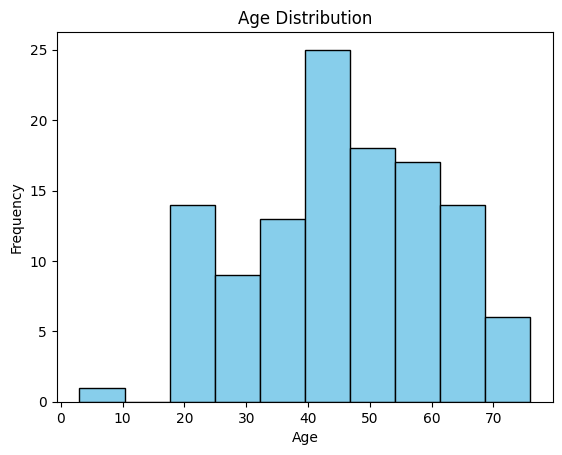

'Mean Age of Female Participants:'

51.80434782608695

'Mean Age of Male Participants:'

42.25352112676056

'Responders by City:'

City/town/village
Riga                47
Rīga                31
Daugavpils           6
Ogre                 3
Salaspils            3
Sigulda              3
Jelgava              3
Mārupe               2
Cēsis                2
Ikšķile              2
Latvija              1
Aglona               1
Šveice, Lausanne     1
Ķekava               1
Valmiera             1
Liepaja              1
Langstini            1
Krustkalni           1
Ríga                 1
Rìga                 1
Ādaži                1
Ciemats              1
Rīgā                 1
Mārupē               1
Daugmale             1
Name: count, dtype: int64

'Percentage by City:'

City/town/village
Riga                40.170940
Rīga                26.495726
Daugavpils           5.128205
Ogre                 2.564103
Salaspils            2.564103
Sigulda              2.564103
Jelgava              2.564103
Mārupe               1.709402
Cēsis                1.709402
Ikšķile              1.709402
Latvija              0.854701
Aglona               0.854701
Šveice, Lausanne     0.854701
Ķekava               0.854701
Valmiera             0.854701
Liepaja              0.854701
Langstini            0.854701
Krustkalni           0.854701
Ríga                 0.854701
Rìga                 0.854701
Ādaži                0.854701
Ciemats              0.854701
Rīgā                 0.854701
Mārupē               0.854701
Daugmale             0.854701
Name: count, dtype: float64

'Marital Status Distribution:'

Marital Status
Married or living with a partner    84
Single                              14
Divorced                            11
Widowed                              7
Marital Status                       1
Name: count, dtype: int64

'Marital Status Percentage:'

Marital Status
Married or living with a partner    71.794872
Single                              11.965812
Divorced                             9.401709
Widowed                              5.982906
Marital Status                       0.854701
Name: count, dtype: float64

'Number of Children Distribution:'

Number of children
1.0    44
2.0    34
0.0    24
3.0    15
Name: count, dtype: int64

'Number of Children Percentage:'

Number of children
1.0    37.606838
2.0    29.059829
0.0    20.512821
3.0    12.820513
Name: count, dtype: float64

'Education Level Distribution:'

Highest level of school completed
Higher education (bachelor, masters)    61
Secondary education                     27
Professional education                  27
Primary education (till grade 9)         1
Doctoral grade                           1
Name: count, dtype: int64

'Education Level Percentage:'

Highest level of school completed
Higher education (bachelor, masters)    52.136752
Secondary education                     23.076923
Professional education                  23.076923
Primary education (till grade 9)         0.854701
Doctoral grade                           0.854701
Name: count, dtype: float64

'Occupation Distribution:'

Occupation
White collars (office work)      56
Black collars (physical work)    21
Other                            15
Medicine                         14
Education                        11
Name: count, dtype: int64

'Occupation Percentage:'

Occupation
White collars (office work)      47.863248
Black collars (physical work)    17.948718
Other                            12.820513
Medicine                         11.965812
Education                         9.401709
Name: count, dtype: float64

'Employment Status Distribution:'

Employment status
Full-time     65
Part-time     18
Retired       11
Student       10
Unemployed     9
Other          4
Name: count, dtype: int64

'Employment Status Percentage:'

Employment status
Full-time     55.555556
Part-time     15.384615
Retired        9.401709
Student        8.547009
Unemployed     7.692308
Other          3.418803
Name: count, dtype: float64

'Smoking Status Distribution:'

Smoking status
Non-smoker        59
Current smoker    37
Former smoker     21
Name: count, dtype: int64

'Smoking Status Percentage:'

Smoking status
Non-smoker        50.427350
Current smoker    31.623932
Former smoker     17.948718
Name: count, dtype: float64

'Alcohol Consumption Distribution:'

Daily alcohol consumption 
Up to 500 ml of light beer, one glass (125 ml) of wine, or one shot glass (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor             56
No alcohol                                                                                                                                                                                                     32
Up to 1 liter of light beer, three glasses (125 ml) of wine, or three shot glasses (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor    25
More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor                                                                                                        4
Name: count, dtype: int64

'Alcohol Consumption Percentage:'

Daily alcohol consumption 
Up to 500 ml of light beer, one glass (125 ml) of wine, or one shot glass (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor             47.863248
No alcohol                                                                                                                                                                                                     27.350427
Up to 1 liter of light beer, three glasses (125 ml) of wine, or three shot glasses (More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor5 ml) of liquor    21.367521
More than 1200 ml of light beer, three glasses (125 ml) of wine, or three shot glasses (45 ml) of liquor                                                                                                        3.418803
Name: count, dtype: float64

'Physical Activity Distribution:'

Exercise frequency
Once a month         47
Once a week          26
Once every 2 days    20
Never                13
Everyday             11
Name: count, dtype: int64

'Physical Activity Percentage:'

Exercise frequency
Once a month         40.170940
Once a week          22.222222
Once every 2 days    17.094017
Never                11.111111
Everyday              9.401709
Name: count, dtype: float64

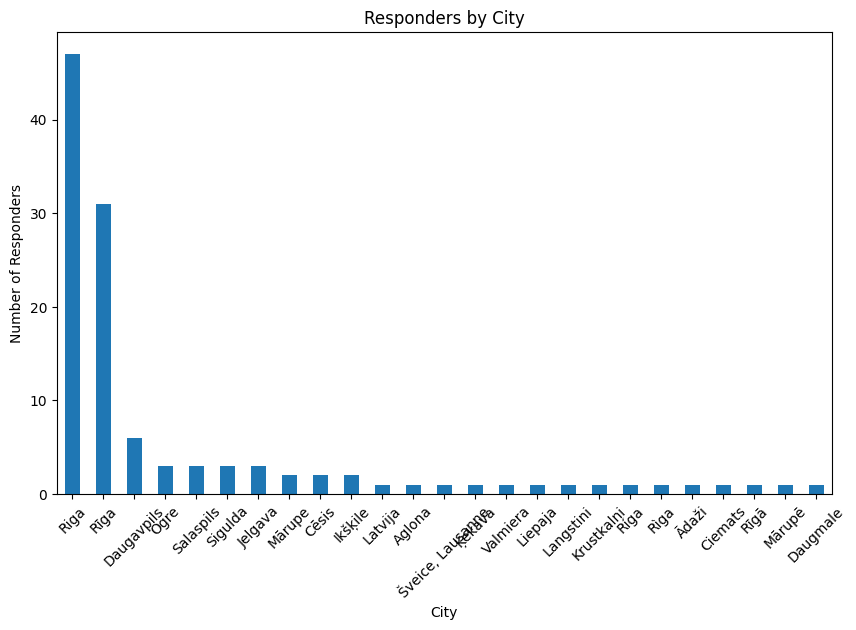

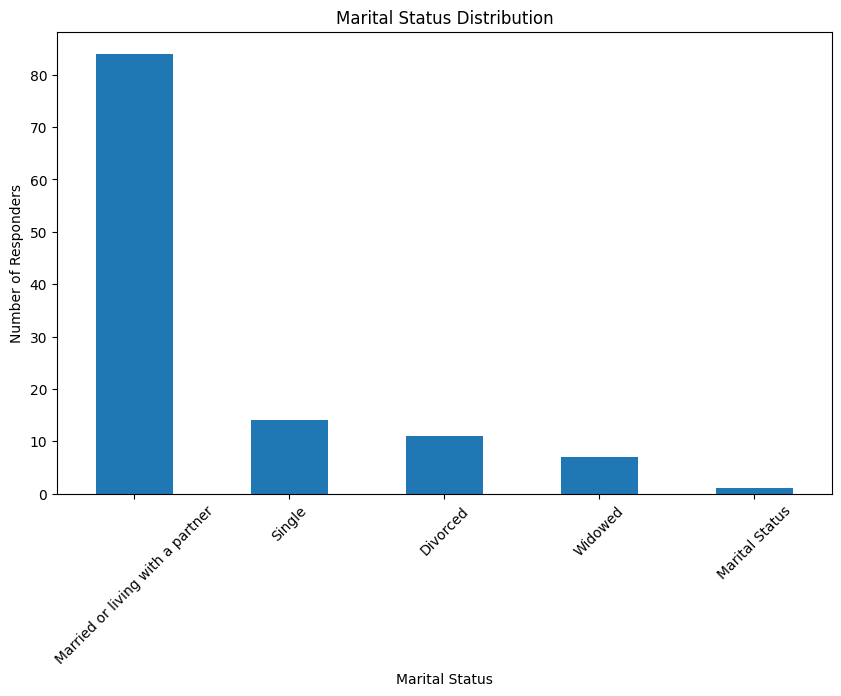

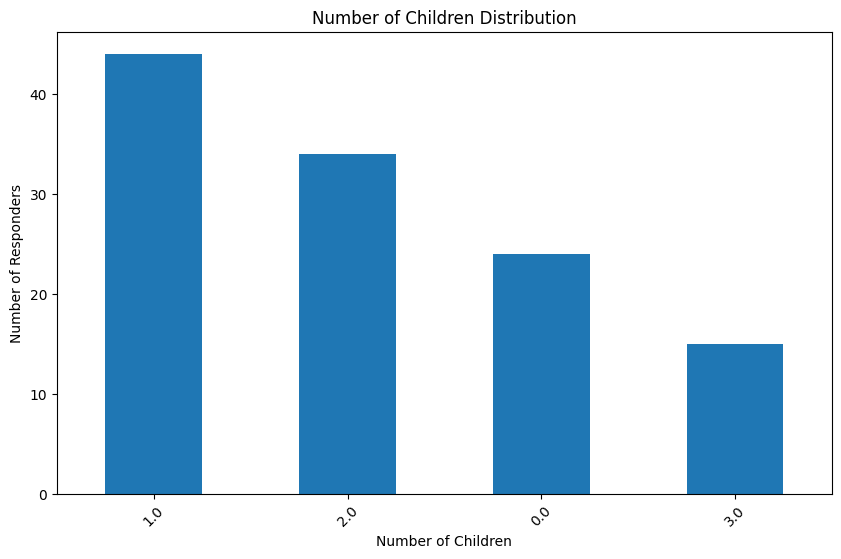

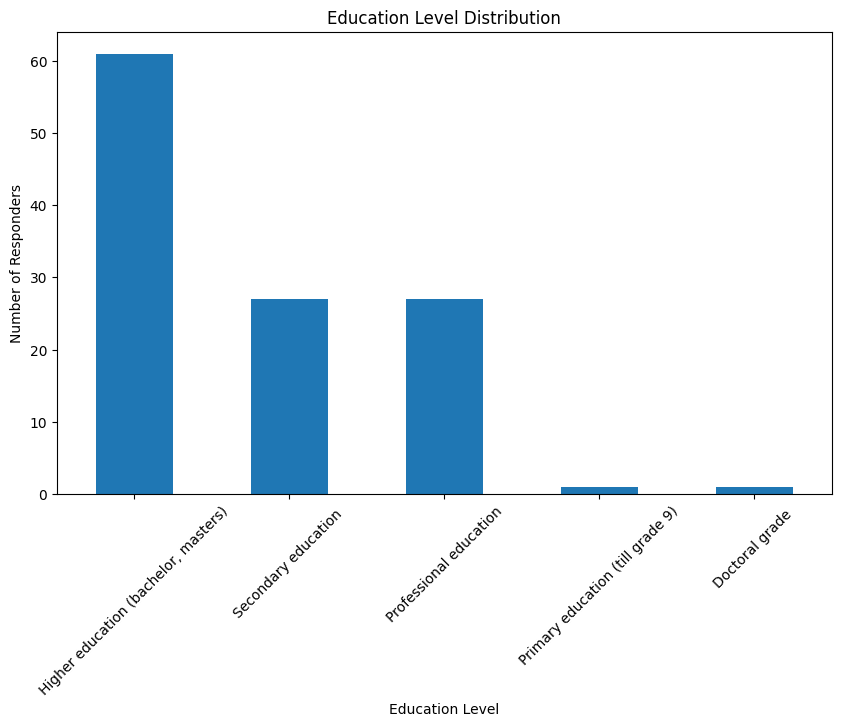

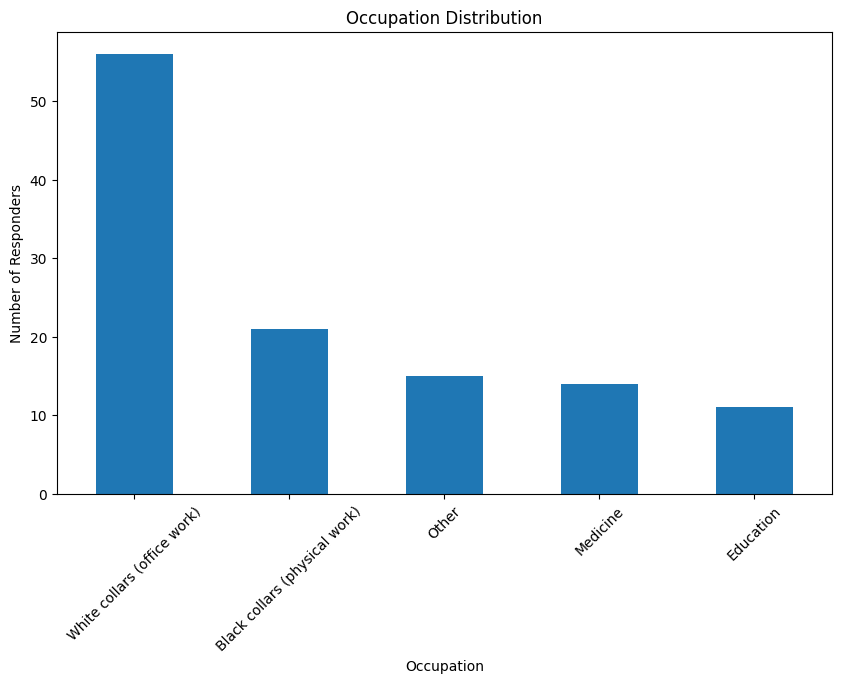

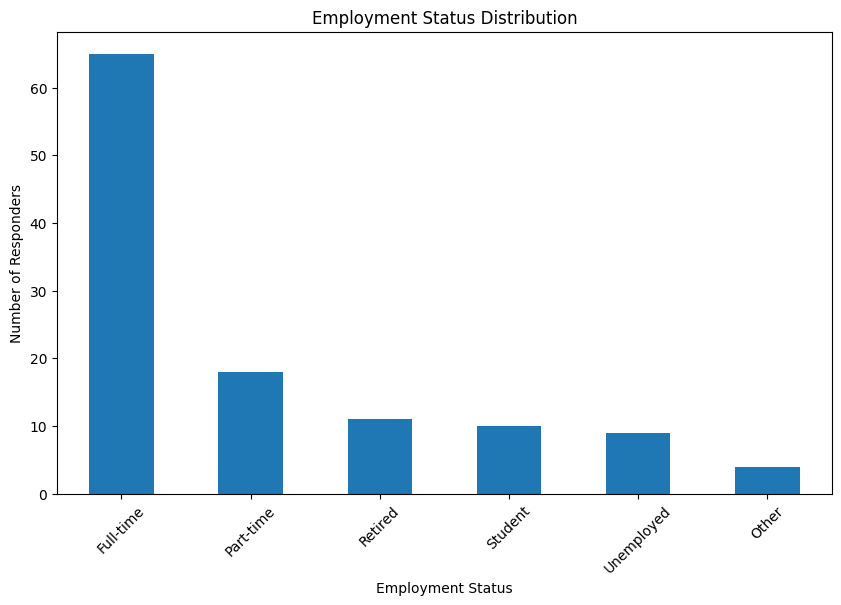

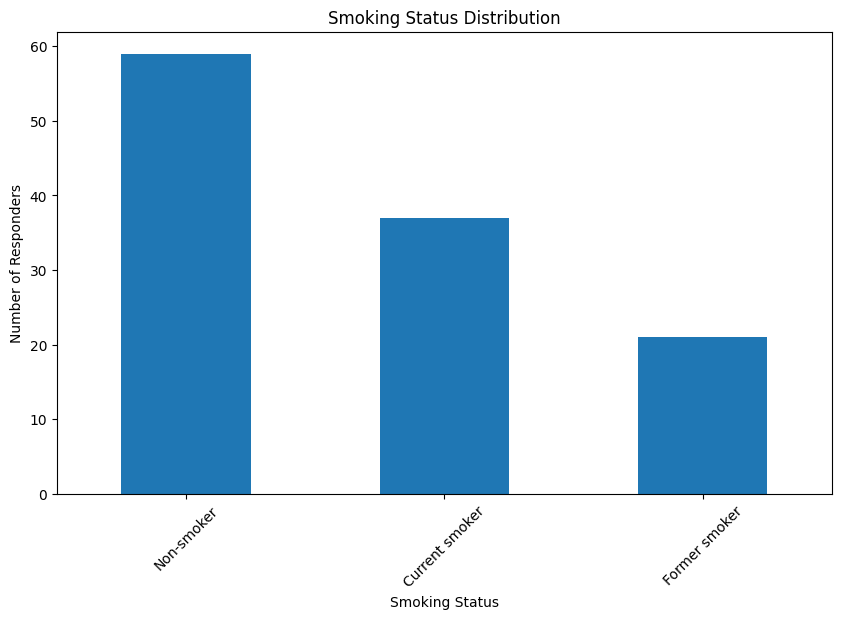

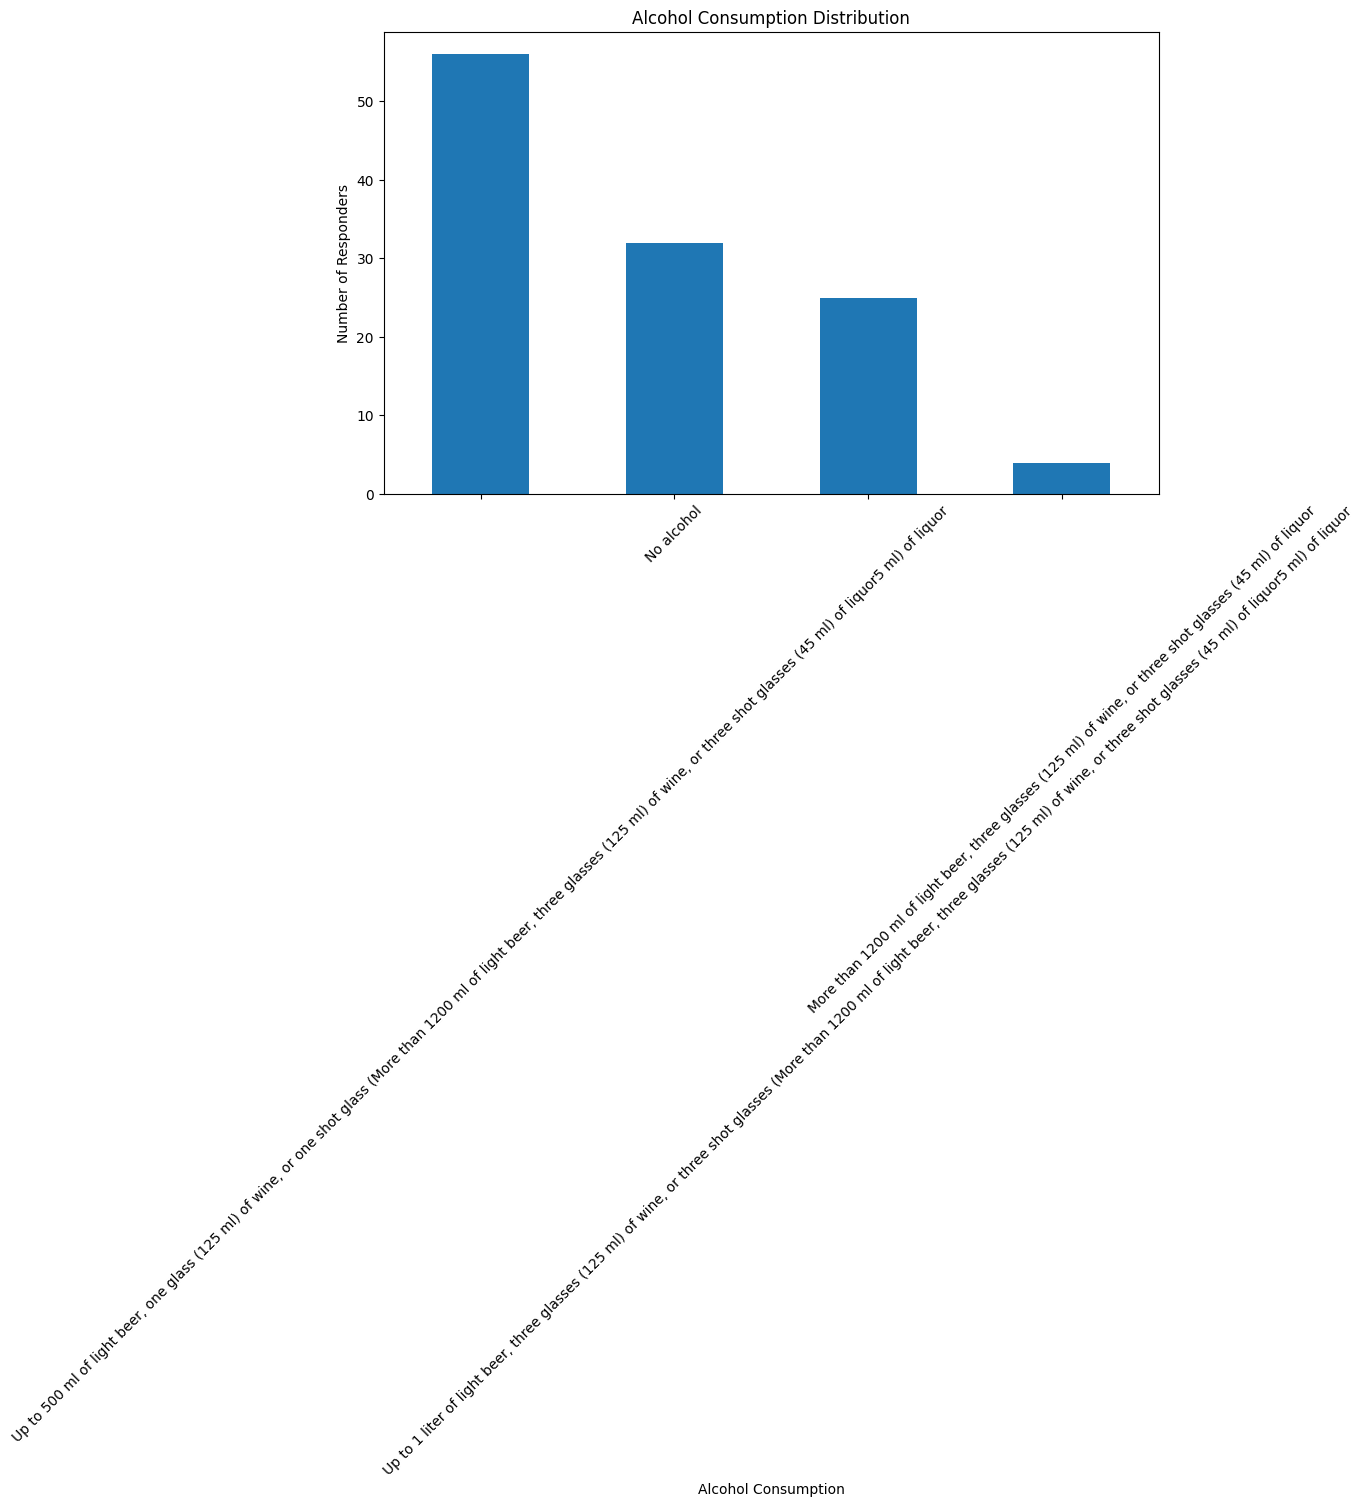

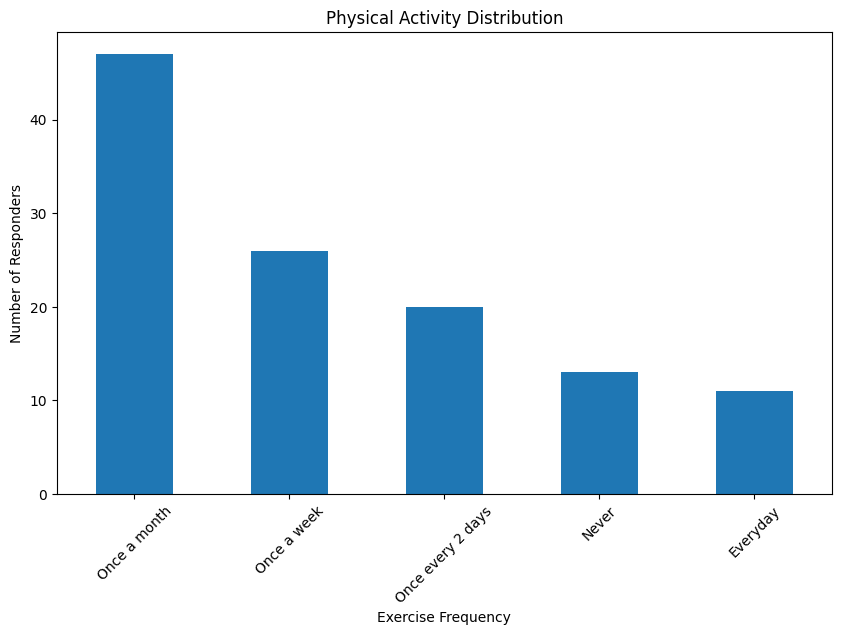

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Age distribution visualization
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Mean age of female participants
mean_age_female = df[df['Gender'] == 'Female']['Age'].mean()
display("Mean Age of Female Participants:", mean_age_female)

# Mean age of male participants
mean_age_male = df[df['Gender'] == 'Male']['Age'].mean()
display("Mean Age of Male Participants:", mean_age_male)

# Responders by city
city_distribution = df['City/town/village'].value_counts()
total_responders = len(df)
city_percentage = (city_distribution / total_responders) * 100
display("Responders by City:")
display(city_distribution)
display("Percentage by City:")
display(city_percentage)

# Marital status
marital_status_distribution = df['Marital Status'].value_counts()
marital_status_percentage = (marital_status_distribution / total_responders) * 100
display("Marital Status Distribution:")
display(marital_status_distribution)
display("Marital Status Percentage:")
display(marital_status_percentage)

# Number of children
children_distribution = df['Number of children'].value_counts()
children_percentage = (children_distribution / total_responders) * 100
display("Number of Children Distribution:")
display(children_distribution)
display("Number of Children Percentage:")
display(children_percentage)

# Level of education
education_distribution = df['Highest level of school completed'].value_counts()
education_percentage = (education_distribution / total_responders) * 100
display("Education Level Distribution:")
display(education_distribution)
display("Education Level Percentage:")
display(education_percentage)

# Occupation and employment status
occupation_distribution = df['Occupation'].value_counts()
occupation_percentage = (occupation_distribution / total_responders) * 100
display("Occupation Distribution:")
display(occupation_distribution)
display("Occupation Percentage:")
display(occupation_percentage)

employment_status_distribution = df['Employment status'].value_counts()
employment_status_percentage = (employment_status_distribution / total_responders) * 100
display("Employment Status Distribution:")
display(employment_status_distribution)
display("Employment Status Percentage:")
display(employment_status_percentage)

# Smoking status
smoking_status_distribution = df['Smoking status'].value_counts()
smoking_status_percentage = (smoking_status_distribution / total_responders) * 100
display("Smoking Status Distribution:")
display(smoking_status_distribution)
display("Smoking Status Percentage:")
display(smoking_status_percentage)

# Alcohol consumption
alcohol_consumption_distribution = df['Daily alcohol consumption '].value_counts()
alcohol_consumption_percentage = (alcohol_consumption_distribution / total_responders) * 100
display("Alcohol Consumption Distribution:")
display(alcohol_consumption_distribution)
display("Alcohol Consumption Percentage:")
display(alcohol_consumption_percentage)

# Physical activity
physical_activity_distribution = df['Exercise frequency'].value_counts()
physical_activity_percentage = (physical_activity_distribution / total_responders) * 100
display("Physical Activity Distribution:")
display(physical_activity_distribution)
display("Physical Activity Percentage:")
display(physical_activity_percentage)

# Function to create distribution chart
def create_distribution_chart(data, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Responders by city
create_distribution_chart(city_distribution, 'City', 'Number of Responders', 'Responders by City')

# Marital status
create_distribution_chart(marital_status_distribution, 'Marital Status', 'Number of Responders', 'Marital Status Distribution')

# Number of children
create_distribution_chart(children_distribution, 'Number of Children', 'Number of Responders', 'Number of Children Distribution')

# Level of education
create_distribution_chart(education_distribution, 'Education Level', 'Number of Responders', 'Education Level Distribution')

# Occupation and employment status
create_distribution_chart(occupation_distribution, 'Occupation', 'Number of Responders', 'Occupation Distribution')
create_distribution_chart(employment_status_distribution, 'Employment Status', 'Number of Responders', 'Employment Status Distribution')

# Smoking status
create_distribution_chart(smoking_status_distribution, 'Smoking Status', 'Number of Responders', 'Smoking Status Distribution')

# Alcohol consumption
create_distribution_chart(alcohol_consumption_distribution, 'Alcohol Consumption', 'Number of Responders', 'Alcohol Consumption Distribution')

# Physical activity
create_distribution_chart(physical_activity_distribution, 'Exercise Frequency', 'Number of Responders', 'Physical Activity Distribution')

Healthcare-related information 
- Sample size and percentage of participants knowing their GP, visited a gynecologist 
- Sample size and percentage of participants who visited GP, and got health check-ups


'Sample size for Knowledge of General Practitioner:'

117

'Sample size for last visit to gynaecologist:'

117

'Sample size for health check-up frequency:'

117

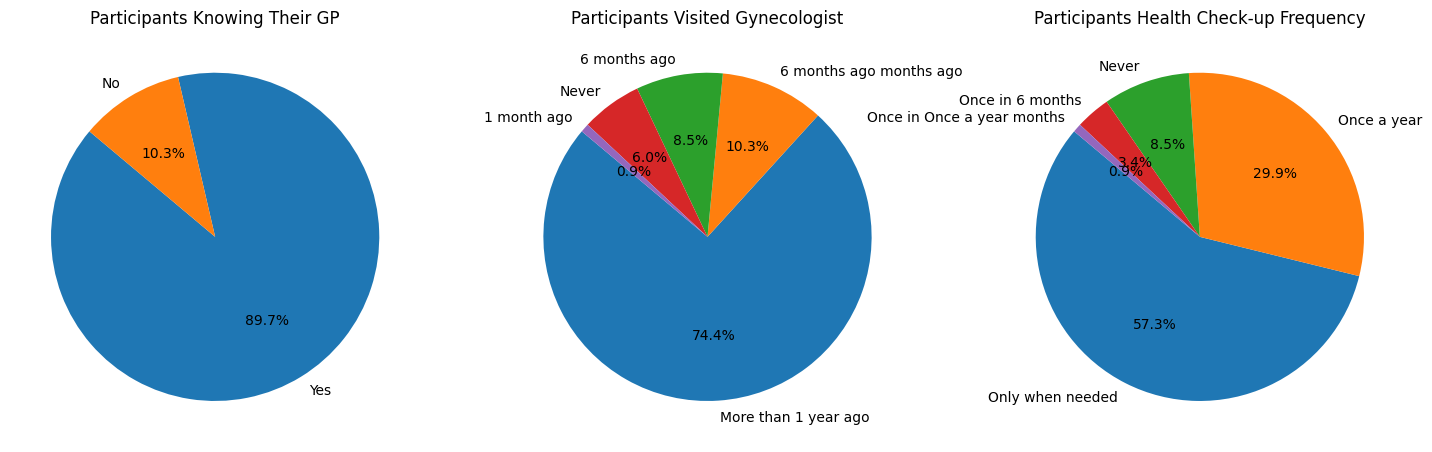

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Define the columns of interest
gp_column = 'Knowledge of General Practitioner'
gynecologist_column = 'For women only: last visit to gynaecologist'
health_checkup_column = 'Health check-up frequency'

# Sample size for Knowledge of General Practitioner
gp_knowledge_sample_size = df['Knowledge of General Practitioner'].notnull().sum()

# Sample size for last visit to gynaecologist
gynecologist_visit_sample_size = df['For women only: last visit to gynaecologist'].notnull().sum()

# Sample size for health check-up frequency
health_checkup_sample_size = df['Health check-up frequency'].notnull().sum()

display("Sample size for Knowledge of General Practitioner:", gp_knowledge_sample_size)
display("Sample size for last visit to gynaecologist:", gynecologist_visit_sample_size)
display("Sample size for health check-up frequency:", health_checkup_sample_size)


# Calculate sample size and percentage for participants knowing their GP
gp_counts = df[gp_column].value_counts()
gp_percentage = gp_counts / gp_counts.sum() * 100

# Calculate sample size and percentage for participants who visited a gynecologist
gynecologist_counts = df[gynecologist_column].value_counts()
gynecologist_percentage = gynecologist_counts / gynecologist_counts.sum() * 100

# Calculate sample size and percentage for participants who got health check-ups
health_checkup_counts = df[health_checkup_column].value_counts()
health_checkup_percentage = health_checkup_counts / health_checkup_counts.sum() * 100

# Plot pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for participants knowing their GP
axes[0].pie(gp_counts, labels=gp_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Participants Knowing Their GP')

# Pie chart for participants who visited a gynecologist
axes[1].pie(gynecologist_counts, labels=gynecologist_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Participants Visited Gynecologist')

# Pie chart for participants who got health check-ups
axes[2].pie(health_checkup_counts, labels=health_checkup_counts.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Participants Health Check-up Frequency')

plt.show()

Cancer screening-related questions 
- Sample size and percentage of participants familiar with the concept of cancer screening (Visualized as distribution?) - done
- Sample size and percentage for the question: What sources have you used to learn about cancer screening tests (if possible as visualization) - done 
- Sample size and percentage for received invitation letter and offer from GP

'Sample size for participants familiar with the concept of cancer screening:'

96

"Number of people who selected 'Yes':"

78

"Percentage of people who selected 'Yes':"

81.25

"Number of people who selected 'No':"

18

"Percentage of people who selected 'No':"

18.75

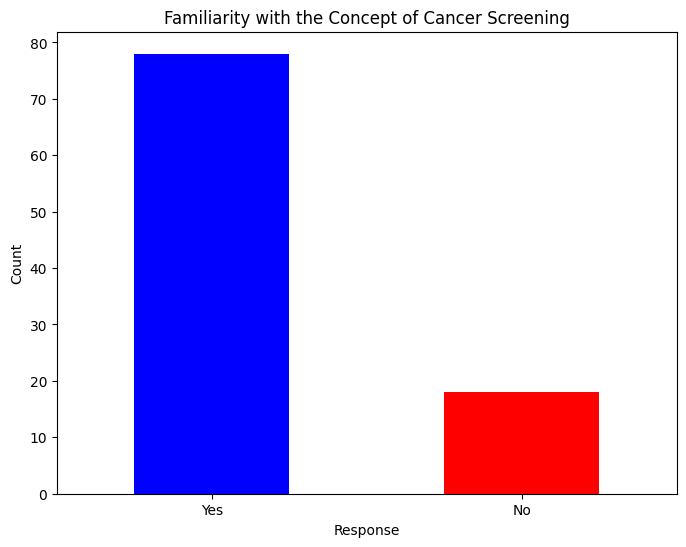

Column: Learnt about canceer screening tests from the Internet- Self-seeking information 
Sample size: 31
Percentage: 26.495726495726498

Column: Learnt about canceer screening tests from social media 
Sample size: 9
Percentage: 7.6923076923076925

Column: Learnt about canceer screening tests from SPKC webpage
Sample size: 4
Percentage: 3.418803418803419

Column: Learnt about canceer screening tests by my GP 
Sample size: 27
Percentage: 23.076923076923077

Column: Learnt about canceer screening tests by other healthcare organisations
Sample size: 21
Percentage: 17.94871794871795

Column: Learnt about canceer screening tests from advertisements 
Sample size: 6
Percentage: 5.128205128205128

Column: Learnt about canceer screening tests from friends, family members
Sample size: 17
Percentage: 14.529914529914532

Column: Learnt about canceer screening tests from other resources 
Sample size: 23
Percentage: 19.65811965811966



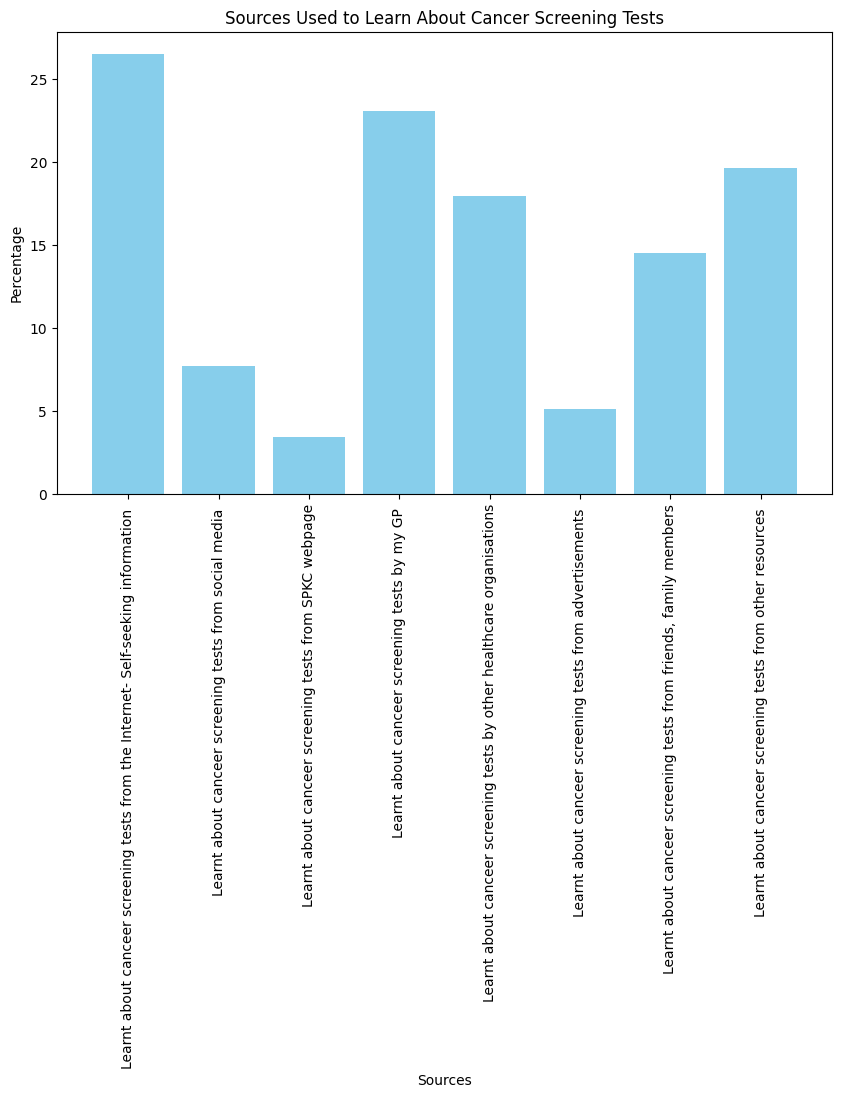

Invitation Columns:
Column: Have you received an invitation letter for cervical cancer screening during last year? 
Sample size: 19
Percentage: 16.23931623931624

Column: Have you received an invitation letter for mammogrpahy during last year?
Sample size: 12
Percentage: 10.256410256410255



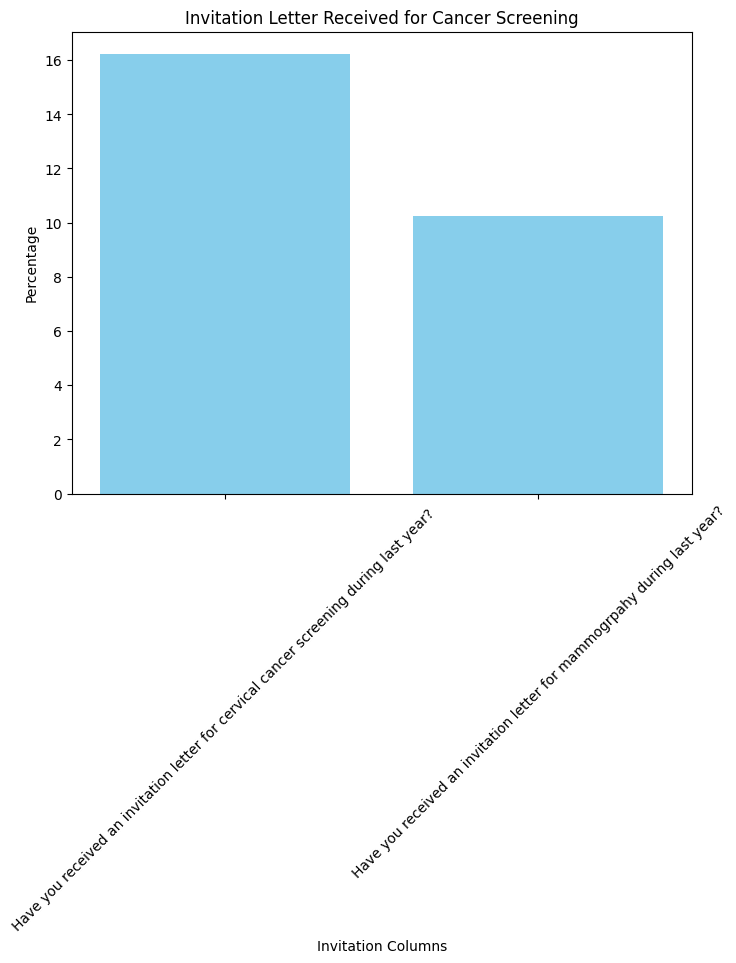

Offer Columns:
Column: Did your GP offer you a faecal-occult blood test during the last year? 
Sample size: 27
Percentage: 23.076923076923077

Column: Did your GP offer you a prostate examination during last year? 
Sample size: 7
Percentage: 5.982905982905983



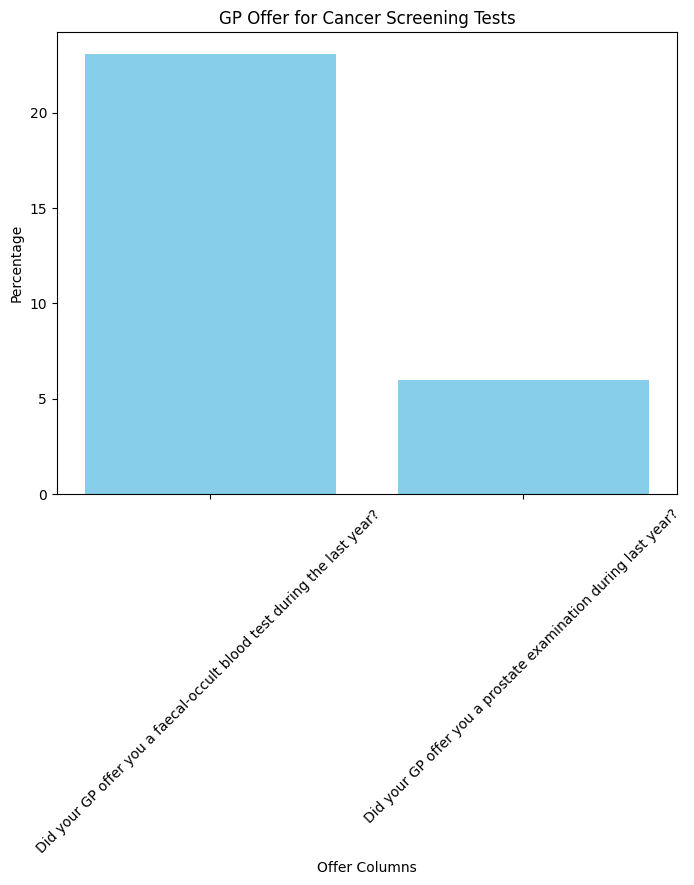

In [8]:
import matplotlib.pyplot as plt

# Calculate the sample size for participants familiar with the concept of cancer screening
cancer_screening_familiarity_sample_size = df['Familiarity with the concept of cancer screening in Latvia'].notnull().sum()

# Get the counts of 'Yes' and 'No' for familiarity with cancer screening
familiarity_counts = df['Familiarity with the concept of cancer screening in Latvia'].value_counts()

# Calculate the percentage of 'Yes' and 'No'
percentage_yes = (familiarity_counts.get('Yes', 0) / cancer_screening_familiarity_sample_size) * 100
percentage_no = (familiarity_counts.get('No', 0) / cancer_screening_familiarity_sample_size) * 100

# Print the sample size, counts, and percentages
display("Sample size for participants familiar with the concept of cancer screening:", cancer_screening_familiarity_sample_size)
display("Number of people who selected 'Yes':", familiarity_counts.get('Yes', 0))
display("Percentage of people who selected 'Yes':", percentage_yes)
display("Number of people who selected 'No':", familiarity_counts.get('No', 0))
display("Percentage of people who selected 'No':", percentage_no)

# Visualize the distribution
plt.figure(figsize=(8, 6))
familiarity_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Familiarity with the Concept of Cancer Screening')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Sample size for sources used to learn about cancer screening tests
sources_used = ['Learnt about canceer screening tests from the Internet- Self-seeking information ', 
                            'Learnt about canceer screening tests from social media ', 
                            'Learnt about canceer screening tests from SPKC webpage', 
                            'Learnt about canceer screening tests by my GP ', 
                            'Learnt about canceer screening tests by other healthcare organisations', 
                            'Learnt about canceer screening tests from advertisements ', 
                            'Learnt about canceer screening tests from friends, family members', 
                            'Learnt about canceer screening tests from other resources '
]

# Calculate the sample size and percentage for each source
sample_sizes = df[sources_used].apply(lambda column: column.notnull().sum())
total_sample_size = len(df)
percentages = (sample_sizes / total_sample_size) * 100

# Print column names, sample sizes, and percentages
for column, sample_size, percentage in zip(sources_used, sample_sizes, percentages):
    print("Column:", column)
    print("Sample size:", sample_size)
    print("Percentage:", percentage)
    print()

# Visualize the percentages
plt.figure(figsize=(10, 6))
plt.bar(sources_used, percentages, color='skyblue')
plt.title('Sources Used to Learn About Cancer Screening Tests')
plt.xlabel('Sources')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

# ------

# Define the columns
invitation_columns = [
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?',
]
offer_columns = [
    'Did your GP offer you a faecal-occult blood test during the last year? ',
    'Did your GP offer you a prostate examination during last year? '
]

# Calculate sample size and percentage for invitation columns
invitation_sample_sizes = df[invitation_columns].apply(lambda column: column.eq('Yes').sum())
total_sample_size = 117
invitation_percentages = (invitation_sample_sizes / total_sample_size) * 100

# Print results for invitation columns
print("Invitation Columns:")
for column, sample_size, percentage in zip(invitation_columns, invitation_sample_sizes, invitation_percentages):
    print("Column:", column)
    print("Sample size:", sample_size)
    print("Percentage:", percentage)
    print()

# Visualize invitation percentages
plt.figure(figsize=(8, 6))
plt.bar(invitation_columns, invitation_percentages, color='skyblue')
plt.title('Invitation Letter Received for Cancer Screening')
plt.xlabel('Invitation Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Calculate sample size and percentage for offer columns
offer_sample_sizes = df[offer_columns].apply(lambda column: column.eq('Yes').sum())
offer_percentages = (offer_sample_sizes / total_sample_size) * 100

# Print results for offer columns
print("Offer Columns:")
for column, sample_size, percentage in zip(offer_columns, offer_sample_sizes, offer_percentages):
    print("Column:", column)
    print("Sample size:", sample_size)
    print("Percentage:", percentage)
    print()

# Visualize offer percentages
plt.figure(figsize=(8, 6))
plt.bar(offer_columns, offer_percentages, color='skyblue')
plt.title('GP Offer for Cancer Screening Tests')
plt.xlabel('Offer Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [9]:
df= pd.read_csv('cleaned_data.csv')
print(df.columns.tolist())

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

Influencing factor (strongly agree - strongly disagree tables)
It is possible to make for each table a Stacked bar chart?

<Figure size 1000x600 with 0 Axes>

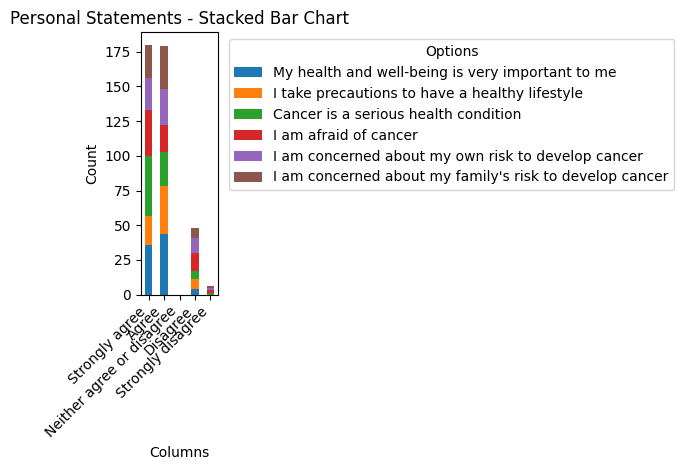

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_40589/1469268349.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

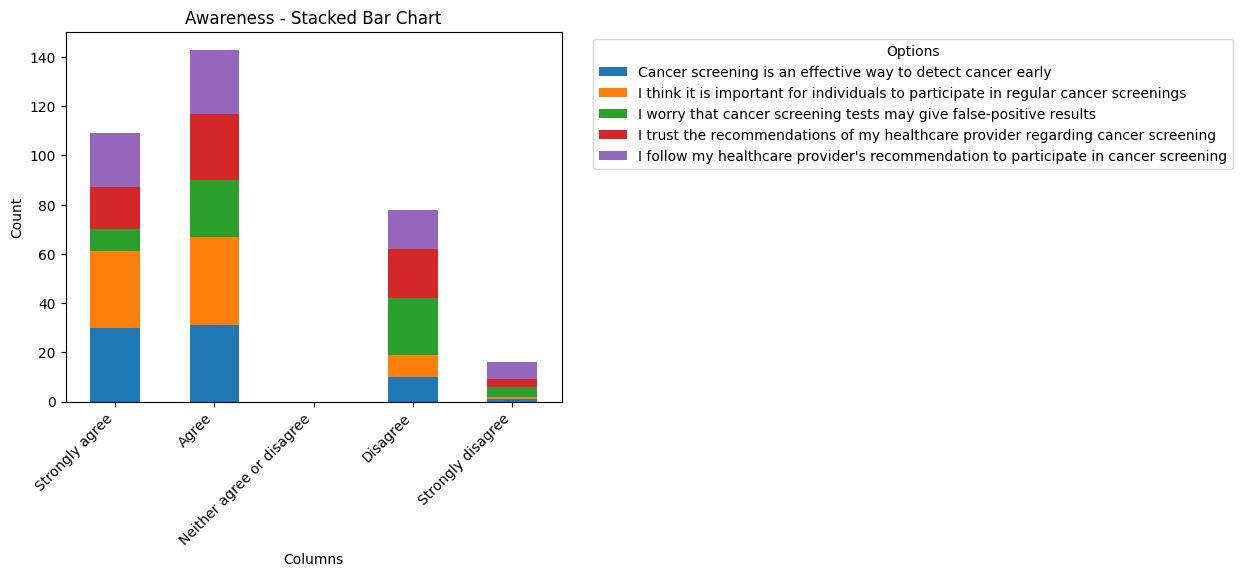

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_40589/1469268349.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

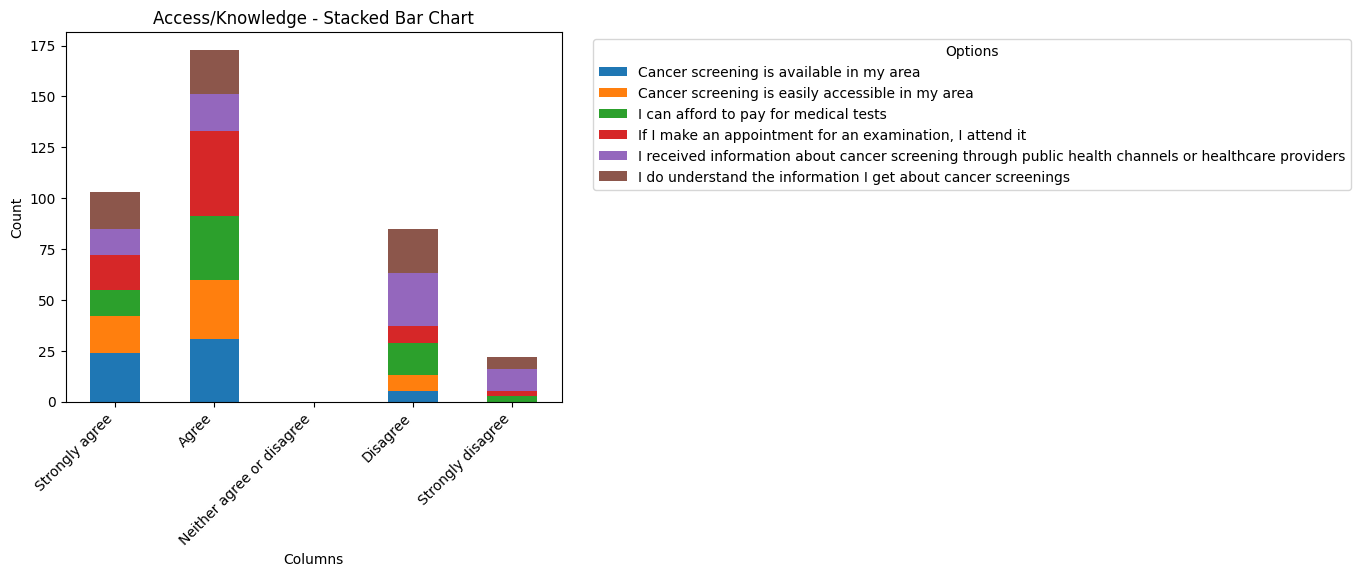

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_40589/1469268349.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

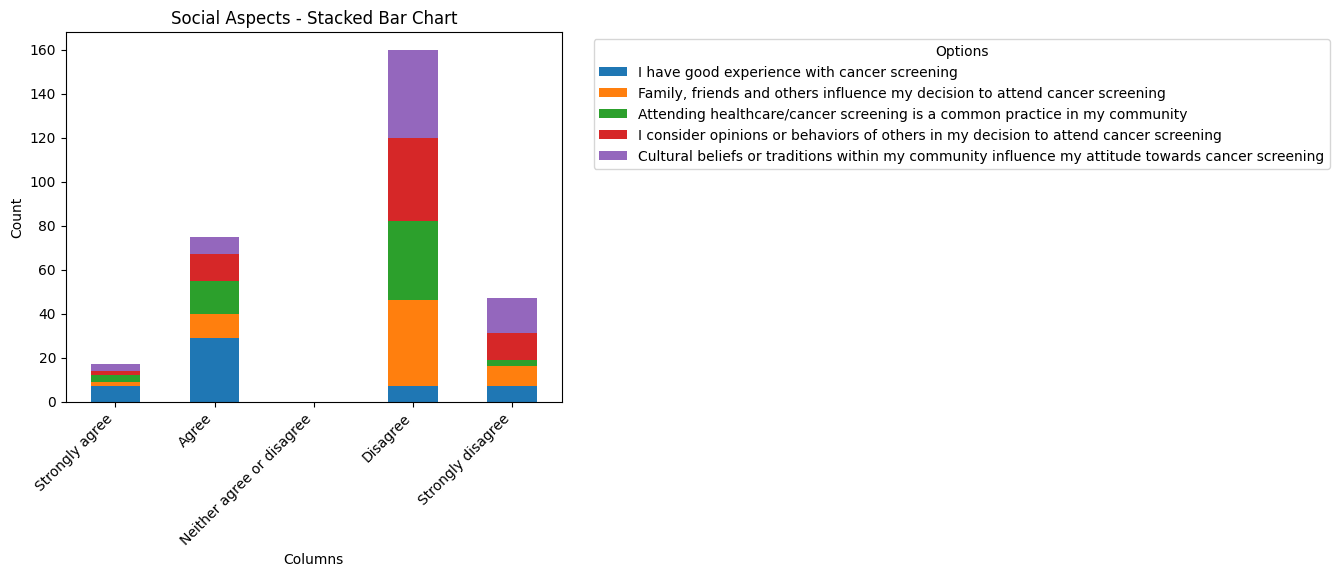

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_40589/1469268349.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

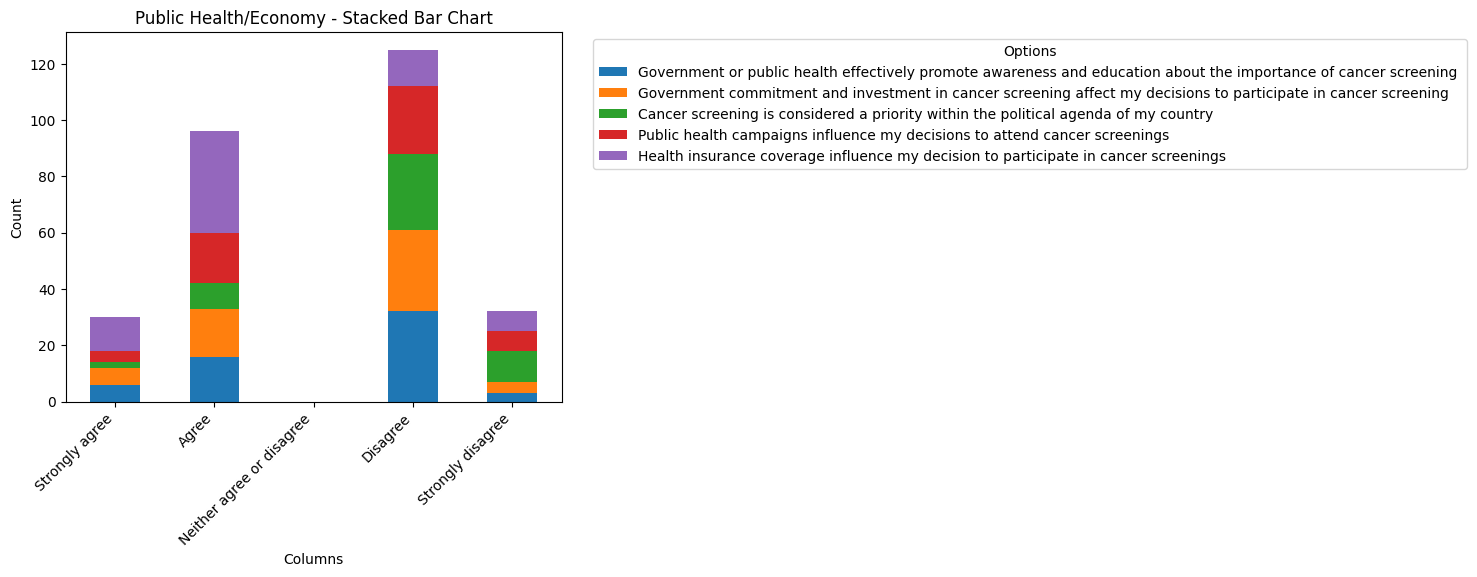

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Define columns for Personal Statements, Awareness, etc.
personal_statements_columns = [
    'My health and well-being is very important to me',
    'I take precautions to have a healthy lifestyle',
    'Cancer is a serious health condition',
    'I am afraid of cancer ',
    'I am concerned about my own risk to develop cancer ',
    "I am concerned about my family's risk to develop cancer"
]

awareness_columns = [
    'Cancer screening is an effective way to detect cancer early',
    'I think it is important for individuals to participate in regular cancer screenings',
    'I worry that cancer screening tests may give false-positive results',
    'I trust the recommendations of my healthcare provider regarding cancer screening',
    "I follow my healthcare provider's recommendation to participate in cancer screening"
]

access_knowledge_columns = [
    'Cancer screening is available in my area ',
    'Cancer screening is easily accessible in my area ',
    'I can afford to pay for medical tests ',
    'If I make an appointment for an examination, I attend it  ',
    'I received information about cancer screening through public health channels or healthcare providers',
    'I do understand the information I get about cancer screenings'
]

social_aspects_columns = [
    'I have good experience with cancer screening ',
    'Family, friends and others influence my decision to attend cancer screening',
    'Attending healthcare/cancer screening is a common practice in my community ',
    'I consider opinions or behaviors of others in my decision to attend cancer screening',
    'Cultural beliefs or traditions within my community influence my attitude towards cancer screening'
]

public_health_economy_columns = [
    'Government or public health effectively promote awareness and education about the importance of cancer screening ',
    'Government commitment and investment in cancer screening affect my decisions to participate in cancer screening ',
    'Cancer screening is considered a priority within the political agenda of my country ',
    'Public health campaigns influence my decisions to attend cancer screenings',
    'Health insurance coverage influence my decision to participate in cancer screenings'
]

# Function to calculate count of options
def calculate_option_counts(columns):
    option_counts = pd.concat([df[column].value_counts().reindex(['Strongly agree', 'Agree', 'Neither agree or disagree', 'Disagree', 'Strongly disagree'], fill_value=0) for column in columns], axis=1, keys=columns)
    return option_counts

# Function to create stacked bar chart
def create_stacked_bar_chart(option_counts, aspect):
    plt.figure(figsize=(10, 6))
    option_counts.plot(kind='bar', stacked=True)
    plt.title(f'{aspect} - Stacked Bar Chart')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Options', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Calculate counts and create stacked bar charts for each aspect
columns_lists = [
    personal_statements_columns,
    awareness_columns,
    access_knowledge_columns,
    social_aspects_columns,
    public_health_economy_columns
]

aspects = ['Personal Statements', 'Awareness', 'Access/Knowledge', 'Social Aspects', 'Public Health/Economy']

for columns, aspect in zip(columns_lists, aspects):
    aspect_counts = calculate_option_counts(columns)
    create_stacked_bar_chart(aspect_counts, aspect)


<Figure size 1000x600 with 0 Axes>

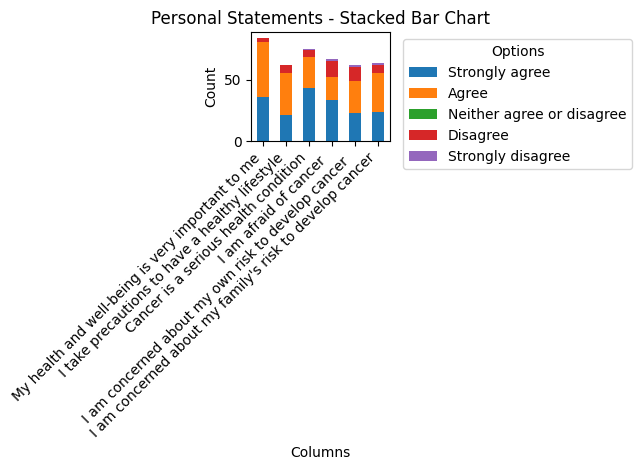

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_40589/639930071.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

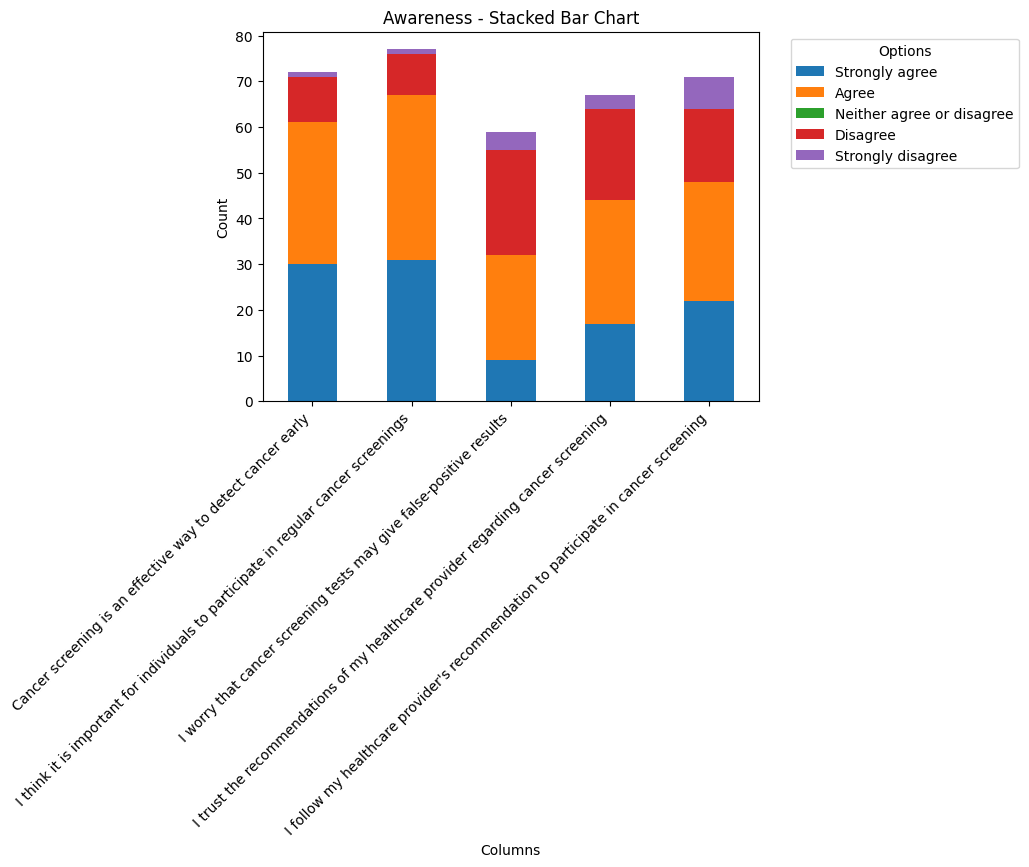

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_40589/639930071.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

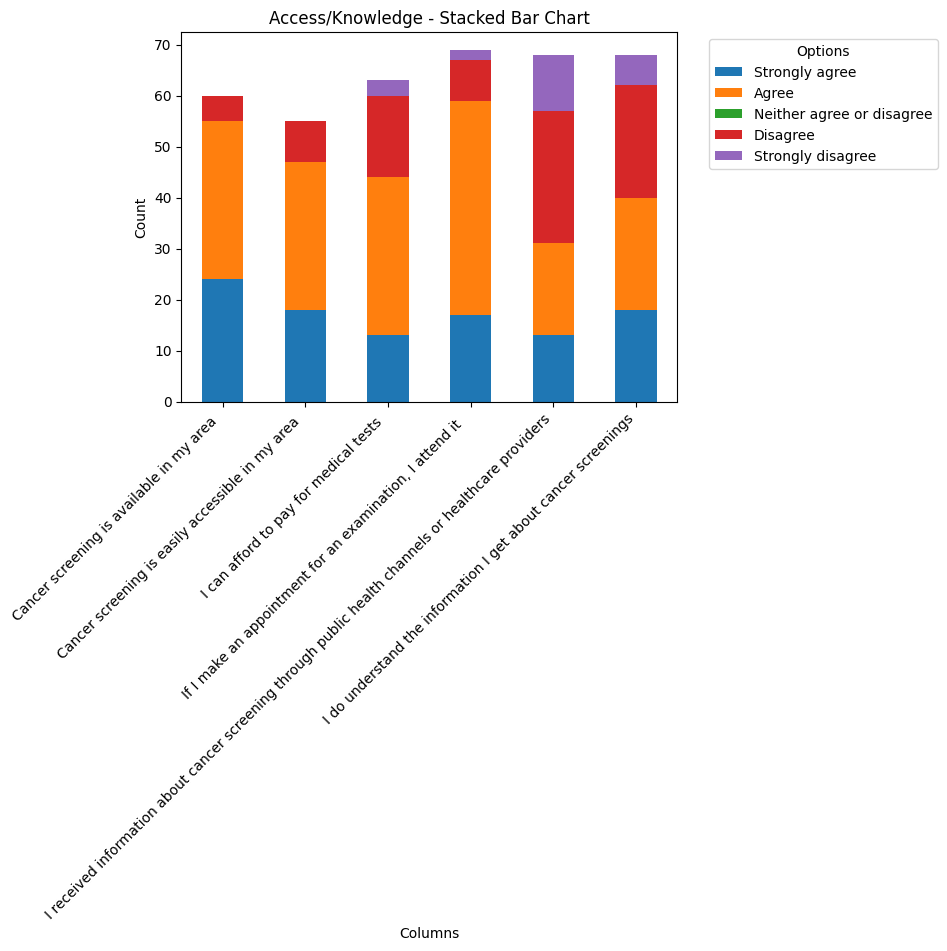

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_40589/639930071.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

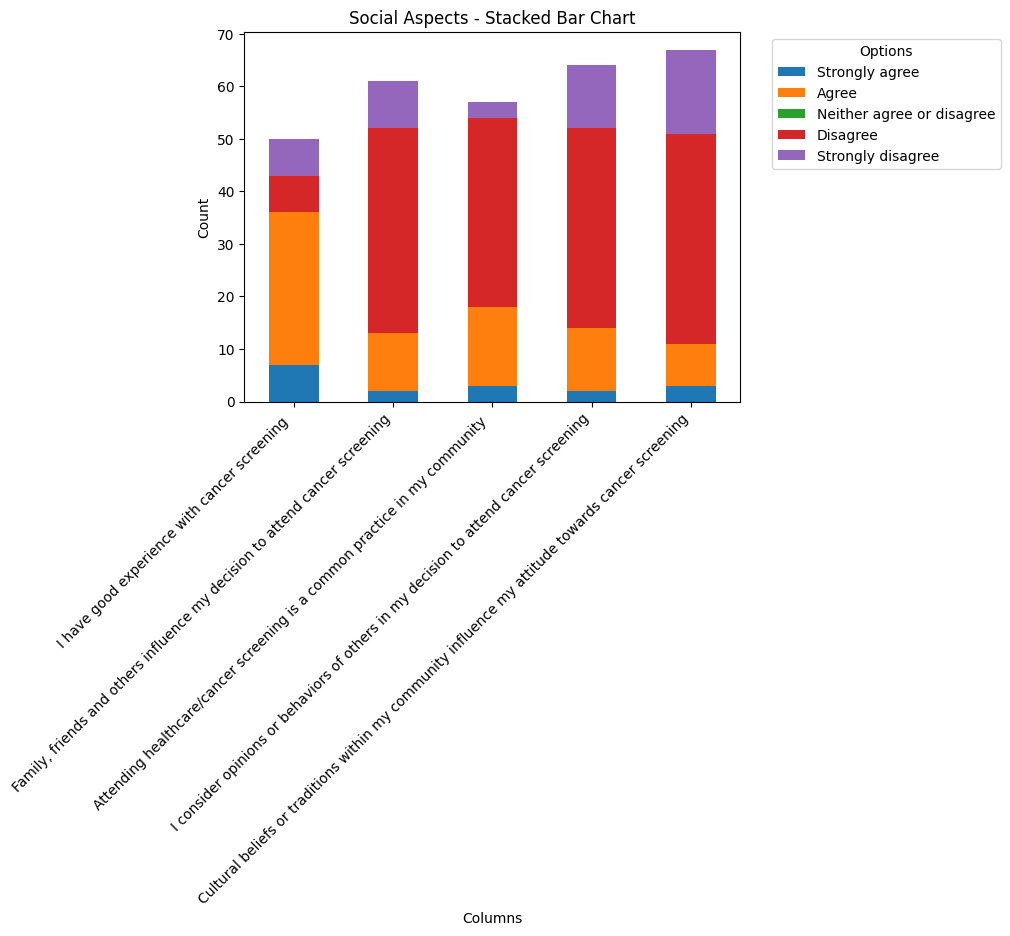

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_40589/639930071.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

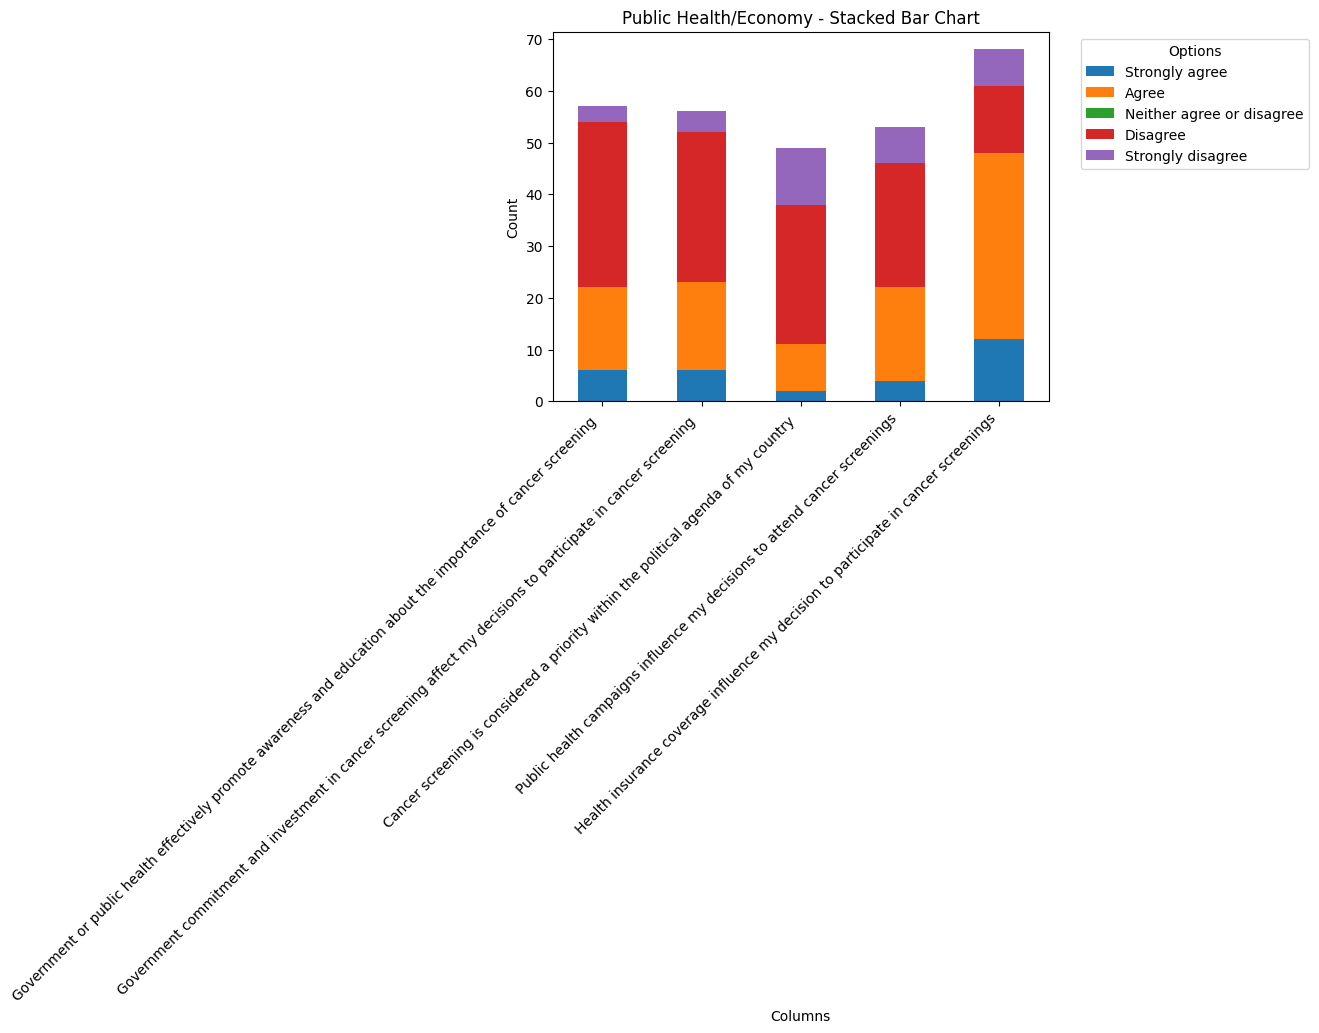

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Define columns for Personal Statements, Awareness, etc.
personal_statements_columns = [
    'My health and well-being is very important to me',
    'I take precautions to have a healthy lifestyle',
    'Cancer is a serious health condition',
    'I am afraid of cancer ',
    'I am concerned about my own risk to develop cancer ',
    "I am concerned about my family's risk to develop cancer"
]

awareness_columns = [
    'Cancer screening is an effective way to detect cancer early',
    'I think it is important for individuals to participate in regular cancer screenings',
    'I worry that cancer screening tests may give false-positive results',
    'I trust the recommendations of my healthcare provider regarding cancer screening',
    "I follow my healthcare provider's recommendation to participate in cancer screening"
]

access_knowledge_columns = [
    'Cancer screening is available in my area ',
    'Cancer screening is easily accessible in my area ',
    'I can afford to pay for medical tests ',
    'If I make an appointment for an examination, I attend it  ',
    'I received information about cancer screening through public health channels or healthcare providers',
    'I do understand the information I get about cancer screenings'
]

social_aspects_columns = [
    'I have good experience with cancer screening ',
    'Family, friends and others influence my decision to attend cancer screening',
    'Attending healthcare/cancer screening is a common practice in my community ',
    'I consider opinions or behaviors of others in my decision to attend cancer screening',
    'Cultural beliefs or traditions within my community influence my attitude towards cancer screening'
]

public_health_economy_columns = [
    'Government or public health effectively promote awareness and education about the importance of cancer screening ',
    'Government commitment and investment in cancer screening affect my decisions to participate in cancer screening ',
    'Cancer screening is considered a priority within the political agenda of my country ',
    'Public health campaigns influence my decisions to attend cancer screenings',
    'Health insurance coverage influence my decision to participate in cancer screenings'
]

# Function to calculate count of options
def calculate_option_counts(columns):
    option_counts = pd.concat([df[column].value_counts().reindex(['Strongly agree', 'Agree', 'Neither agree or disagree', 'Disagree', 'Strongly disagree'], fill_value=0) for column in columns], axis=1, keys=columns)
    return option_counts

# Function to create stacked bar chart
def create_stacked_bar_chart(option_counts, aspect):
    plt.figure(figsize=(10, 6))
    option_counts.T.plot(kind='bar', stacked=True)
    plt.title(f'{aspect} - Stacked Bar Chart')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Options', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Calculate counts and create stacked bar charts for each aspect
columns_lists = [
    personal_statements_columns,
    awareness_columns,
    access_knowledge_columns,
    social_aspects_columns,
    public_health_economy_columns
]

aspects = ['Personal Statements', 'Awareness', 'Access/Knowledge', 'Social Aspects', 'Public Health/Economy']

for columns, aspect in zip(columns_lists, aspects):
    aspect_counts = calculate_option_counts(columns)
    create_stacked_bar_chart(aspect_counts, aspect)

Motivation factors: Is it possible to have something like a pie chart of bar chart/histogram? Also with the sample size and percentages for each factor?

    

Column: My health and well-being is very important to me
Sample Size: 84
Percentages:
My health and well-being is very important to me
Strongly agree               42.857143
Agree                        52.380952
Neither agree or disagree     0.000000
Disagree                      4.761905
Strongly disagree             0.000000
Name: count, dtype: float64
Option Counts:
My health and well-being is very important to me
Strongly agree               36
Agree                        44
Neither agree or disagree     0
Disagree                      4
Strongly disagree             0
Name: count, dtype: int64



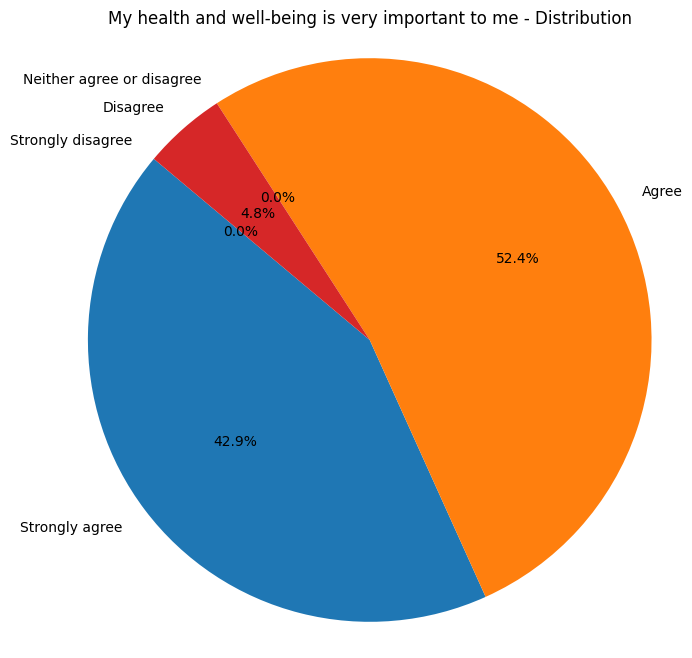

Column: Cancer screening is an effective way to detect cancer early
Sample Size: 72
Percentages:
Cancer screening is an effective way to detect cancer early
Strongly agree               41.666667
Agree                        43.055556
Neither agree or disagree     0.000000
Disagree                     13.888889
Strongly disagree             1.388889
Name: count, dtype: float64
Option Counts:
Cancer screening is an effective way to detect cancer early
Strongly agree               30
Agree                        31
Neither agree or disagree     0
Disagree                     10
Strongly disagree             1
Name: count, dtype: int64



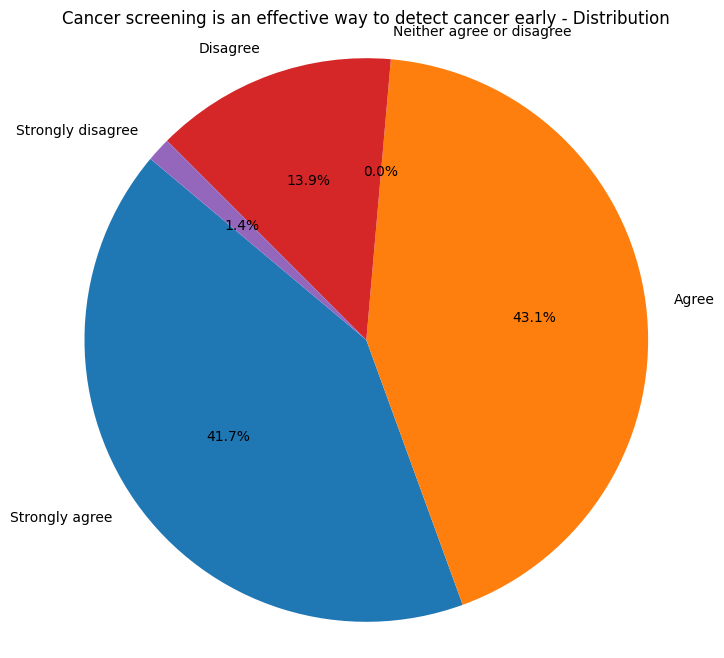

Column: I trust the recommendations of my healthcare provider regarding cancer screening
Sample Size: 67
Percentages:
I trust the recommendations of my healthcare provider regarding cancer screening
Strongly agree               25.373134
Agree                        40.298507
Neither agree or disagree     0.000000
Disagree                     29.850746
Strongly disagree             4.477612
Name: count, dtype: float64
Option Counts:
I trust the recommendations of my healthcare provider regarding cancer screening
Strongly agree               17
Agree                        27
Neither agree or disagree     0
Disagree                     20
Strongly disagree             3
Name: count, dtype: int64



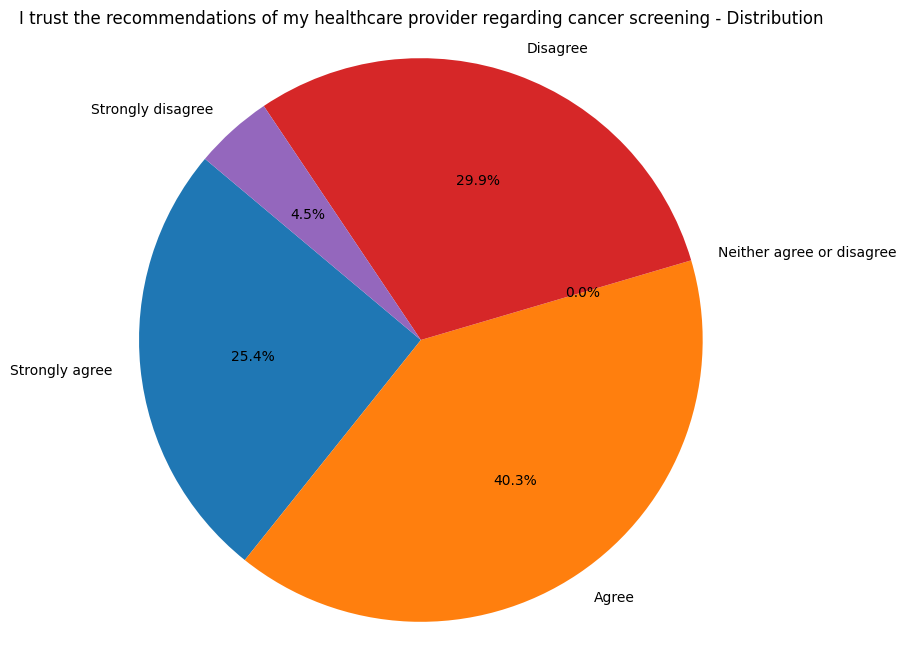

Column: I follow my healthcare provider's recommendation to participate in cancer screening
Sample Size: 71
Percentages:
I follow my healthcare provider's recommendation to participate in cancer screening
Strongly agree               30.985915
Agree                        36.619718
Neither agree or disagree     0.000000
Disagree                     22.535211
Strongly disagree             9.859155
Name: count, dtype: float64
Option Counts:
I follow my healthcare provider's recommendation to participate in cancer screening
Strongly agree               22
Agree                        26
Neither agree or disagree     0
Disagree                     16
Strongly disagree             7
Name: count, dtype: int64



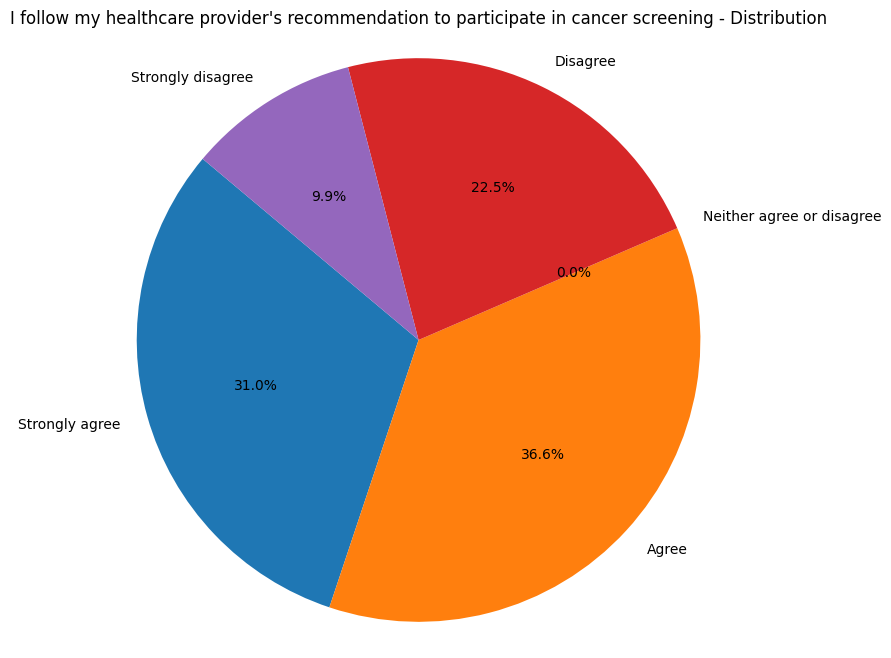

Column: I do understand the information I get about cancer screenings
Sample Size: 68
Percentages:
I do understand the information I get about cancer screenings
Strongly agree               26.470588
Agree                        32.352941
Neither agree or disagree     0.000000
Disagree                     32.352941
Strongly disagree             8.823529
Name: count, dtype: float64
Option Counts:
I do understand the information I get about cancer screenings
Strongly agree               18
Agree                        22
Neither agree or disagree     0
Disagree                     22
Strongly disagree             6
Name: count, dtype: int64



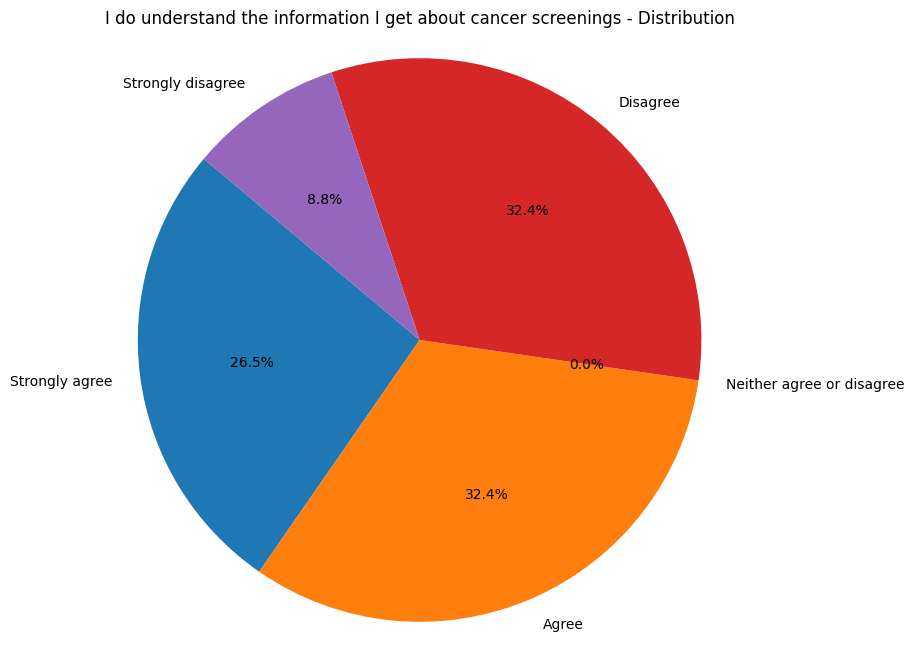

Column: I have good experience with cancer screening 
Sample Size: 50
Percentages:
I have good experience with cancer screening 
Strongly agree               14.0
Agree                        58.0
Neither agree or disagree     0.0
Disagree                     14.0
Strongly disagree            14.0
Name: count, dtype: float64
Option Counts:
I have good experience with cancer screening 
Strongly agree                7
Agree                        29
Neither agree or disagree     0
Disagree                      7
Strongly disagree             7
Name: count, dtype: int64



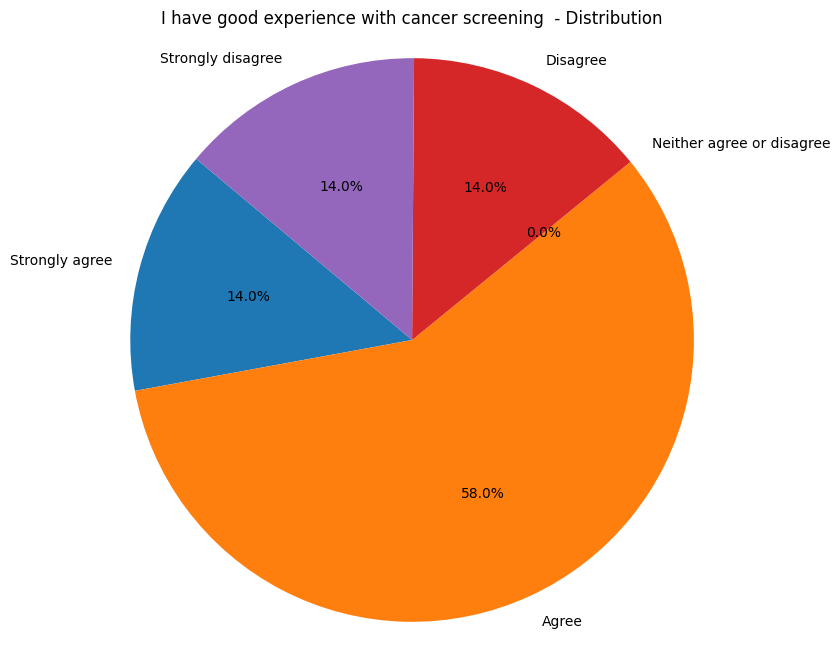

Column: Family, friends and others influence my decision to attend cancer screening
Sample Size: 61
Percentages:
Family, friends and others influence my decision to attend cancer screening
Strongly agree                3.278689
Agree                        18.032787
Neither agree or disagree     0.000000
Disagree                     63.934426
Strongly disagree            14.754098
Name: count, dtype: float64
Option Counts:
Family, friends and others influence my decision to attend cancer screening
Strongly agree                2
Agree                        11
Neither agree or disagree     0
Disagree                     39
Strongly disagree             9
Name: count, dtype: int64



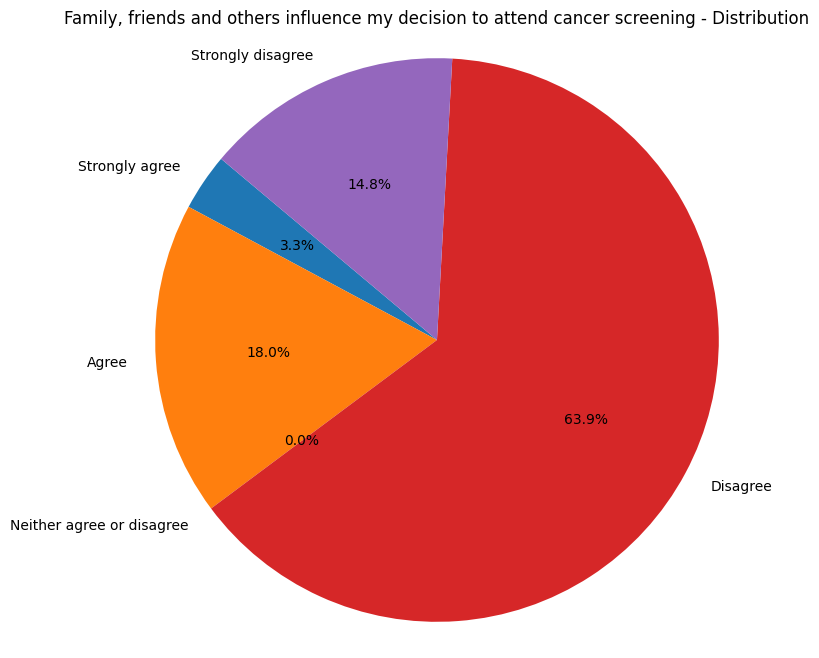

Column: Government or public health effectively promote awareness and education about the importance of cancer screening 
Sample Size: 57
Percentages:
Government or public health effectively promote awareness and education about the importance of cancer screening 
Strongly agree               10.526316
Agree                        28.070175
Neither agree or disagree     0.000000
Disagree                     56.140351
Strongly disagree             5.263158
Name: count, dtype: float64
Option Counts:
Government or public health effectively promote awareness and education about the importance of cancer screening 
Strongly agree                6
Agree                        16
Neither agree or disagree     0
Disagree                     32
Strongly disagree             3
Name: count, dtype: int64



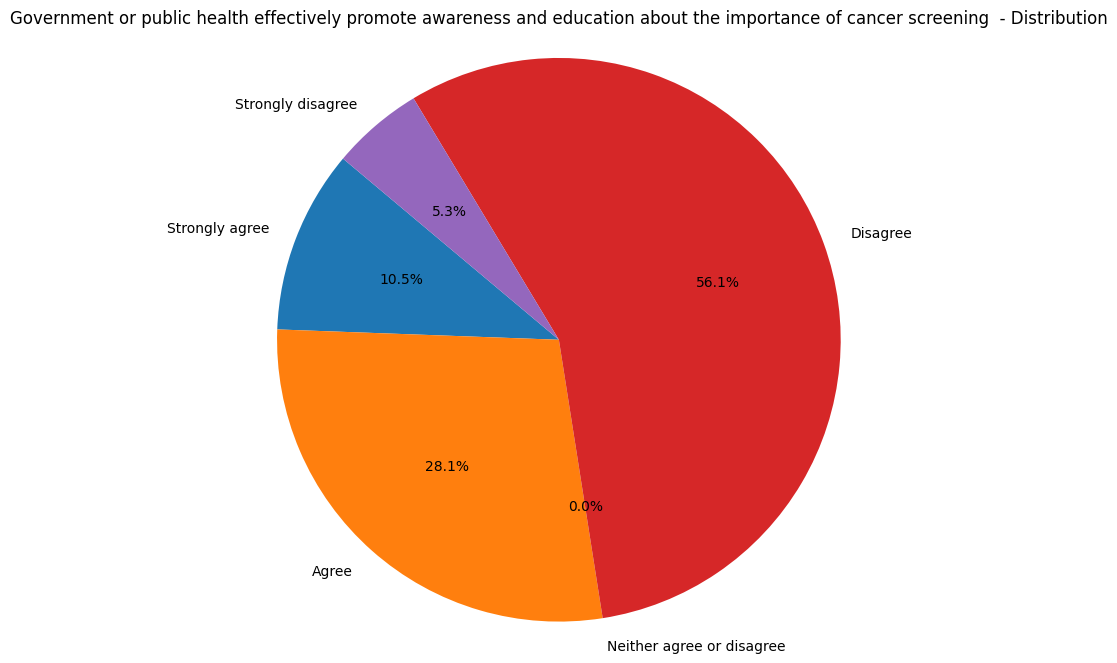

Column: Public health campaigns influence my decisions to attend cancer screenings
Sample Size: 53
Percentages:
Public health campaigns influence my decisions to attend cancer screenings
Strongly agree                7.547170
Agree                        33.962264
Neither agree or disagree     0.000000
Disagree                     45.283019
Strongly disagree            13.207547
Name: count, dtype: float64
Option Counts:
Public health campaigns influence my decisions to attend cancer screenings
Strongly agree                4
Agree                        18
Neither agree or disagree     0
Disagree                     24
Strongly disagree             7
Name: count, dtype: int64



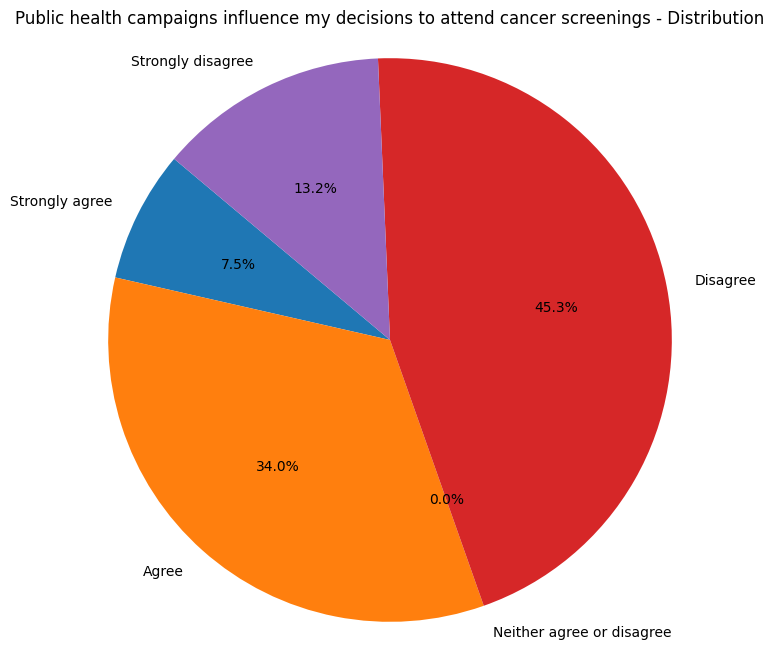

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Define relevant columns for motivation factors
motivation_factors_columns = [
    'My health and well-being is very important to me',   
    'Cancer screening is an effective way to detect cancer early',
    'I trust the recommendations of my healthcare provider regarding cancer screening',
    "I follow my healthcare provider's recommendation to participate in cancer screening",
    'I do understand the information I get about cancer screenings',
    'I have good experience with cancer screening ',
    'Family, friends and others influence my decision to attend cancer screening',
    'Government or public health effectively promote awareness and education about the importance of cancer screening ',
    'Public health campaigns influence my decisions to attend cancer screenings',
]

# Function to calculate sample size, percentage, and number of people selecting each option
def calculate_option_counts(column):
    option_counts = df[column].value_counts().reindex(['Strongly agree', 'Agree', 'Neither agree or disagree', 'Disagree', 'Strongly disagree'], fill_value=0)
    sample_size = option_counts.sum()
    percentages = (option_counts / sample_size) * 100
    return sample_size, percentages, option_counts

# Function to create pie chart
def create_pie_chart(column, sample_size, percentages):
    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'{column} - Distribution')
    plt.axis('equal')
    plt.show()

# Calculate sample size, percentage, and number of people selecting each option for each column
for column in motivation_factors_columns:
    sample_size, percentages, option_counts = calculate_option_counts(column)
    print(f'Column: {column}')
    print(f'Sample Size: {sample_size}')
    print('Percentages:')
    print(percentages)
    print('Option Counts:')
    print(option_counts)
    print()
    # Create pie chart
    create_pie_chart(column, sample_size, percentages)


## Answering study questions

In [ ]:
all_columns = df.columns.tolist()
print(all_columns)

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

# Question-1 
# Does awareness about state-funded cancer screenings affect participation in populational screening in Latvia?

'Awareness participation rate:'

0.37606837606837606

'Awareness non-participation rate:'

0.2905982905982906

'Inference: Awareness participate rate- This indicates that approximately 37.6% of respondents who are aware of cancer screening in Latvia have participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 37.6% have undergone cancer screenings.'

'Awareness non-participation rate- This suggests that approximately 29.1% of respondents who are aware of cancer screening in Latvia have not participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 29.1% have not undergone cancer screenings.'

<Figure size 1400x1000 with 0 Axes>

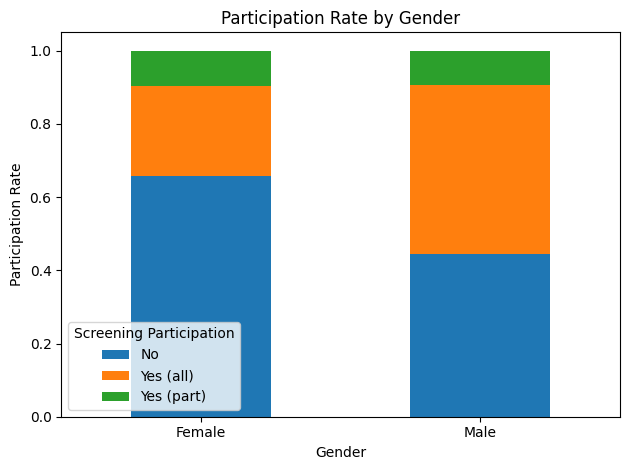

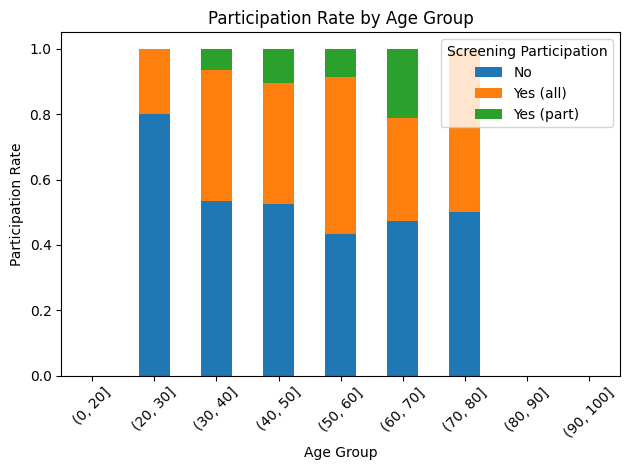

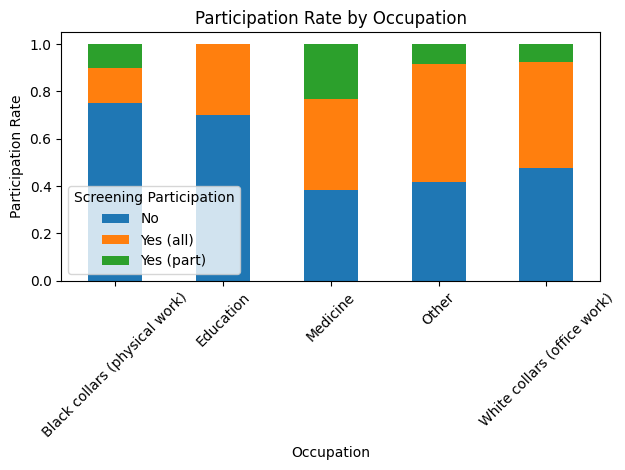

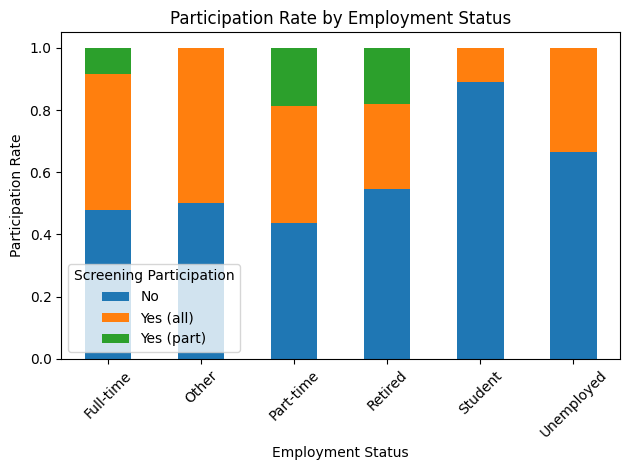

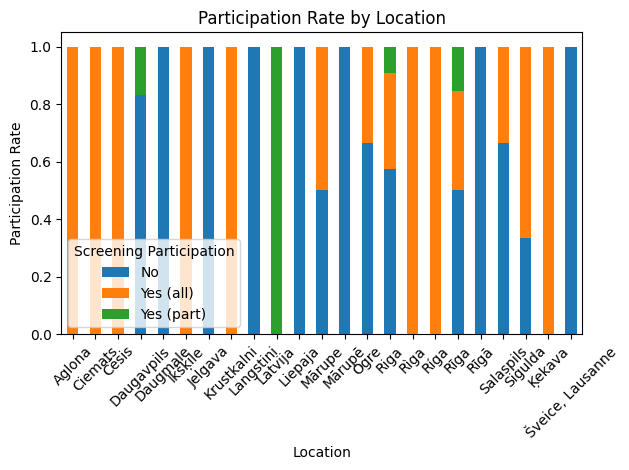

In [ ]:
## Questions from the survey which can be used to answer the question
# Q17: Are you familiar with the concept of cancer screening in Latvia? (Yes/No)
# Q18: What types of cancer screening are you aware of? (Multiple-choice)
# Q19: Which of the following cancer screenings have you attended in the last year? (Multiple-choice)
# Q20: What sources have you used to learn about cancer screening tests? (Multiple-choice)
## Participation in Cancer Screening:
# Q25: If you received invitations for screenings, did you perform the screening? (Yes/No)
# Demographic and Socioeconomic Factors:
# Q1: What is your age? (Continuous)
# Q3: What is your gender? (Male/Female/Other)
# Q4: Where do you live? (City/Town/Village)
# Q8: What is your occupation? (Multiple-choice)
# Q9: What is your employment status? (Multiple-choice)
# Q13: Do you know who your general practitioner is? (Yes/No)


# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Select relevant columns
relevant_columns = [
    'Age', 
    'Gender', 
    'City/town/village', 
    'Occupation', 
    'Employment status',
    'Familiarity with the concept of cancer screening in Latvia',
    'Awareness about screening for cervical cancer (PAP smear)', 
    'Awareness about screening for colorectal cancer (blood in faeces)', 
    ' Awareness about screening for breast cancer (Mammography)', 
    'Awareness about screening for prostate cancer (PSA analysis) ', 
    'Awareness about screening for Colonoscopy', 
    'Awareness about Prostate examination ', 
    'No Awareness about any type of cancer screening',
    'Attended screening for cervical cancer (PAP smear) in the last year', 
    'Attended screening for CRC in the last year ', 
    'Attended screening for breast cancer in the last year', 
    'Attended screening for prostate cancer in the last year', 
    'Attended screening for colonoscopy in the last year ', 
    'Attended screening for prostate in the last year',
    'Not attended any cancer screening in the past year',
    'Learnt about canceer screening tests from the Internet- Self-seeking information ', 
    'Learnt about canceer screening tests from social media ', 
    'Learnt about canceer screening tests by my GP ', 
    'Learnt about canceer screening tests from advertisements ', 
    'Learnt about canceer screening tests from other resources ',
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?', 
    'Did your GP offer you a faecal-occult blood test during the last year? ', 
    'Did your GP offer you a prostate examination during last year? ', 
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
]

data = df[relevant_columns]

# Analyze the relationship between awareness and participation
# Count the number of respondents who are aware, have participated in screenings, and their sociodemographic characteristics
aware_participated = data[(data['Familiarity with the concept of cancer screening in Latvia'] == 'Yes') & 
                          (data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].isin(['Yes - for all the screenings that I received the invitations', 'Yes for a part of screenings that I received the invitations']))]
aware_not_participated = data[(data['Familiarity with the concept of cancer screening in Latvia'] == 'Yes') & 
                              (data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] == 'No')]

# Calculate proportions for different sociodemographic groups
total_responses = data.shape[0]
aware_participation_rate = len(aware_participated) / total_responses
aware_non_participation_rate = len(aware_not_participated) / total_responses

# Display results
display("Awareness participation rate:", aware_participation_rate)
display("Awareness non-participation rate:", aware_non_participation_rate)

display("Inference: Awareness participate rate- This indicates that approximately 37.6% of respondents who are aware of cancer screening in Latvia have participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 37.6% have undergone cancer screenings.")
display("Awareness non-participation rate- This suggests that approximately 29.1% of respondents who are aware of cancer screening in Latvia have not participated in screenings. In other words, out of all respondents who are aware of cancer screening, around 29.1% have not undergone cancer screenings.")

" Visualization:  "

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Define mapping for the response options
response_mapping = {
    "Yes - for all the screenings that I received the invitations": "Yes (all)",
    "Yes for a part of screenings that I received the invitations": "Yes (part)",
    "No": "No"
}

# Make a copy of the DataFrame
data_copy = data.copy()

# Map the responses in the copied DataFrame
data_copy['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data_copy['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(response_mapping)

# Plot participation rate by gender
gender_participation = data_copy.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
gender_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Participation Rate')
plt.xticks(rotation=0)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by age group
age_participation = data_copy.groupby(pd.cut(data_copy['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]), observed=False)['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
age_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by occupation
occupation_participation = data_copy.groupby('Occupation')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
occupation_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by employment status
employment_participation = data_copy.groupby('Employment status')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
employment_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()

# Plot participation rate by city/town/village
location_participation = data_copy.groupby('City/town/village')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()
location_participation.plot(kind='bar', stacked=True)
plt.title('Participation Rate by Location')
plt.xlabel('Location')
plt.ylabel('Participation Rate')
plt.xticks(rotation=45)
plt.legend(title='Screening Participation')
plt.tight_layout()
plt.show()


## Research Question 2
## Are there any gender differences in awareness towards the screening and in participation rates in populational screening in Latvia?

'Difference in awareness rates between genders:'

-0.08358848744641756

'Difference in participation rates between genders:'

-0.09854423292273229

'Difference in awareness rates between genders: -0.0836 means that the awareness rate among one gender (presumably females, as they are often more aware of healthcare issues) is approximately 8.36% lower than the awareness rate among the other gender (presumably males). This negative value suggests that one gender is less aware of cancer screening concepts in Latvia compared to the other gender.'

'Difference in participation rates between genders: -0.0985 means that the participation rate among one gender is approximately 9.85% lower than the participation rate among the other gender. This negative value indicates that one gender participates less in cancer screenings in Latvia compared to the other gender.'

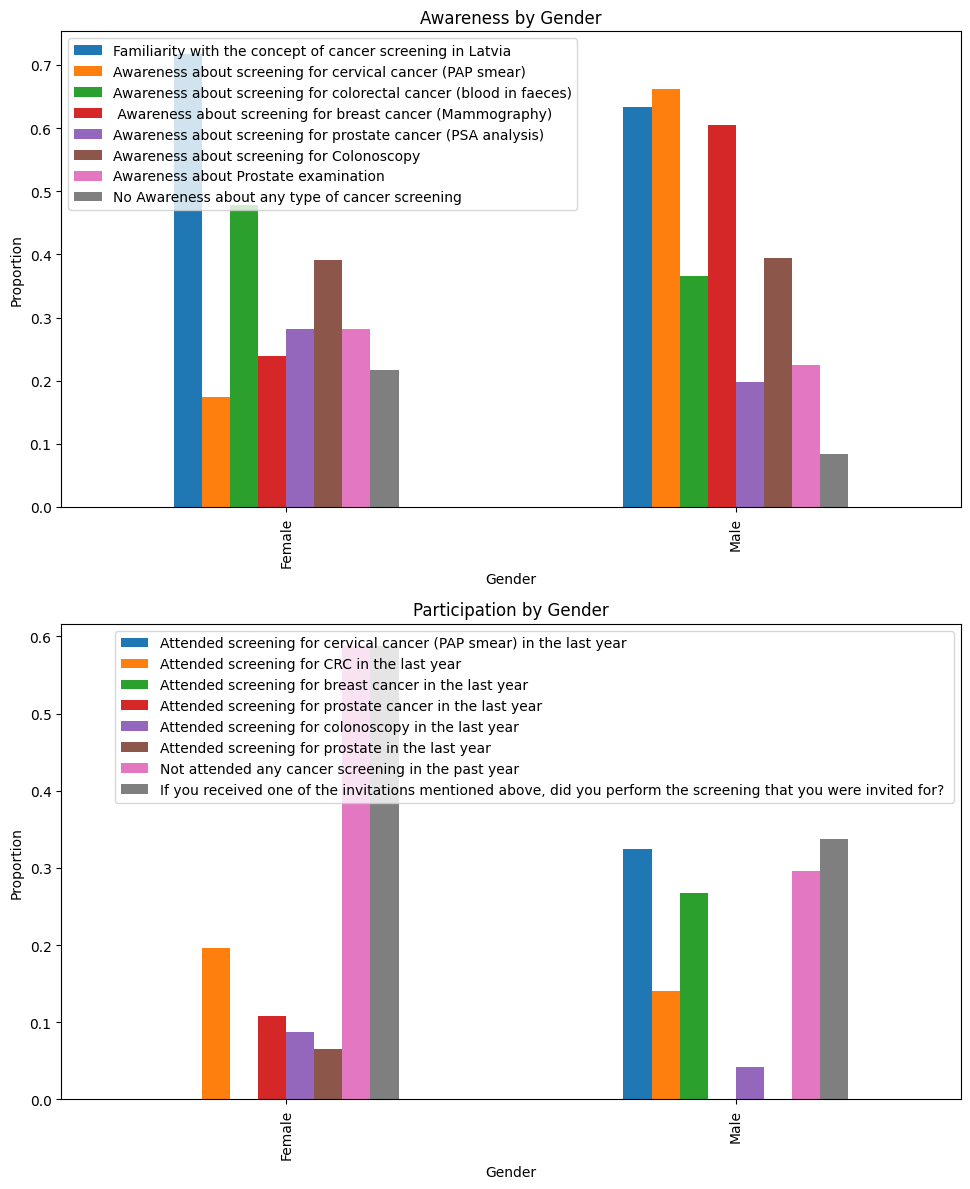

In [ ]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Define mapping for 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for?' column
response_mapping = {
    "Yes - for all the screenings that I received the invitations": "Yes_All",
    "Yes for a part of screenings that I received the invitations": "Yes_Part",
    "No": "No"
}

# Apply mapping to the column
df['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = df['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(response_mapping)


# Select relevant columns
relevant_columns = [
    'Gender',
    'Familiarity with the concept of cancer screening in Latvia',
    'Awareness about screening for cervical cancer (PAP smear)', 
    'Awareness about screening for colorectal cancer (blood in faeces)', 
    ' Awareness about screening for breast cancer (Mammography)', 
    'Awareness about screening for prostate cancer (PSA analysis) ', 
    'Awareness about screening for Colonoscopy', 
    'Awareness about Prostate examination ', 
    'No Awareness about any type of cancer screening',
    'Attended screening for cervical cancer (PAP smear) in the last year', 
    'Attended screening for CRC in the last year ', 
    'Attended screening for breast cancer in the last year', 
    'Attended screening for prostate cancer in the last year', 
    'Attended screening for colonoscopy in the last year ', 
    'Attended screening for prostate in the last year',
    'Not attended any cancer screening in the past year',
    'Learnt about canceer screening tests from the Internet- Self-seeking information ', 
    'Learnt about canceer screening tests from social media ', 
    'Learnt about canceer screening tests by my GP ', 
    'Learnt about canceer screening tests from advertisements ', 
    'Learnt about canceer screening tests from other resources ',
    'Have you received an invitation letter for cervical cancer screening during last year? ', 
    'Have you received an invitation letter for mammogrpahy during last year?', 
    'Did your GP offer you a faecal-occult blood test during the last year? ', 
    'Did your GP offer you a prostate examination during last year? ', 
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
]

# Select relevant data
data = df[relevant_columns]

# Analyze gender differences in awareness and participation rates

# Define a function to calculate participation rates based on the specific entries
def calculate_participation_rate(series):
    # Count the number of 'Yes' and 'No' entries
    yes_count = series.str.contains('Yes').sum()
    no_count = series.str.contains('No').sum()
    
    # Calculate the total count excluding 'No'
    total_count = len(series) - no_count
    
    # Calculate the participation rate
    participation_rate = yes_count / total_count if total_count > 0 else 0
    
    return participation_rate

# Calculate awareness rates by gender
awareness_by_gender = data.groupby('Gender')['Familiarity with the concept of cancer screening in Latvia'].apply(lambda x: (x == 'Yes').mean())

# Calculate participation rates by gender
participation_by_gender = data.groupby('Gender')['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].apply(calculate_participation_rate)

# Calculate the absolute difference in awareness and participation rates between genders
awareness_difference = awareness_by_gender.diff().iloc[-1]
participation_difference = participation_by_gender.diff().iloc[-1]

# Display the results
display("Difference in awareness rates between genders:", awareness_difference)
display("Difference in participation rates between genders:", participation_difference)

"   "
" Inference of the result: "
"   "

display("Difference in awareness rates between genders: -0.0836 means that the awareness rate among one gender (presumably females, as they are often more aware of healthcare issues) is approximately 8.36% lower than the awareness rate among the other gender (presumably males). This negative value suggests that one gender is less aware of cancer screening concepts in Latvia compared to the other gender.")
display("Difference in participation rates between genders: -0.0985 means that the participation rate among one gender is approximately 9.85% lower than the participation rate among the other gender. This negative value indicates that one gender participates less in cancer screenings in Latvia compared to the other gender.")

# Awareness by gender
awareness_by_gender = data.groupby('Gender').agg({
    'Familiarity with the concept of cancer screening in Latvia': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for cervical cancer (PAP smear)': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for colorectal cancer (blood in faeces)': lambda x: (x == 'Yes').mean(),
    ' Awareness about screening for breast cancer (Mammography)': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for prostate cancer (PSA analysis) ': lambda x: (x == 'Yes').mean(),
    'Awareness about screening for Colonoscopy': lambda x: (x == 'Yes').mean(),
    'Awareness about Prostate examination ': lambda x: (x == 'Yes').mean(),
    'No Awareness about any type of cancer screening': lambda x: (x == 'Yes').mean()
}).reset_index()

# Participation by gender
participation_by_gender = data.groupby('Gender').agg({
    'Attended screening for cervical cancer (PAP smear) in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for CRC in the last year ': lambda x: (x == 'Yes').mean(),
    'Attended screening for breast cancer in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for prostate cancer in the last year': lambda x: (x == 'Yes').mean(),
    'Attended screening for colonoscopy in the last year ': lambda x: (x == 'Yes').mean(),
    'Attended screening for prostate in the last year': lambda x: (x == 'Yes').mean(),
    'Not attended any cancer screening in the past year': lambda x: (x == 'Yes').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'Yes_All').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'Yes_Part').mean(),
    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ': lambda x: (x == 'No').mean()
}).reset_index()

# Visualize the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Awareness plot
awareness_by_gender.plot(kind='bar', x='Gender', ax=axes[0], title='Awareness by Gender')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Gender')

# Participation plot
participation_by_gender.plot(kind='bar', x='Gender', ax=axes[1], title='Participation by Gender')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()


In [ ]:
all_columns = df.columns.tolist()
print(all_columns)

print(data['Gender'].unique())


['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

## Research Question 3
## Do sociodemographic factors affect the attitude towards screening and participation in screenings in Latvia? 


In [ ]:
# Numerical Analysis 

import pandas as pd
from scipy.stats import chi2_contingency

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Select relevant columns for analysis
relevant_columns = ['Age', 
                    'Gender of the participant', 
                    'City/town/village', 
                    'Marital Status', 
                    'Number of children', 
                    'Highest level of school completed', 
                    'Occupation', 
                    'Employment status', 
                    'Smoking status', 
                    'Daily alcohol consumption ', 
                    'Exercise frequency', 
                    'Last visit to General Practitioner', 
                    'Health check-up frequency', 
                    'For women only: last visit to gynaecologist', 
                    'Familiarity with the concept of cancer screening in Latvia', 
                    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']

data = df[relevant_columns]

# Map the participation column
def map_participation(entry):
    if entry == 'Yes - for all the screenings that I received the invitations':
        return 2
    elif entry == 'Yes for a part of screenings that I received the invitations':
        return 1
    else:
        return 0

data['Participation'] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Statistical Analysis
def statistical_analysis():
    # Conduct chi-square tests for awareness and participation
    chi2_awareness, p_awareness = chi2_contingency(pd.crosstab(data['Gender of the participant'], data['Familiarity with the concept of cancer screening in Latvia']))
    chi2_participation, p_participation = chi2_contingency(pd.crosstab(data['Gender of the participant'], data['Participation']))

    # Print the results
    print("Chi-square test results for Awareness:")
    print("Chi-square value:", chi2_awareness)
    print("p-value:", p_awareness)
    print("\nChi-square test results for Participation:")
    print("Chi-square value:", chi2_participation)
    print("p-value:", p_participation)

# Call the statistical analysis function
statistical_analysis()


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_37001/2364224698.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Participation'] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)


KeyError: 'Gender of the participant'

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_32765/80319664.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)


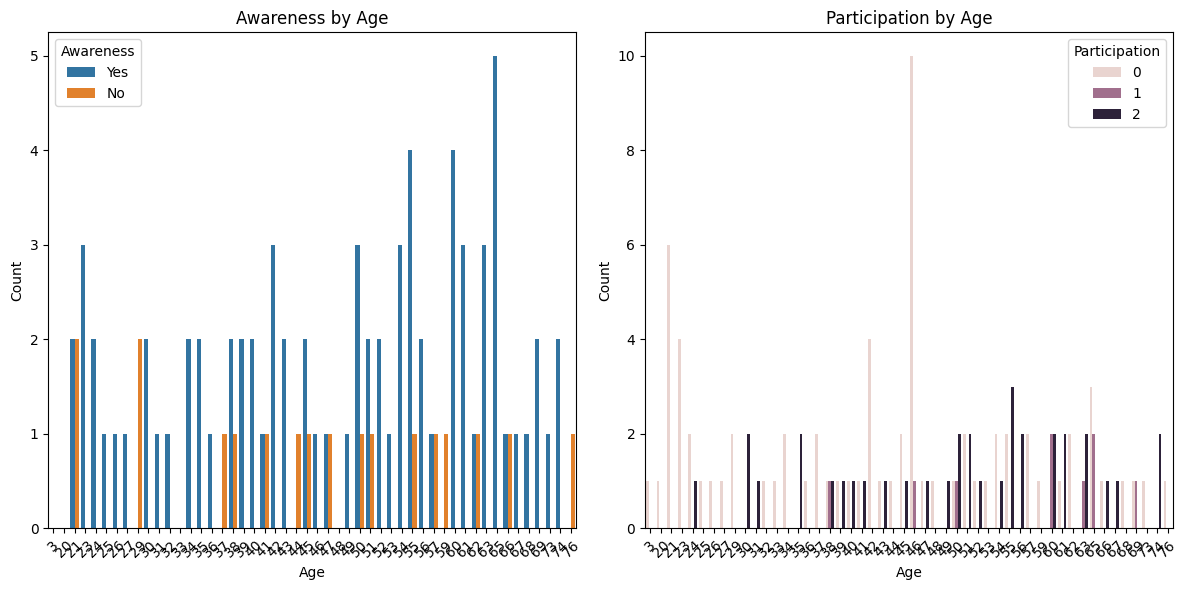

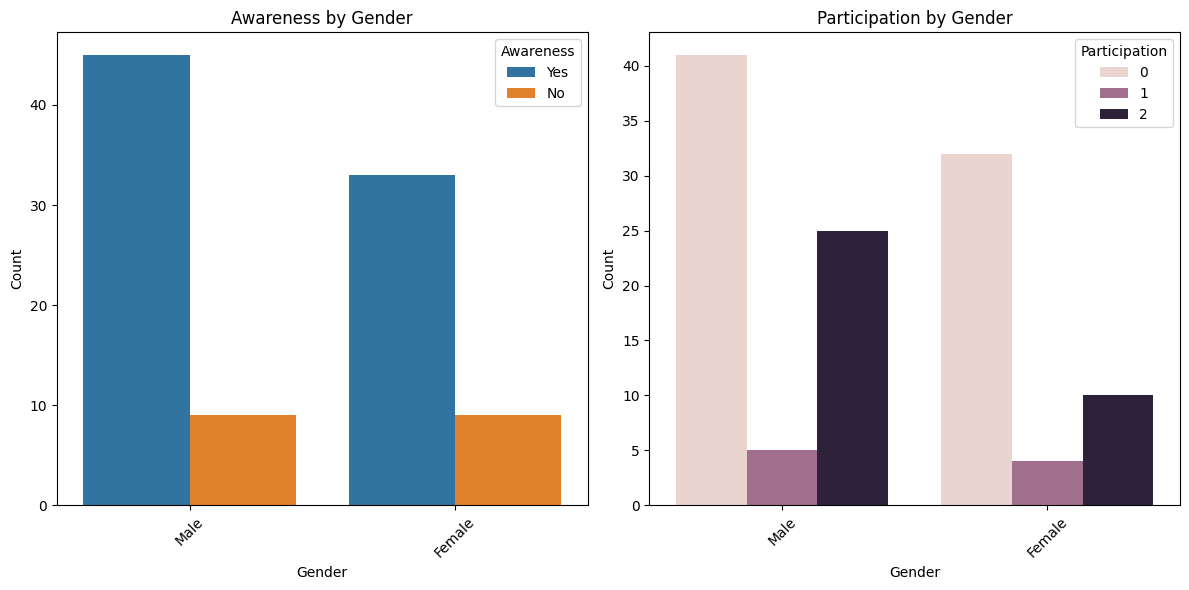

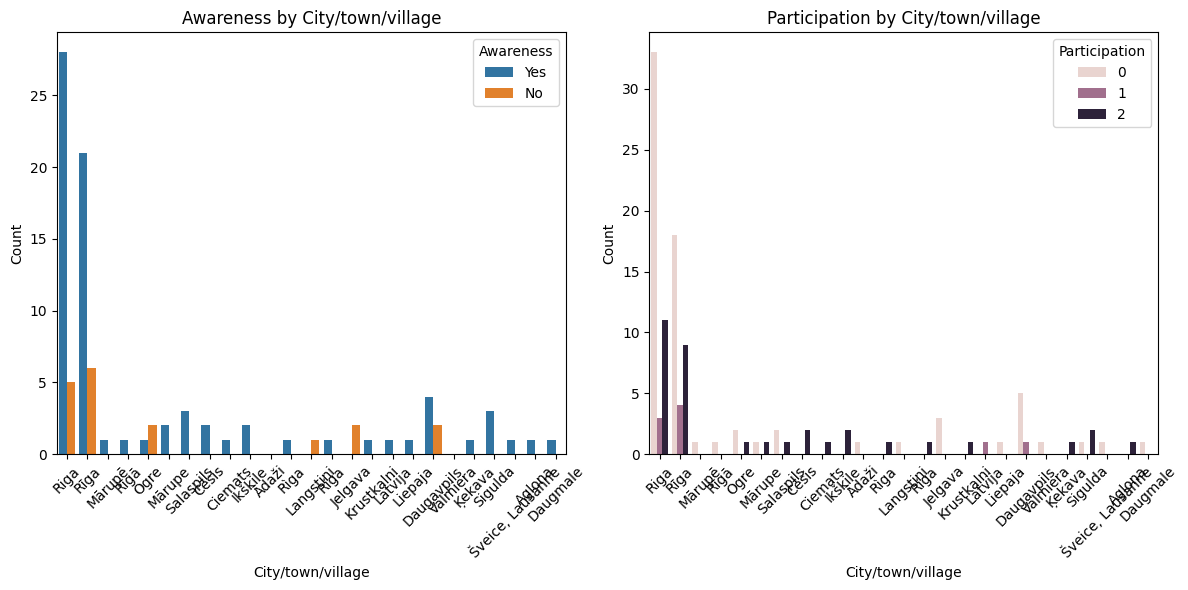

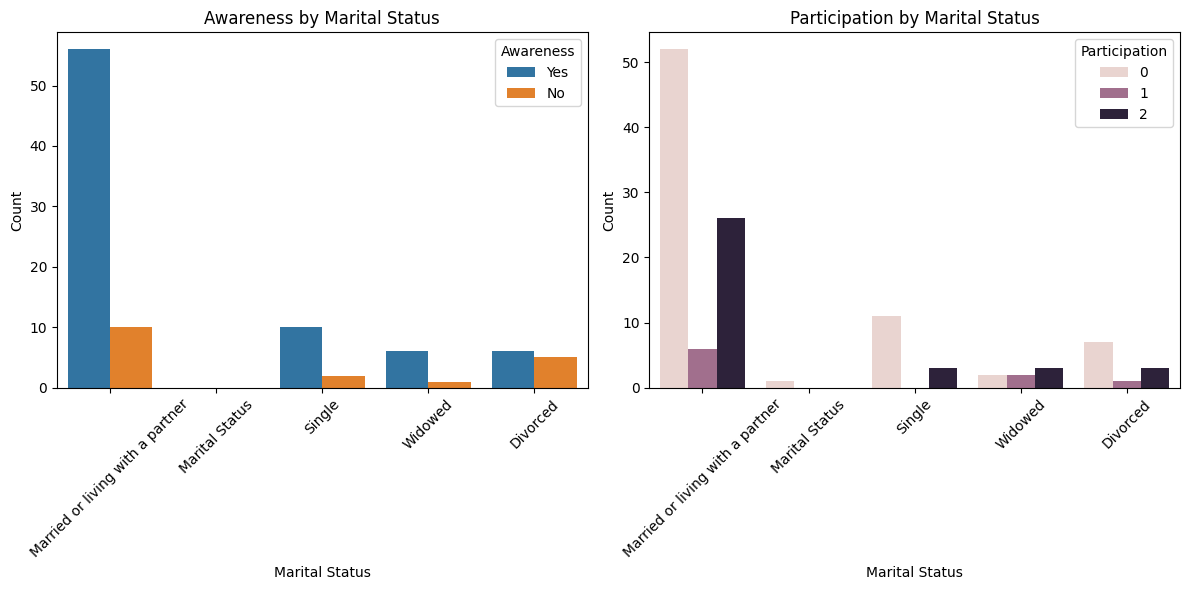

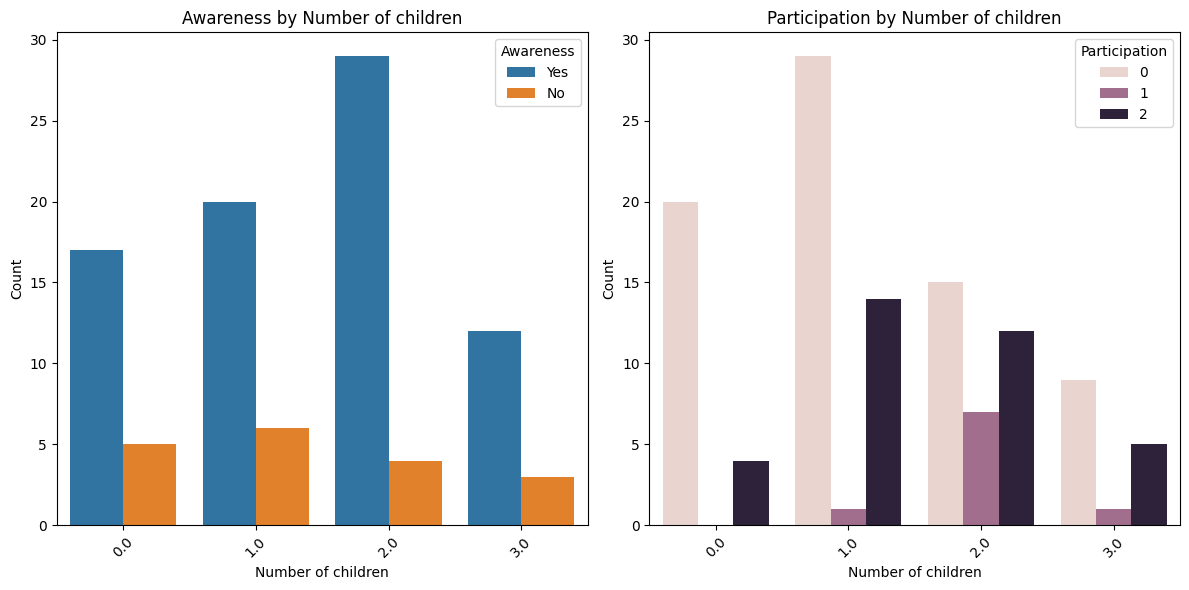

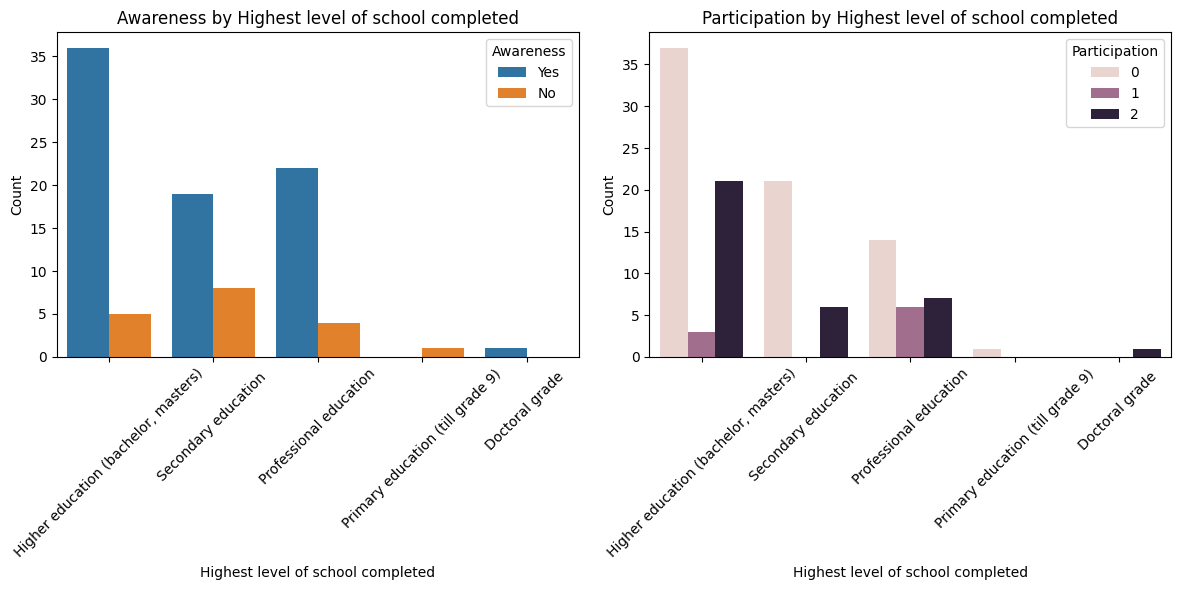

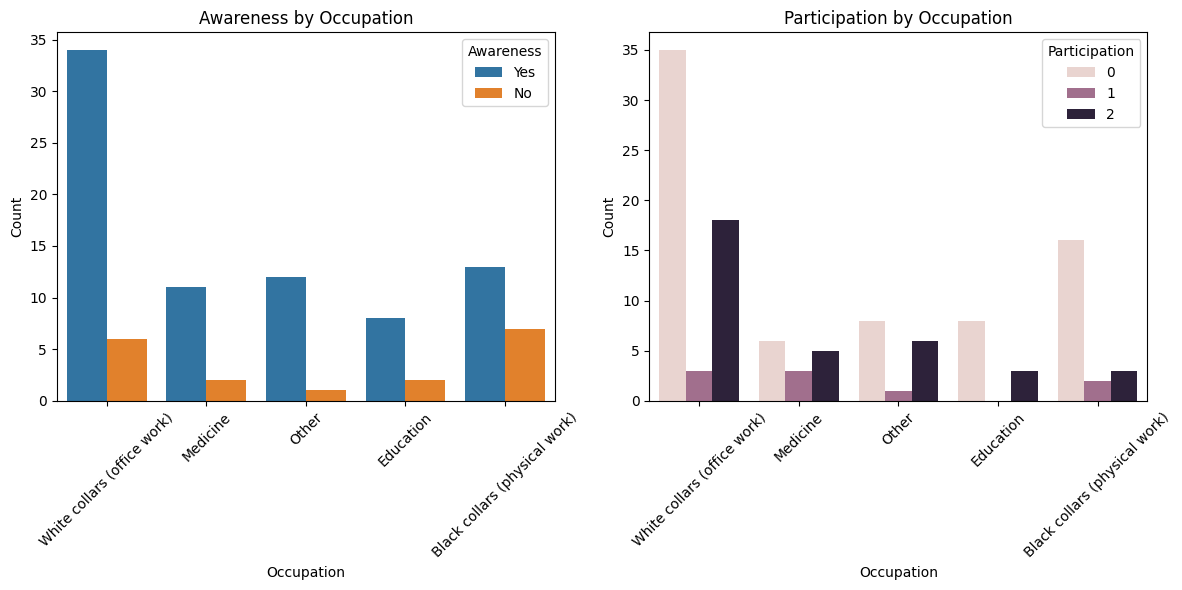

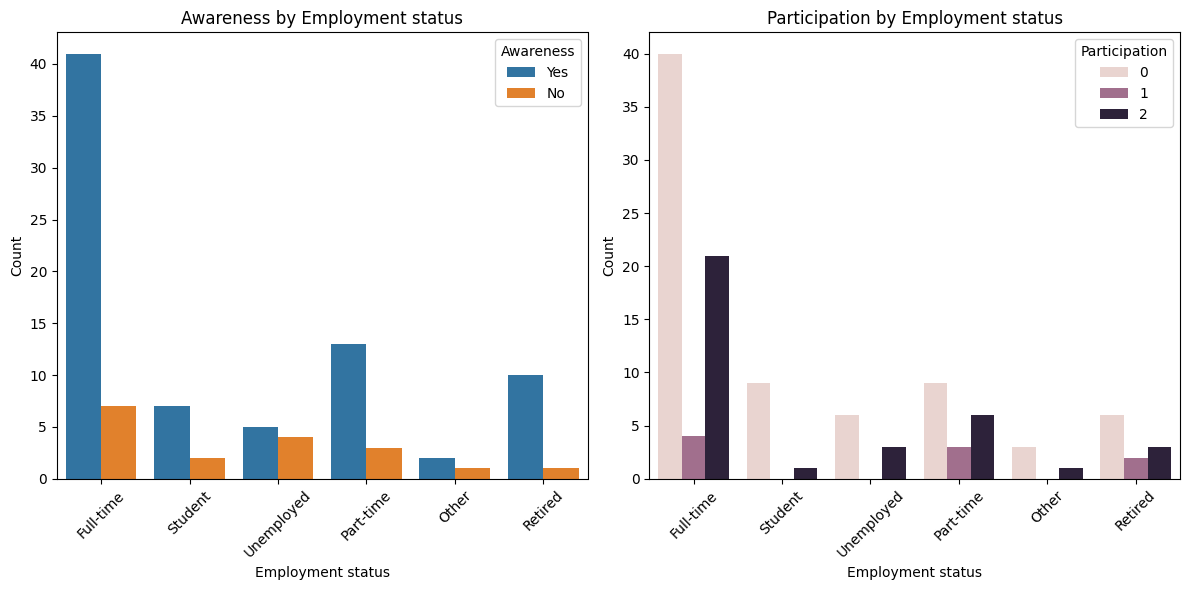

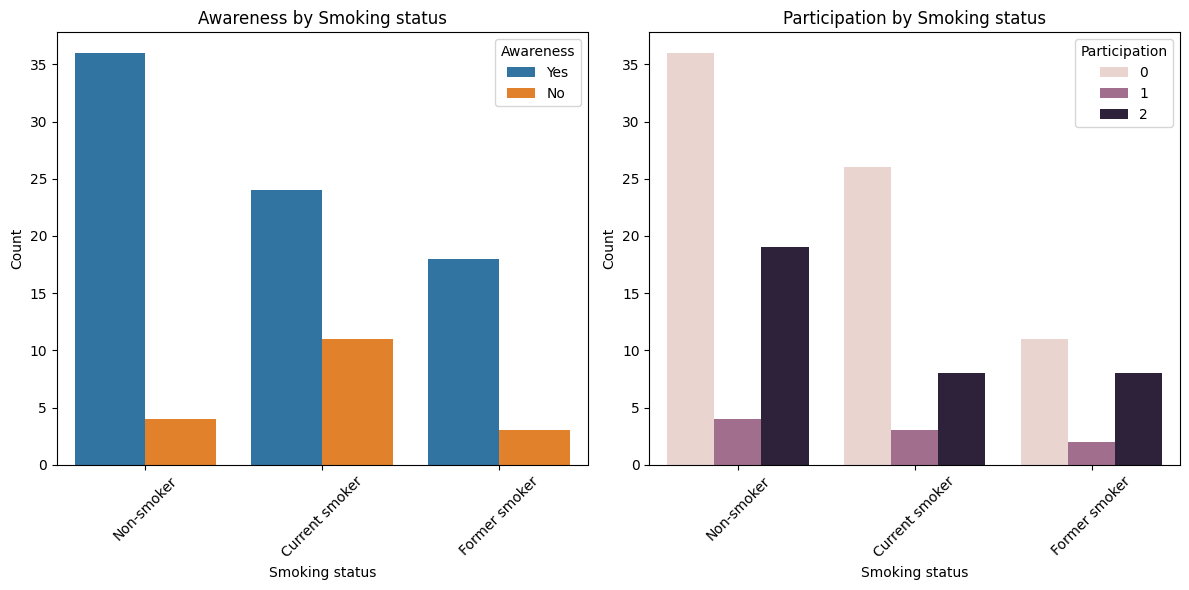

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_32765/80319664.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


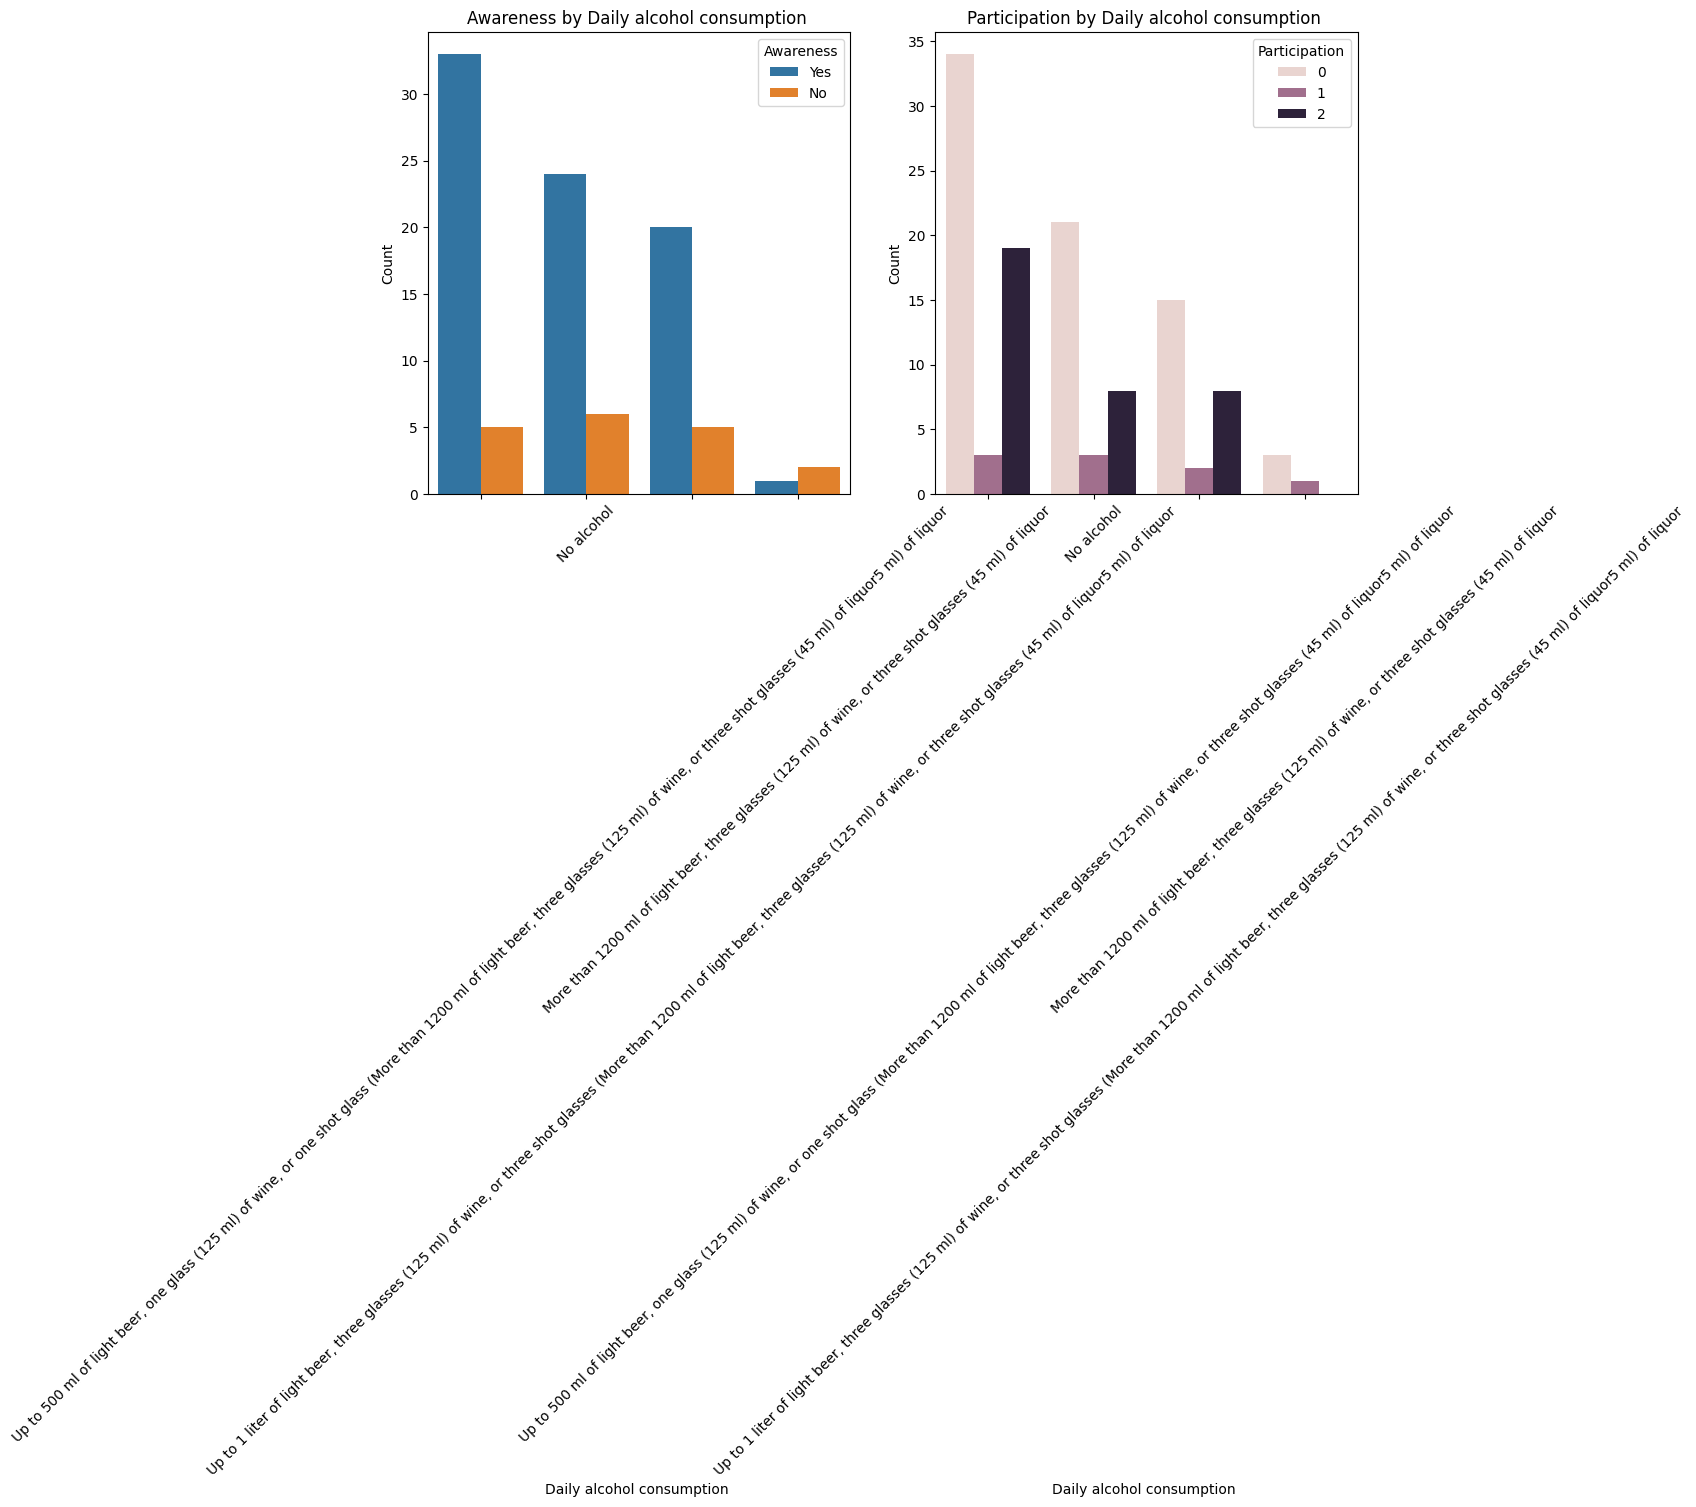

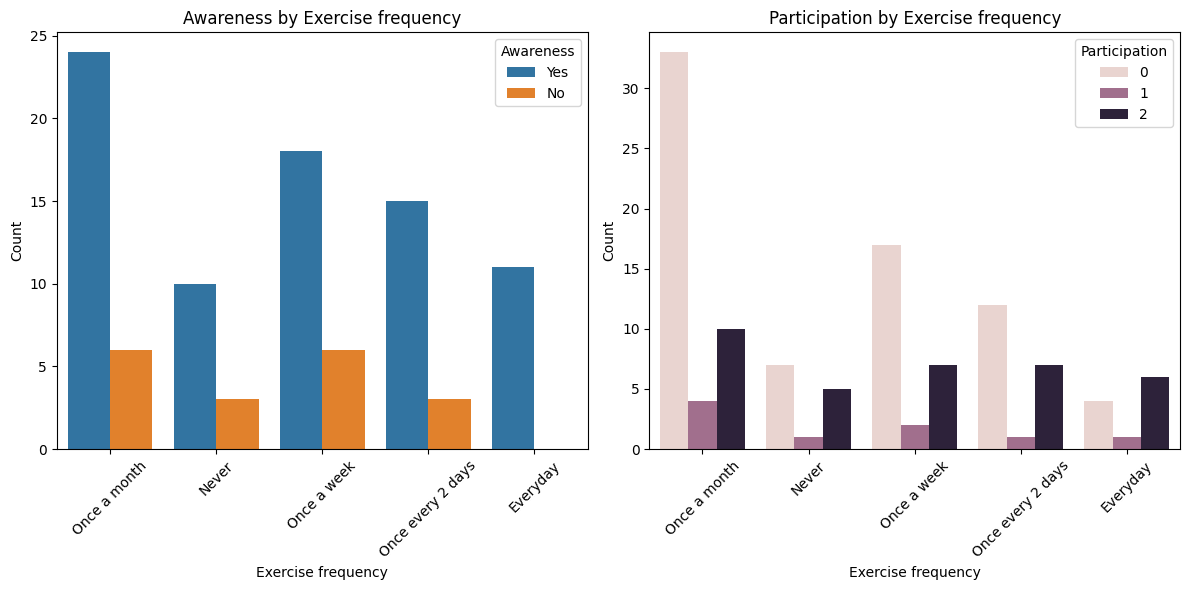

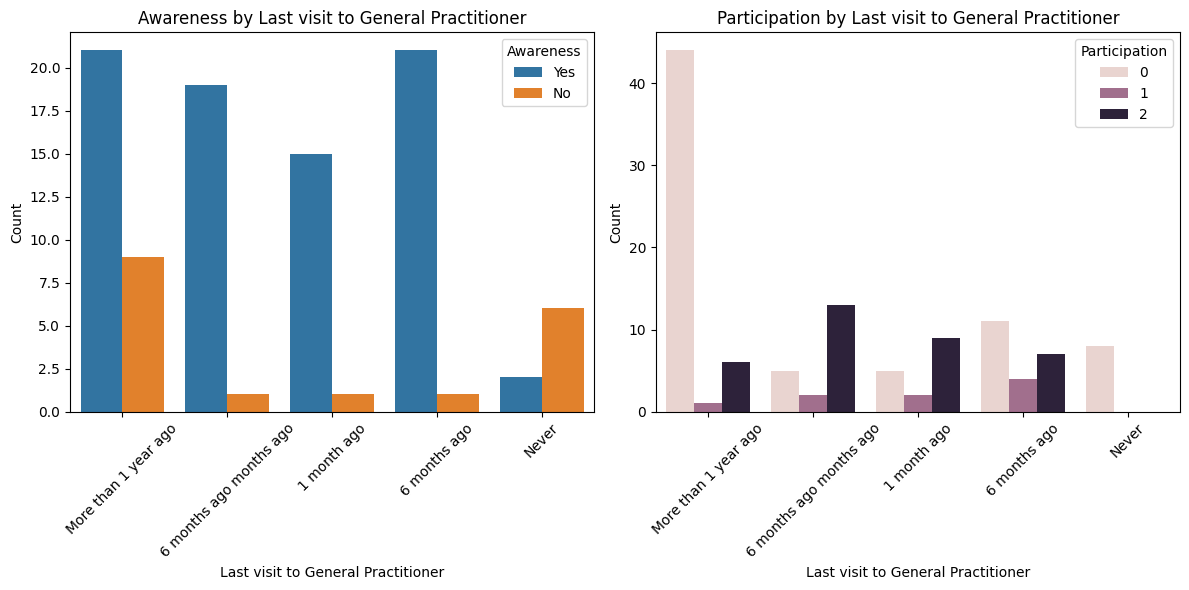

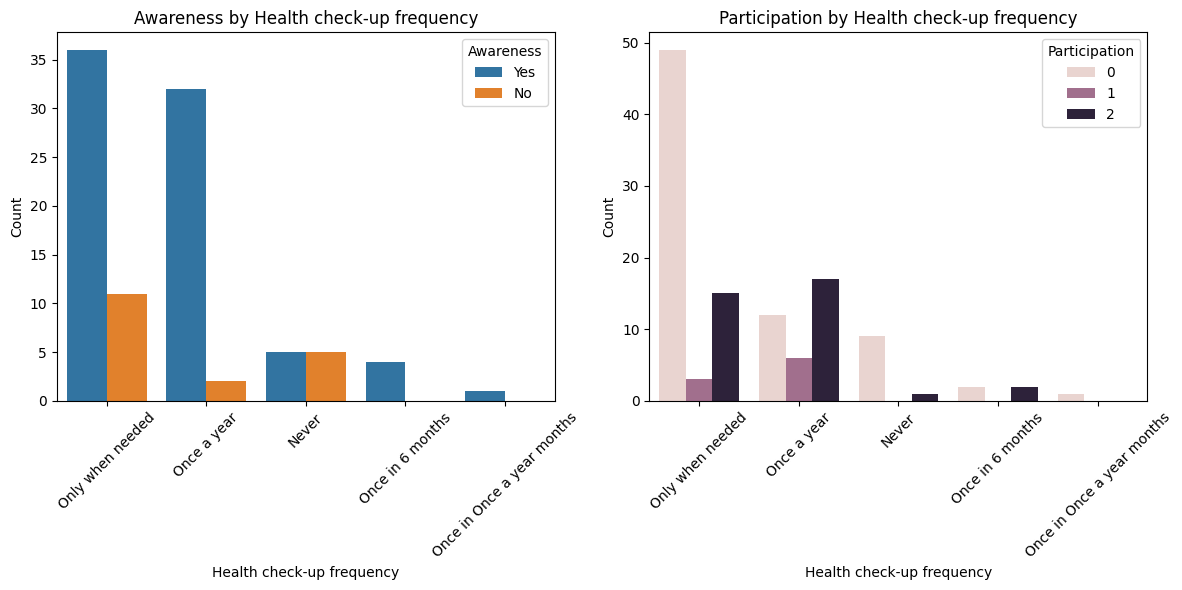

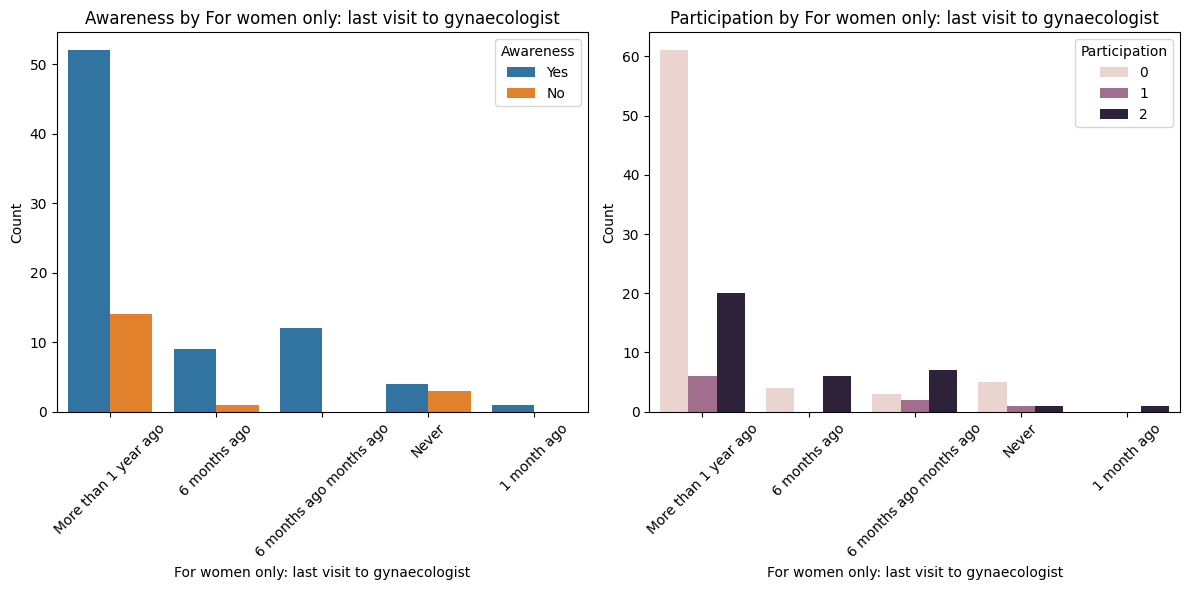

ValueError: too many values to unpack (expected 2)

In [ ]:
# Do sociodemographic factors affect the attitude towards screening and participation in screenings in Latvia? 
# Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Select relevant columns for analysis
relevant_columns = ['Age', 
                    'Gender', 
                    'City/town/village', 
                    'Marital Status', 
                    'Number of children', 
                    'Highest level of school completed', 
                    'Occupation', 
                    'Employment status', 
                    'Smoking status', 
                    'Daily alcohol consumption ', 
                    'Exercise frequency', 
                    'Last visit to General Practitioner', 
                    'Health check-up frequency', 
                    'For women only: last visit to gynaecologist', 
                    'Familiarity with the concept of cancer screening in Latvia', 
                    'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']

data = df[relevant_columns]

# Map the participation column
def map_participation(entry):
    if entry == 'Yes - for all the screenings that I received the invitations':
        return 2
    elif entry == 'Yes for a part of screenings that I received the invitations':
        return 1
    else:
        return 0

data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '] = data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].map(map_participation)

# Visualize attitudes towards screening and participation by sociodemographic factors
def visualize_attitudes_and_participation():
    # Loop through each relevant column
    for column in data.columns[:-2]:  # Exclude the last two columns (awareness and participation)
        plt.figure(figsize=(12, 6))
        
        # Plot awareness by sociodemographic factor
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, hue='Familiarity with the concept of cancer screening in Latvia', data=data)
        plt.title(f'Awareness by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Awareness')
        plt.xticks(rotation=45)

        # Plot participation by sociodemographic factor
        plt.subplot(1, 2, 2)
        sns.countplot(x=column, hue='If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ', data=data)
        plt.title(f'Participation by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Participation')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

# Statistical Analysis
def statistical_analysis():
    # Conduct chi-square tests for awareness and participation
    chi2_awareness, p_awareness = chi2_contingency(pd.crosstab(data['Gender'], data['Familiarity with the concept of cancer screening in Latvia']))
    chi2_participation, p_participation = chi2_contingency(pd.crosstab(data['Gender'], data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']))

    print("Chi-square test results for Awareness:")
    print("Chi-square value:", chi2_awareness)
    print("p-value:", p_awareness)

    print("\nChi-square test results for Participation:")
    print("Chi-square value:", chi2_participation)
    print("p-value:", p_participation)

# Call the functions
visualize_attitudes_and_participation()
statistical_analysis()



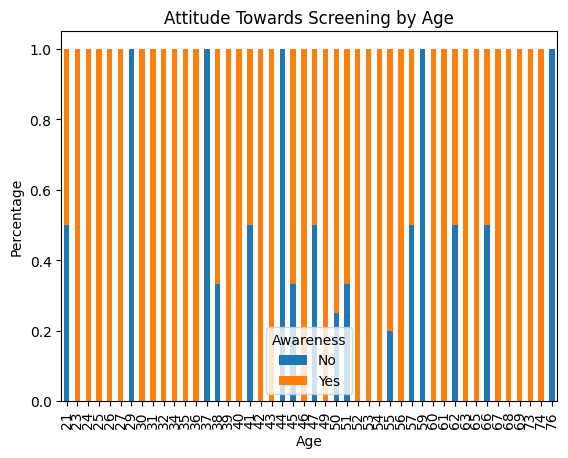

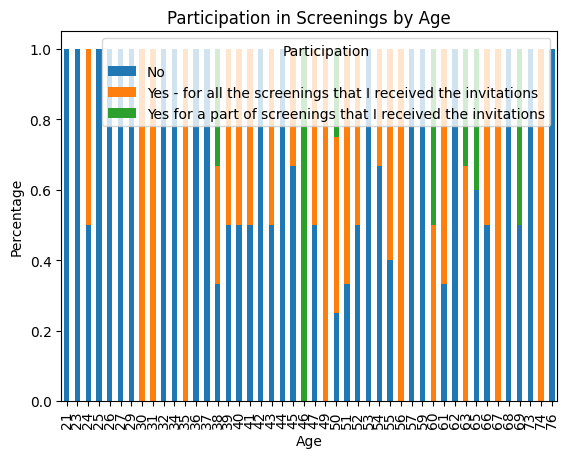

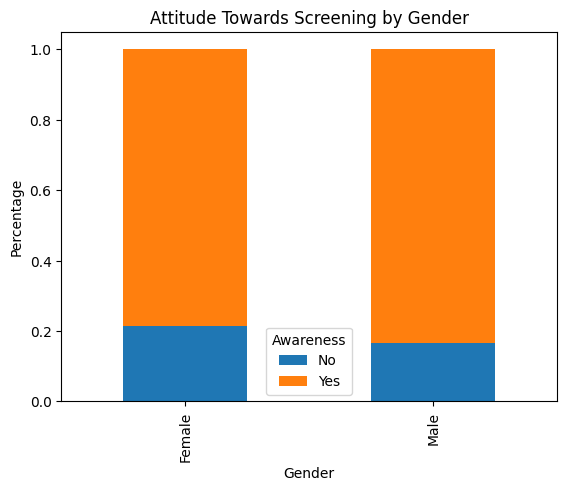

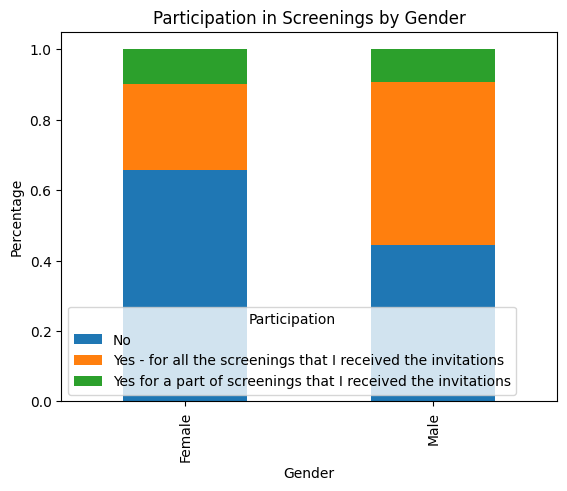

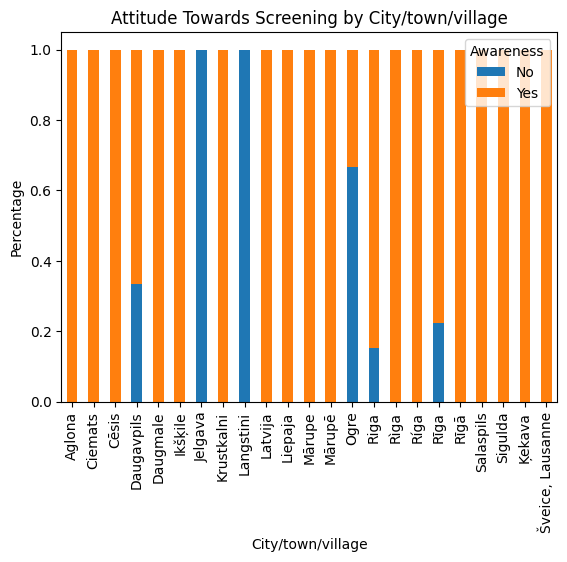

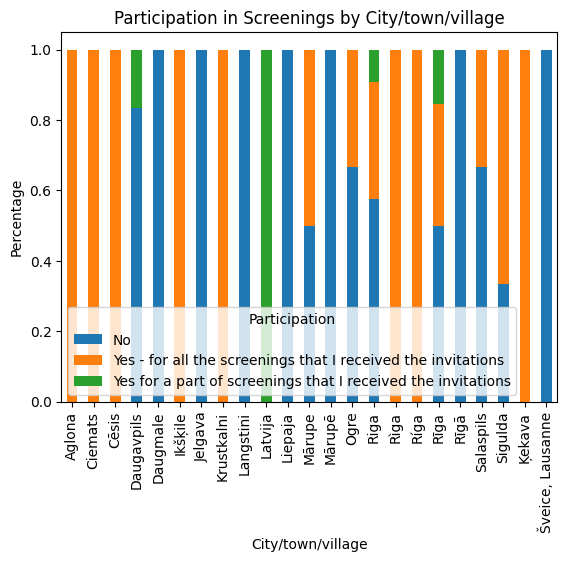

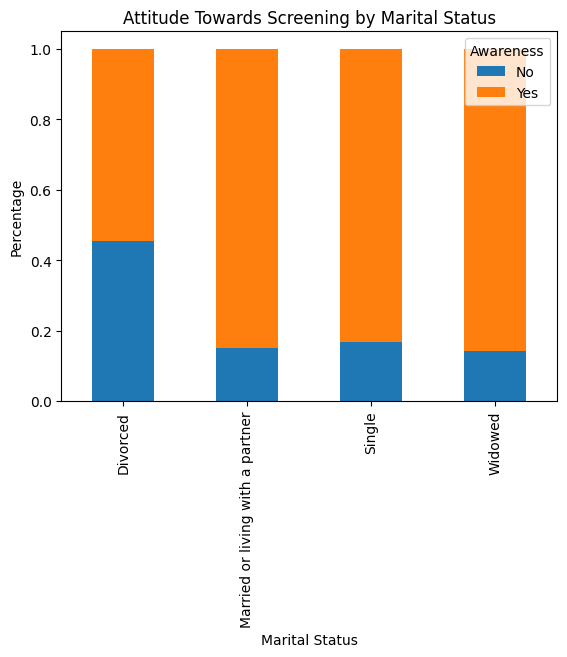

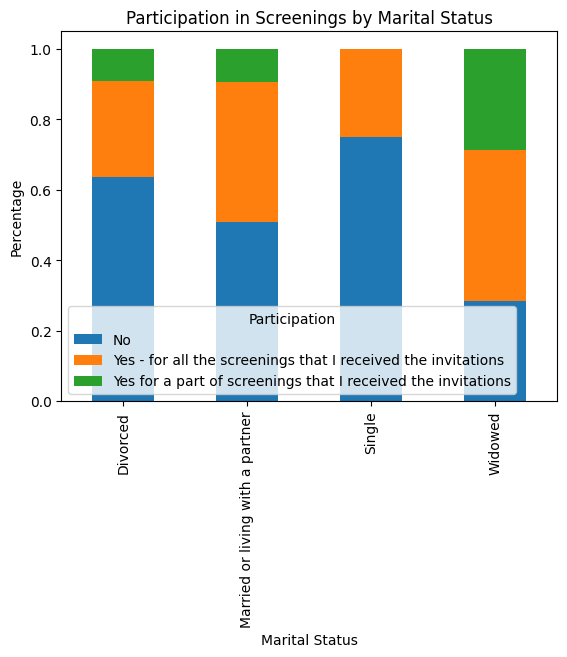

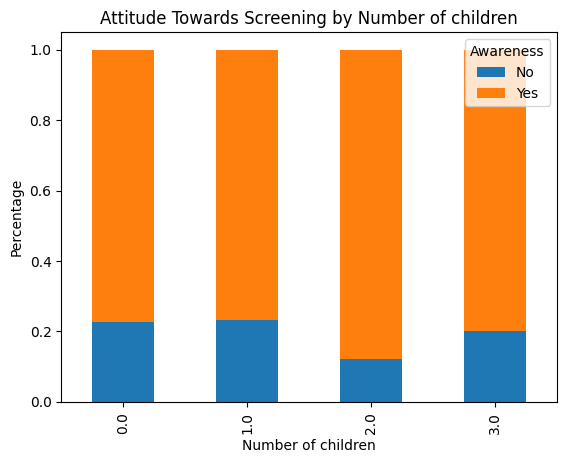

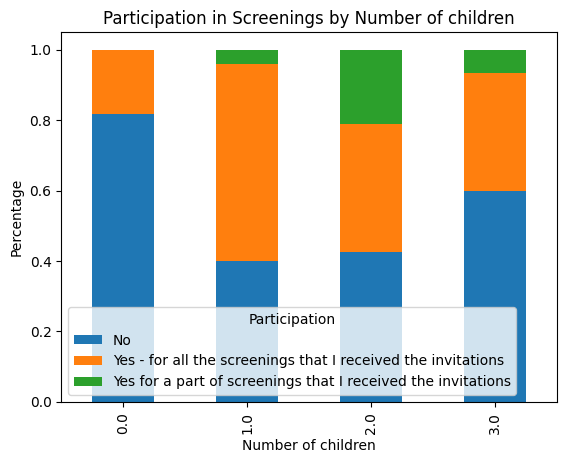

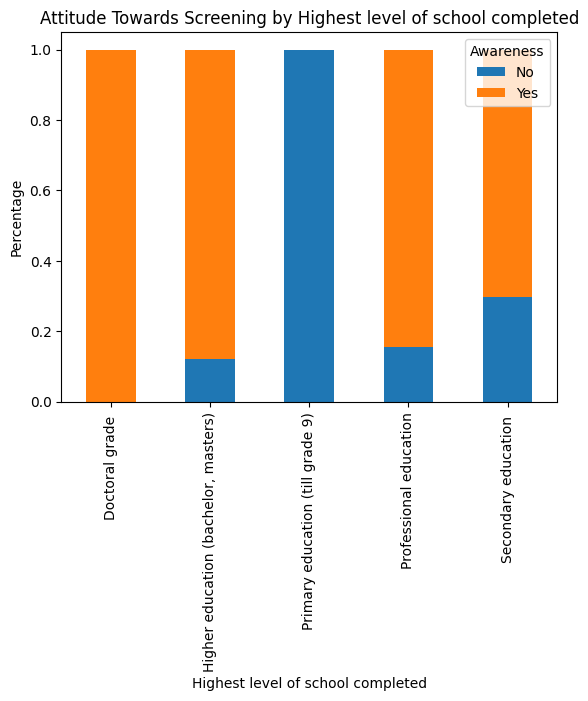

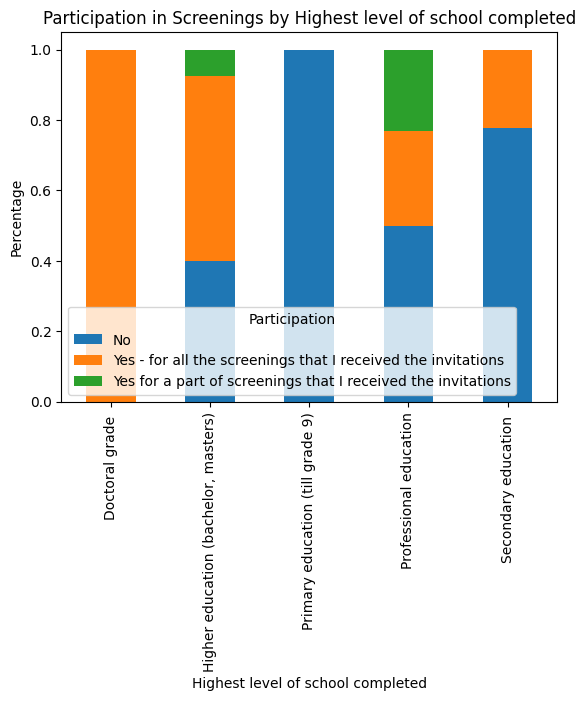

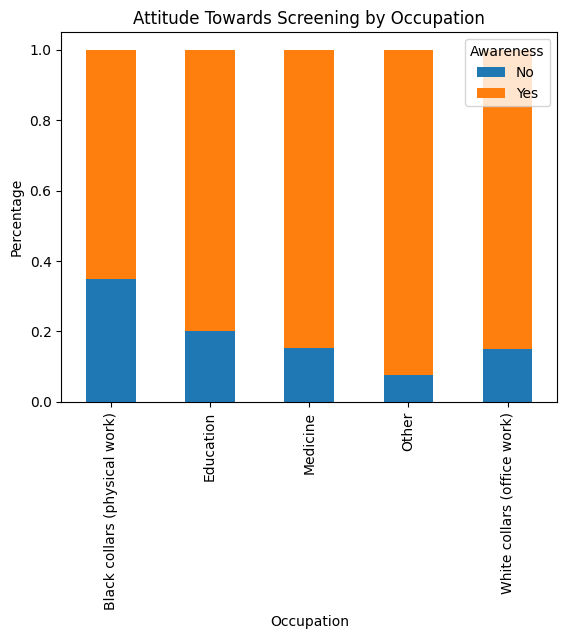

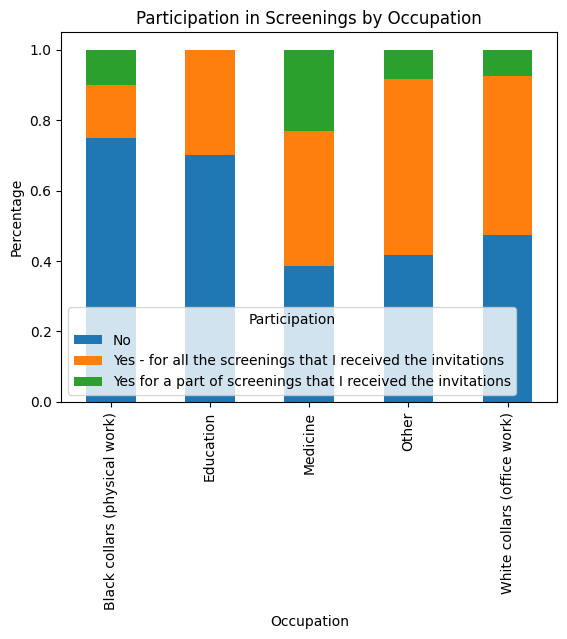

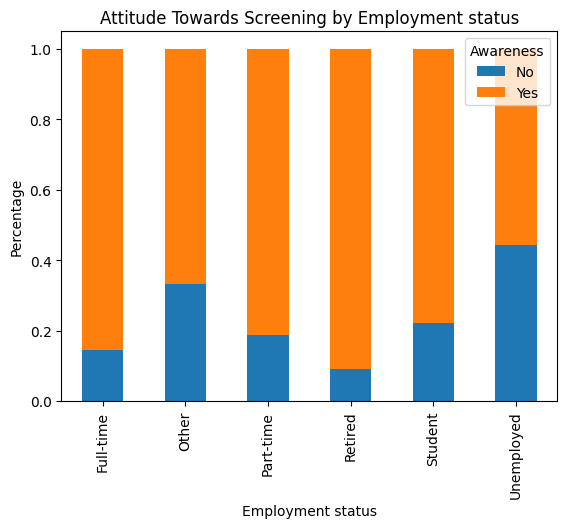

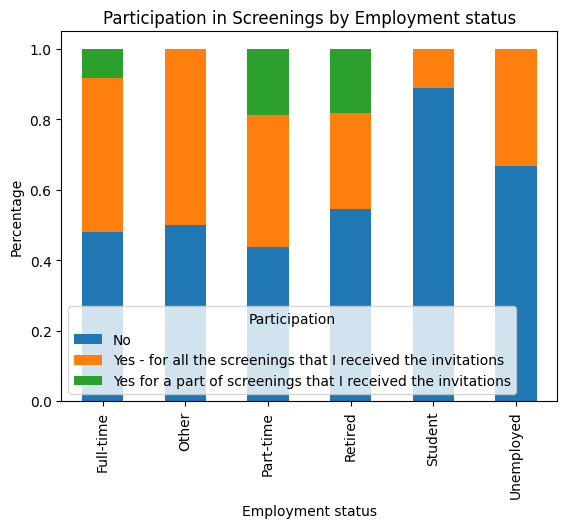

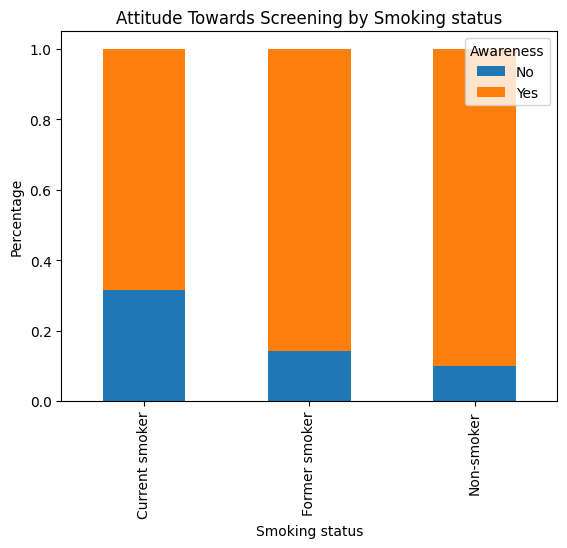

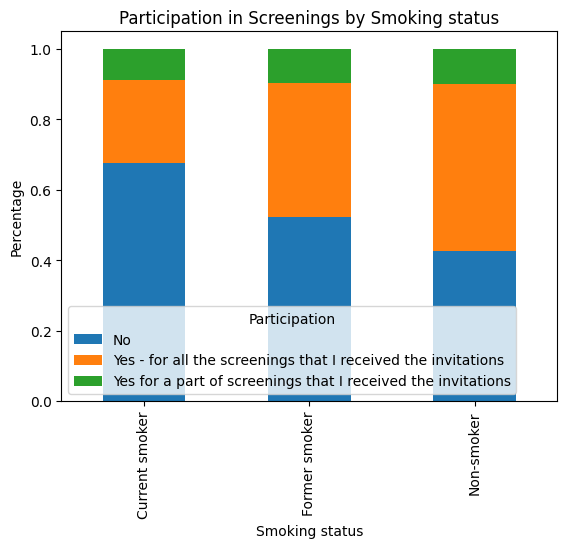

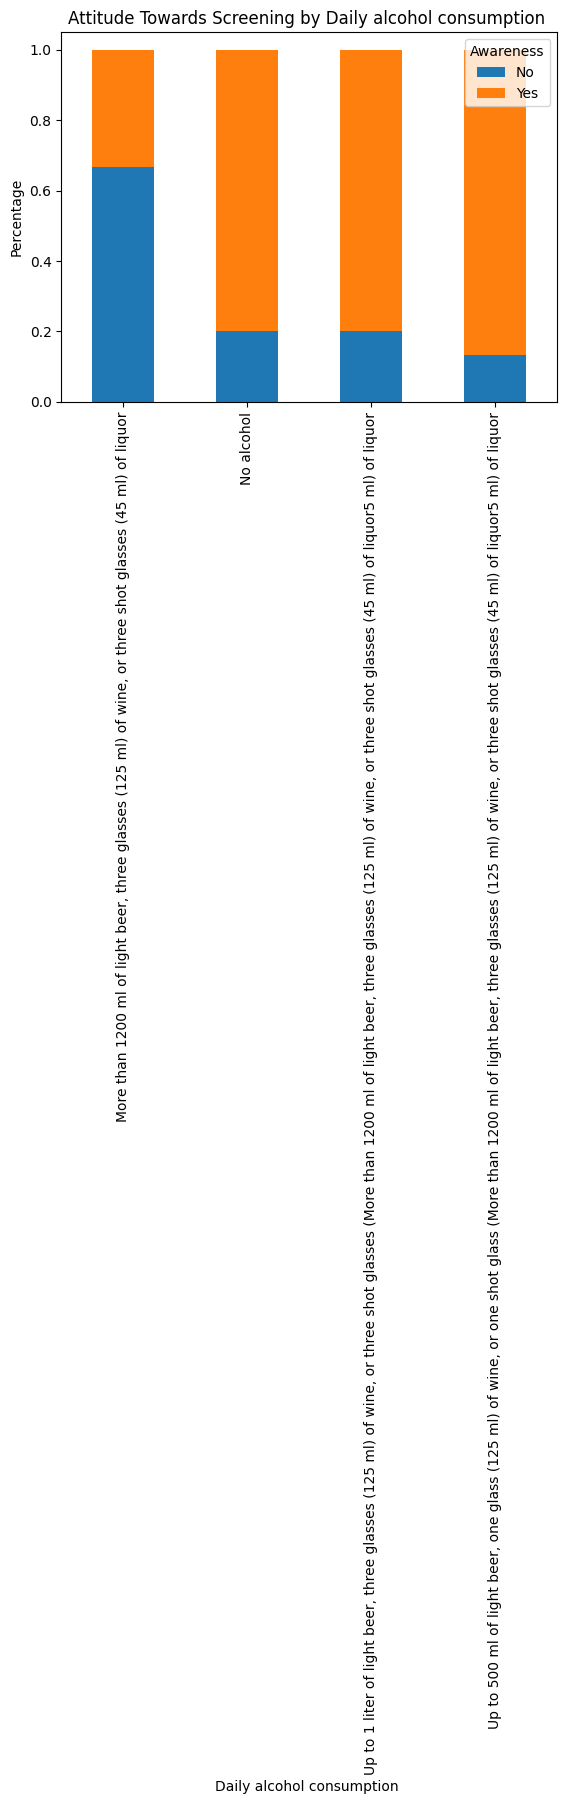

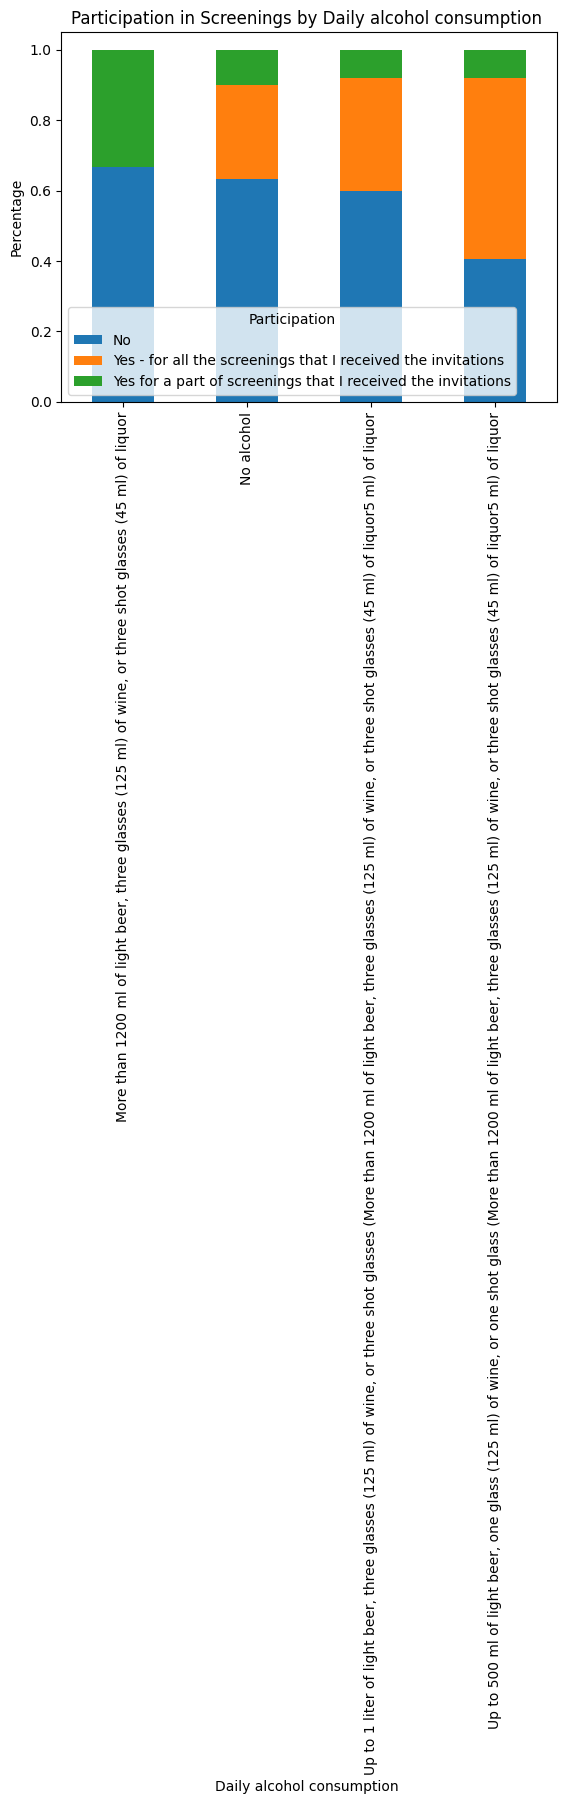

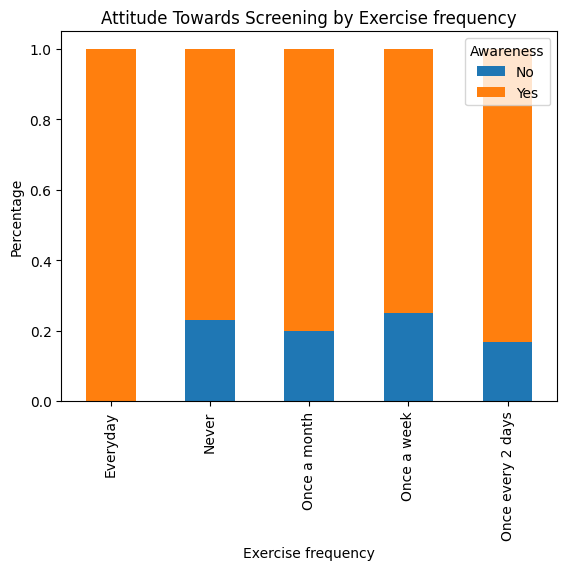

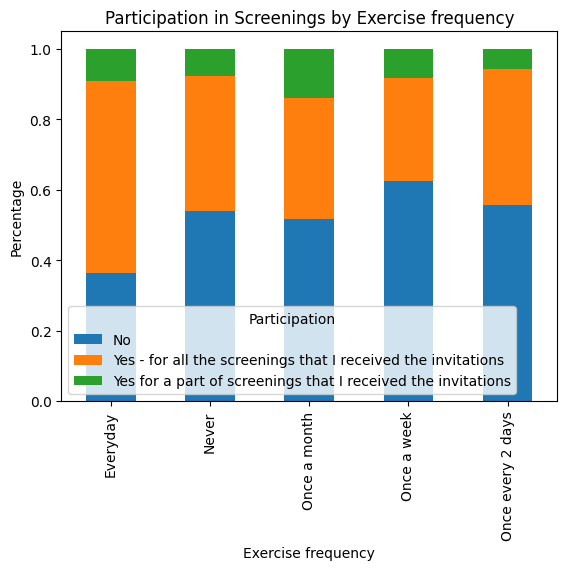

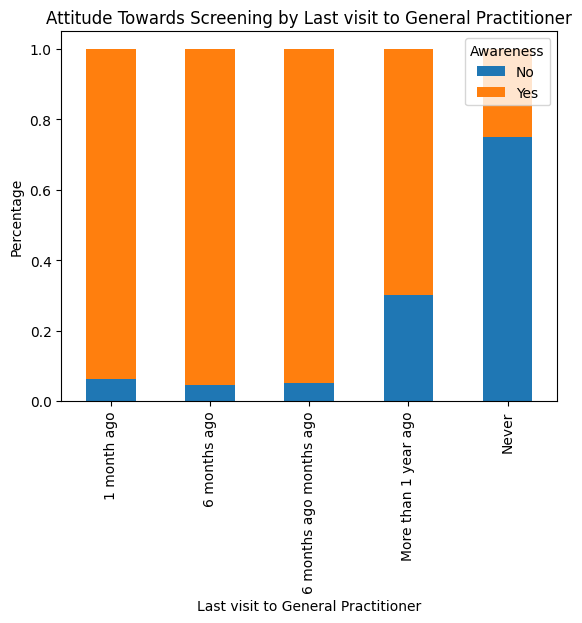

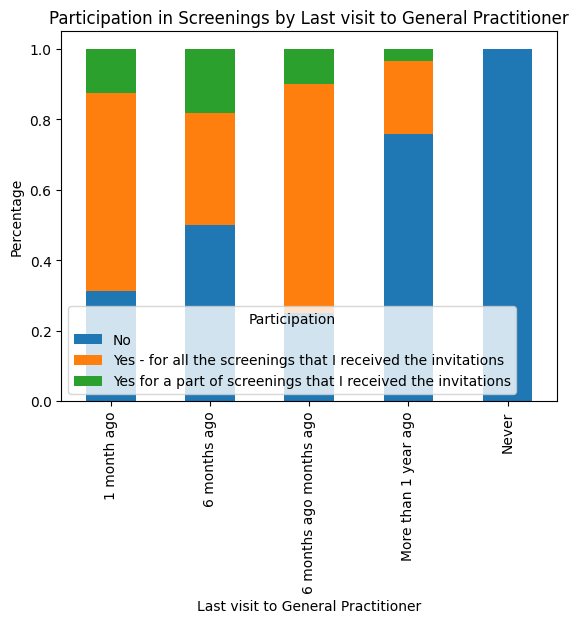

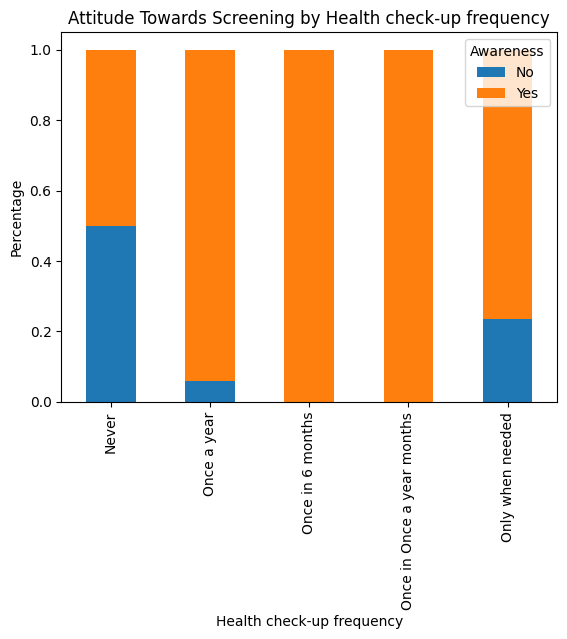

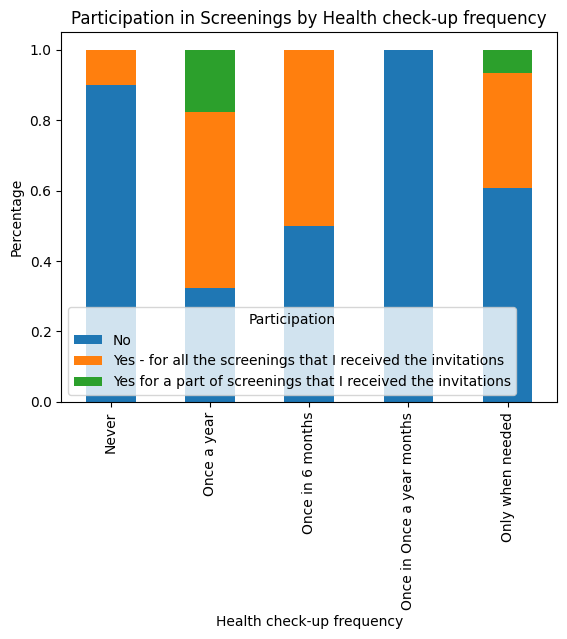

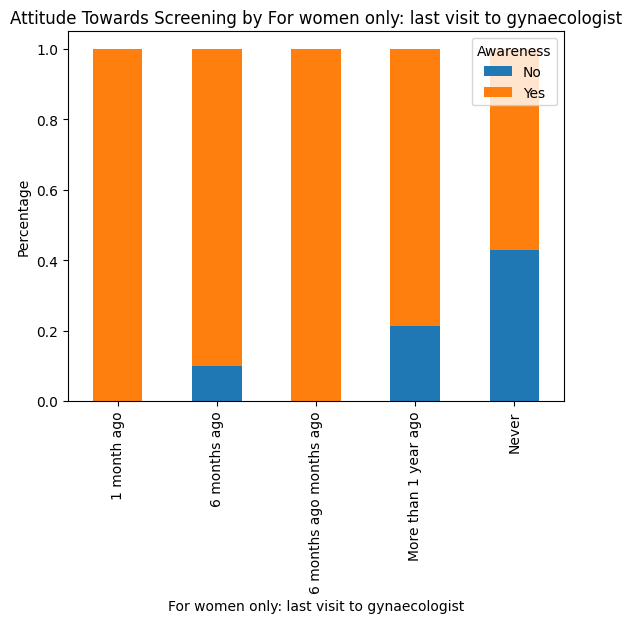

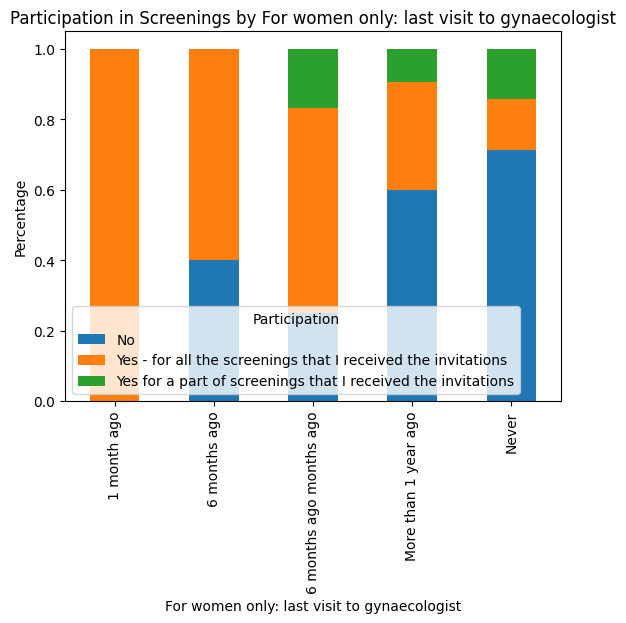

ValueError: too many values to unpack (expected 2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Define the sociodemographic factors of interest
sociodemographic_factors = [
    'Age',
    'Gender',
    'City/town/village',
    'Marital Status',
    'Number of children',
    'Highest level of school completed',
    'Occupation',
    'Employment status',
    'Smoking status',
    'Daily alcohol consumption ',
    'Exercise frequency',
    'Last visit to General Practitioner',
    'Health check-up frequency',
    'For women only: last visit to gynaecologist'
]

# Analyze Attitude Towards Screening
def analyze_attitude_towards_screening(factor):
    # Calculate the distribution of attitudes towards screening
    distribution = data.groupby(factor)['Familiarity with the concept of cancer screening in Latvia'].value_counts(normalize=True).unstack()

    # Visualize the distribution
    distribution.plot(kind='bar', stacked=True)
    plt.title('Attitude Towards Screening by ' + factor)
    plt.xlabel(factor)
    plt.ylabel('Percentage')
    plt.legend(title='Awareness')
    plt.show()

# Analyze Participation in Screenings
def analyze_participation_in_screenings(factor):
    # Calculate the distribution of participation in screenings
    distribution = data.groupby(factor)['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '].value_counts(normalize=True).unstack()

    # Visualize the distribution
    distribution.plot(kind='bar', stacked=True)
    plt.title('Participation in Screenings by ' + factor)
    plt.xlabel(factor)
    plt.ylabel('Percentage')
    plt.legend(title='Participation')
    plt.show()

# Statistical Analysis
def statistical_analysis():
    for factor in sociodemographic_factors:
        # Conduct chi-square tests for awareness and participation
        chi2_awareness, p_awareness = chi2_contingency(pd.crosstab(data[factor], data['Familiarity with the concept of cancer screening in Latvia']))
        chi2_participation, p_participation = chi2_contingency(pd.crosstab(data[factor], data['If you received one of the invitations mentioned above, did you perform the screening that you were invited for? ']))

        print("\nStatistical Analysis for", factor)
        print("Chi-square test results for Awareness:")
        print("Chi-square value:", chi2_awareness)
        print("p-value:", p_awareness)

        print("\nChi-square test results for Participation:")
        print("Chi-square value:", chi2_participation)
        print("p-value:", p_participation)

# Perform analysis and statistical tests for each sociodemographic factor
for factor in sociodemographic_factors:
    analyze_attitude_towards_screening(factor)
    analyze_participation_in_screenings(factor)

# Call the statistical_analysis function
statistical_analysis()


# SETTING UP AND ANALYSING HYPOTHESIS 

# HYPOTHESIS 1 
# Awareness about state-funded cancer screenings increases attendance rates of the population in screenings. 

In [ ]:
all_columns = df.columns.tolist()
print(all_columns)

['Country Code', 'Region', 'Age', ' Established diagnosis of breast cancer, cervical cancer, colorectal cancer, prostate cancer', 'Gender', 'City/town/village', 'Marital Status', 'Number of children', 'Highest level of school completed', 'Occupation', 'Employment status', 'Smoking status', 'Daily alcohol consumption ', 'Exercise frequency', 'Knowledge of General Practitioner', 'Last visit to General Practitioner', 'Health check-up frequency', 'For women only: last visit to gynaecologist', 'Familiarity with the concept of cancer screening in Latvia', 'Awareness about screening for cervical cancer (PAP smear)', 'Awareness about screening for colorectal cancer (blood in faeces)', ' Awareness about screening for breast cancer (Mammography)', 'Awareness about screening for prostate cancer (PSA analysis) ', 'Awareness about screening for Colonoscopy', 'Awareness about Prostate examination ', 'No Awareness about any type of cancer screening', 'Attended screening for cervical cancer (PAP smear

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Relevant columns
awareness_columns = ['Familiarity with the concept of cancer screening in Latvia',
                     'Awareness about screening for cervical cancer (PAP smear)',
                     'Awareness about screening for colorectal cancer (blood in faeces)',
                     ' Awareness about screening for breast cancer (Mammography)',
                     'Awareness about screening for prostate cancer (PSA analysis) ',
                     'Awareness about screening for Colonoscopy',
                     'Awareness about Prostate examination ',
                     'No Awareness about any type of cancer screening']

learning_sources_columns = ['Learnt about canceer screening tests from the Internet- Self-seeking information ',
                            'Learnt about canceer screening tests from social media ',
                            'Learnt about canceer screening tests from SPKC webpage',
                            'Learnt about canceer screening tests by my GP ',
                            'Learnt about canceer screening tests by other healthcare organisations',
                            'Learnt about canceer screening tests from advertisements ', 
                            'Learnt about canceer screening tests from friends, family members',
                            'Learnt about canceer screening tests from other resources '
                            ]

participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '

attitudes_columns = ['My health and well-being is very important to me',
                     'I take precautions to have a healthy lifestyle',
                     'Cancer is a serious health condition',
                     'I am afraid of cancer ',
                     'I am concerned about my own risk to develop cancer ',
                     'I am concerned about my family\'s risk to develop cancer']

# Fill NaN values in participation_column with 'No'
df[participation_column].fillna('No', inplace=True)

# Map participation_column to binary values
df[participation_column] = df[participation_column].map({
    'Yes - for all the screenings that I received the invitations': 1,
    'Yes for a part of screenings that I received the invitations': 1,
    'No': 0
})

# Generate design matrix
X = df[awareness_columns + learning_sources_columns + attitudes_columns]
y = df[participation_column]

# Convert 'Yes' entries to 1 and fill NaN with 0
X = X.applymap(lambda x: 1 if x == 'Yes' else 0)

# Remove constant columns to avoid singularity
X = X.loc[:, (X != X.iloc[0]).any()]

# Add constant for logistic regression
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

         Current function value: 0.268551
         Iterations: 35
                                                                           Logit Regression Results                                                                          
Dep. Variable:     If you received one of the invitations mentioned above, did you perform the screening that you were invited for?    No. Observations:                  117
Model:                                                                                                                         Logit   Df Residuals:                      100
Method:                                                                                                                          MLE   Df Model:                           16
Date:                                                                                                               Thu, 25 Apr 2024   Pseudo R-squ.:                  0.5944
Time:                                                           

/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_33796/3018324975.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[participation_column].fillna('No', inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_33796/3018324975.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x == 'Yes' else 0)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maxi

Based on the output and the inferences drawn:

Rejecting the Null Hypothesis: We reject the null hypothesis, which typically states that there is no relationship between awareness about state-funded cancer screenings and attendance rates.
Basis for Rejection:
The significant positive coefficients associated with awareness variables indicate that an increase in awareness is associated with higher attendance rates.
The low p-values associated with these coefficients suggest that the relationships are statistically significant, meaning they are unlikely to have occurred by chance.
Conclusion: Therefore, based on the evidence provided by the logistic regression analysis, we have sufficient grounds to reject the null hypothesis and accept the alternative hypothesis. This implies that awareness about state-funded cancer screenings does have a significant impact on attendance rates in the population.

# HYPOTHESIS 2
# Females are more aware than men of state-funded cancer screenings and attend them more frequently than men. 

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

awareness_columns = ['Familiarity with the concept of cancer screening in Latvia',
                     'Awareness about screening for cervical cancer (PAP smear)',
                     'Awareness about screening for colorectal cancer (blood in faeces)',
                     ' Awareness about screening for breast cancer (Mammography)',
                     'Awareness about screening for prostate cancer (PSA analysis) ',
                     'Awareness about screening for Colonoscopy',
                     'Awareness about Prostate examination ',
                     'No Awareness about any type of cancer screening']

participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '

# Map participation_column to binary values
df[participation_column] = df[participation_column].map({
    'Yes - for all the screenings that I received the invitations': 1,
    'Yes for a part of screenings that I received the invitations': 1,
    'No': 0
})

# Select only relevant columns for hypothesis testing
data = df[['Gender of the participant'] + awareness_columns]

# Replace blank entries with 'No' in awareness columns
data[awareness_columns] = data[awareness_columns].fillna('No')

# Replace 'Yes' with 1 and other values with 0 in awareness columns
data[awareness_columns] = data[awareness_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Drop rows with missing values
data.dropna(inplace=True)

# Ensure 'Gender of the participant' column is categorical
data['Gender of the participant'] = data['Gender of the participant'].astype('category')

# Create contingency table
contingency_table = pd.crosstab(data['Gender of the participant'], data[awareness_columns].sum(axis=1))

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and awareness of state-funded cancer screenings.")
else:
    print("Accept the null hypothesis: There is no significant association between gender and awareness of state-funded cancer screenings.")

Chi-Square Statistic: 18.561122167789343
p-value: 0.009679211566253454
Reject the null hypothesis: There is a significant association between gender and awareness of state-funded cancer screenings.


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_34920/2972959718.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[awareness_columns] = data[awareness_columns].fillna('No')
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_34920/2972959718.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[awareness_columns] = data[awareness_columns].applymap(lambda x: 1 if x == 'Yes' else 0)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_34920/2972959718.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

# HYPOTHESIS 3
# Participation in state-funded screenings is higher among younger participants.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Define relevant columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
age_column = 'Age'

# Select relevant columns
data = df[[age_column, participation_column]]

# Drop rows with missing values
data.dropna(inplace=True)

# Group participants into younger and older categories
# Define the age threshold (e.g., 40 years)
age_threshold = 40
data['Age Group'] = pd.cut(data[age_column], bins=[0, age_threshold, df[age_column].max()], labels=['Younger', 'Older'])

# Create contingency table
contingency_table = pd.crosstab(data['Age Group'], data[participation_column])

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between age and participation in state-funded screenings.")
else:
    print("Accept the null hypothesis: There is no significant association between age and participation in state-funded screenings.")


Chi-Square Statistic: 3.6787282434341257
p-value: 0.15891844677415434
Accept the null hypothesis: There is no significant association between age and participation in state-funded screenings.


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_35635/212171078.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_35635/212171078.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age Group'] = pd.cut(data[age_column], bins=[0, age_threshold, df[age_column].max()], labels=['Younger', 'Older'])


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Define columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
age_column = 'Age'

# Fill NaN values in participation_column with 'No'
df[participation_column].fillna('No', inplace=True)

# Map participation_column to binary values
df[participation_column] = df[participation_column].map({
    'Yes - for all the screenings that I received the invitations': 1,
    'Yes for a part of screenings that I received the invitations': 1,
    'No': 0
})

# Select only relevant columns
data = df[[age_column, participation_column]]

# Drop rows with missing values
data.dropna(inplace=True)

# Separate data for younger and older participants
data_younger = data[data[age_column] == 'Younger'][participation_column]
data_older = data[data[age_column] == 'Older'][participation_column]

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(data_younger, data_older)

# Print results
print("t-Statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean participation rate between younger and older participants.")
else:
    print("Accept the null hypothesis: There is no significant difference in the mean participation rate between younger and older participants.")


t-Statistic: nan
p-value: nan
Accept the null hypothesis: There is no significant difference in the mean participation rate between younger and older participants.


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_35635/3193566542.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[participation_column].fillna('No', inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_35635/3193566542.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


# HYPOTHESIS 4
# Participation in state-funded screening is higher among participants with a higher level of education.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Define columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
education_column = 'Highest level of school completed'

# Fill NaN values in participation_column with 'No'
df[participation_column].fillna('No', inplace=True)

# Select only relevant columns
data = df[[education_column, participation_column]]

# Drop rows with missing values
data.dropna(inplace=True)

# Create contingency table
contingency_table = pd.crosstab(data[education_column], data[participation_column])

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between education level and participation in state-funded screening.")
else:
    print("Accept the null hypothesis: There is no significant association between education level and participation in state-funded screening.")


Chi-Square Statistic: 15.670454375327491
p-value: 0.04734726229509351
Reject the null hypothesis: There is a significant association between education level and participation in state-funded screening.


/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_35635/4021011187.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[participation_column].fillna('No', inplace=True)
/var/folders/00/g6wzklhx6nj9649_f1shk6lc0000gp/T/ipykernel_35635/4021011187.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Define columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
education_column = 'Highest level of school completed'

# Map education levels into higher and lower categories
higher_education_levels = ['Professional education', 'Higher education (bachelor, master’s)', 'Doctoral grade']
lower_education_levels = ['Primary education (till grade 9)', 'Secondary education']

# Categorize education levels
def categorize_education_level(level):
    if level in higher_education_levels:
        return 'Higher'
    elif level in lower_education_levels:
        return 'Lower'
    else:
        return 'Other'

df['Education Category'] = df[education_column].apply(categorize_education_level)

# Create contingency table
contingency_table = pd.crosstab(df['Education Category'], df[participation_column])

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between education level and participation in state-funded screenings.")
else:
    print("Accept the null hypothesis: There is no significant association between education level and participation in state-funded screenings.")


Chi-Square Statistic: 8.89397568982344
p-value: 0.06380491346540398
Accept the null hypothesis: There is no significant association between education level and participation in state-funded screenings.


# HYPOTHESIS 5
# Participation in state-funded screening is higher among participants with higher socioeconomic status.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Define columns
participation_column = 'If you received one of the invitations mentioned above, did you perform the screening that you were invited for? '
occupation_column = 'Occupation'

# Categorize occupation into high and low socioeconomic status
high_ses = ['White collars (office work)', 'Education', 'Medicine']
low_ses = ['Black collars (physical work)', 'Other']

# Map occupation to socioeconomic status
df['Socioeconomic Status'] = df[occupation_column].map(lambda x: 'High' if x in high_ses else 'Low')

# Create contingency table
contingency_table = pd.crosstab(df['Socioeconomic Status'], df[participation_column])

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis: There is a significant association between socioeconomic status and participation in state-funded screenings.")
else:
    print("Accept the null hypothesis: There is no significant association between socioeconomic status and participation in state-funded screenings.")


Chi-Square Statistic: 1.6943166155351035
p-value: 0.42863124101038763
Accept the null hypothesis: There is no significant association between socioeconomic status and participation in state-funded screenings.
